<a href="https://colab.research.google.com/github/wannasmile/colab_code_note/blob/main/IRC011.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### **可微分树 vs. 传统决策树：通俗解析**

#### **1. 核心区别：是否支持“反向传播”**
- **传统决策树**：像**交通信号灯**，规则明确但固定。  
  - **训练方式**：通过“硬规则”（如基尼系数）选择分裂点，一旦确定就无法调整。  
  - **示例**：判断用户是否购买商品，规则可能是“年龄 > 30岁？是→买，否→不买”。  
  - **局限**：无法通过数据反馈动态优化规则，也无法与其他模型（如神经网络）联合训练。

- **可微分树**：像**可调节的变形积木**，规则灵活可优化。  
  - **训练方式**：将分裂逻辑参数化（如用概率代替硬阈值），通过梯度下降调整参数。  
  - **示例**：同样是年龄判断，但改为“年龄接近30岁时，有60%概率向左分支，40%向右”。  
  - **优势**：支持端到端学习，可嵌入复杂模型（如与神经网络结合）。

---

#### **2. 决策过程对比**
| **步骤**               | **传统决策树**                  | **可微分树**                     |
|------------------------|--------------------------------|----------------------------------|
| **分裂判断**           | 硬性二选一（如年龄>30？是/否） | 软性概率（如年龄>30的概率是70%） |
| **路径计算**           | 唯一路径（树形结构固定）        | 加权多路径（概率叠加）           |
| **输出结果**           | 叶节点固定值（如分类标签）      | 叶节点值的概率加权和             |
| **优化方式**           | 贪心算法（局部最优）            | 梯度下降（全局优化）             |

**直观比喻**：  
- **传统决策树**：像走迷宫，每次路口只能选一个方向，最终走到死胡同。  
- **可微分树**：像在迷宫中分身，同时尝试所有路径，根据出口反馈调整各路径的权重。

---

#### **3. 技术实现差异**
- **传统决策树**：  
  - **分裂选择**：计算信息增益或基尼系数，选择最佳分裂点。  
  - **训练终点**：达到预设深度或纯度后停止分裂。  
  - **预测流程**：输入样本从根节点到叶节点走唯一路径。

- **可微分树**：  
  - **参数化分裂**：用 Sigmoid 函数将分裂阈值转换为概率。  
```python
    # 例如：分裂概率 = 1 / (1 + exp(-(特征值 - 阈值)))
    split_prob = torch.sigmoid(feature_value - threshold)
```

  - **路径概率**：样本从根到叶的路径概率 = 各节点选择概率的乘积。  
  - **预测值计算**：所有叶节点值的加权平均（权重为路径概率）。

---

#### **4. 应用场景对比**
| **场景**               | **传统决策树**                     | **可微分树**                          |
|------------------------|-----------------------------------|---------------------------------------|
| **结构化数据分类**     | ✔️ 高效且解释性强                  | ✔️ 可优化但速度较慢                   |
| **与神经网络结合**     | ❌ 无法联合训练                    | ✔️ 无缝集成（如用CNN提取特征后输入树） |
| **多任务学习**         | ❌ 需独立训练多个树                | ✔️ 共享树结构，叶节点多任务输出       |
| **在线学习（动态更新）**  | ❌ 需重新训练全树                  | ✔️ 通过梯度微调参数                   |

**示例**：  
- **传统树适用场景**：银行风控规则（需明确解释拒绝贷款的原因）。  
- **可微分树适用场景**：推荐系统（用户点击率预测需与用户画像神经网络联合优化）。

---

#### **5. 优缺点总结**
| **维度**       | **传统决策树**                          | **可微分树**                          |
|----------------|---------------------------------------|---------------------------------------|
| **训练速度**   | ⚡️ 快（贪心算法）                      | 🐢 慢（需计算梯度）                   |
| **解释性**     | ✅ 高（规则清晰）                      | ❌ 低（概率化路径难解释）             |
| **灵活性**     | ❌ 固定结构                            | ✅ 可动态调整结构和参数               |
| **泛化能力**   | ❌ 易过拟合（需剪枝）                  | ✅ 通过正则化优化                     |
| **硬件支持**   | ❌ 仅CPU优化                           | ✅ 支持GPU加速                        |

---

#### **6. 一句话总结**
传统决策树是**规则明确的硬派指挥官**，而可微分树是**灵活学习的策略家**，能通过反馈调整决策，更适合复杂多变的战场（如深度学习生态）。


### **可微分树 vs. 神经网络：可解释性及优劣势分析**

#### **一、可解释性对比**
1. **可微分树的解释性优势**  
   - **结构化决策路径**：  
可微分树保留了树状结构，决策路径由特征分裂逻辑构成，即使采用软阈值，仍可通过概率路径追踪特征影响。例如，可显示某特征在多个节点的分裂权重，解释其对结果的贡献。  
*示例*：在医疗诊断中，可微分树可能显示“年龄>50岁”在多个节点的高分裂概率，间接提示年龄是关键风险因素。  

   - **特征重要性量化**：  
与传统决策树类似，可微分树可通过统计特征在分裂节点中的使用频率或梯度贡献度，生成特征重要性排名。  
*示例*：在房价预测中，可微分树可能明确显示“地段”和“面积”是主导特征。  

   - **局部解释能力**：  
对单个样本的预测，可微分树可生成从根节点到叶节点的概率路径，解释每个分裂步骤的决策依据。  

2. **神经网络的解释性劣势**  
   - **黑箱性质**：  
神经网络通过多层非线性变换建模，难以追踪输入特征到输出的具体路径。即使使用特征可视化（如CAM、LIME），解释性仍依赖近似方法，缺乏直接逻辑关联。  
*示例*：图像分类中，神经网络可能因学习到非直观特征（如纹理噪声）而做出错误分类，但解释工具可能无法揭示这一点。  

   - **全局解释困难**：  
神经网络参数分散在众多神经元中，无法像树模型那样直接提取全局规则。

---

#### **二、可微分树的优势**
1. **平衡可解释性与灵活性**  
   - 在保留树模型结构化决策的同时，支持梯度优化和参数微调，适用于需解释性和模型性能兼顾的场景（如金融风控、医疗诊断）。

2. **与神经网络的兼容性**  
   - 可微分树可无缝集成到深度学习框架（如PyTorch），构建混合模型。例如：  
- 用CNN提取图像特征，输入可微分树进行结构化决策。  
- 用LSTM处理时序数据后，通过可微分树生成规则化输出。

3. **多任务学习的天然支持**  
   - 通过共享树结构和独立叶节点输出，实现多任务间的隐式知识迁移。例如，预测用户点击率和购买率时，共享特征分裂逻辑，但叶节点分别存储两个任务的预测值。

4. **小数据高效性**  
   - 对样本量较少的数据集，可微分树通过正则化和结构化归纳偏置，相比神经网络更不易过拟合。

---

#### **三、可微分树的缺点**
1. **计算效率较低**  
   - **软决策的计算开销**：概率化路径需计算所有可能路径的加权和，时间复杂度从传统树的 $O(\text{深度})$ 升至 $O(2^{\text{深度}})$。  
   - **内存占用高**：需存储中间路径概率矩阵，对大规模数据（如百万级样本）不友好。

2. **解释性折损**  
   - 概率化分裂模糊了传统树的硬规则，例如：  
- 传统树：“收入>5万 → 批准贷款”；  
- 可微分树：“收入>5万的概率为70%，导致最终批准概率为65%”。  
后者虽提供量化信息，但决策逻辑不如前者直观。

3. **训练复杂度高**  
   - 需调参的变量增多，包括学习率、正则化强度、树的深度等，且超参数对模型性能敏感。  
   - 梯度优化可能陷入局部最优，尤其在树深度较大时。

4. **硬件限制**  
   - 传统GBDT库（如XGBoost）针对CPU优化，而可微分树依赖PyTorch/TensorFlow的GPU加速，但并行化效率不如纯神经网络。

---

#### **四、应用场景建议**
| **场景**               | **推荐模型**          | **理由**                                                                 |
|------------------------|-----------------------|--------------------------------------------------------------------------|
| 高解释性需求           | 可微分树              | 结构化决策路径 + 特征重要性排名，满足合规审计（如金融风控）             |
| 复杂特征交互           | 神经网络              | 神经网络自动捕捉高阶非线性关系（如图像、文本）                          |
| 小样本多任务学习       | 可微分树              | 共享树结构减少过拟合风险                                                |
| 实时大数据预测         | 传统GBDT（如LightGBM）| 计算效率和内存占用更优                                                  |
| 混合建模（规则+感知）  | 可微分树 + 神经网络   | 结合结构化规则和感知能力（如用CNN提取特征后输入可微分树）               |

---

#### **五、总结**
- **可微分树的可解释性**：显著优于神经网络，但略逊于传统决策树。其通过概率路径和特征重要性提供“半透明”解释，适用于需平衡性能与解释性的场景。  
- **核心优势**：结构化的可解释性、多任务支持、与深度学习生态兼容。  
- **主要缺点**：计算效率低、训练复杂度高、硬件优化不足。  

**最终建议**：在需要模型透明度的领域（如金融、医疗），可微分树是更优选择；而在纯性能驱动的场景（如推荐系统、图像识别），神经网络或传统GBDT可能更合适。

In [ ]:
!pip install gbnet

In [ ]:
import pandas as pd
from gbnet.models import ordinal_regression

urls = [
    f"https://raw.githubusercontent.com/gagolews/ordinal-regression-data/refs/heads/master/{i}"
    for i in [
        'abalone.csv',
        'abalone_ord.csv',
        'affairs.csv',
        'ailerons.csv',
        'auto_ord.csv',
        'auto_riskness.csv',
        'bostonhousing.csv',
        'bostonhousing_ord.csv',
        'californiahousing.csv',
        'cement_strength.csv',
        'fireman_example.csv',
        'glass.csv',
        'kinematics.csv',
        'machine_ord.csv',
        'skill.csv',
        'stock_ord.csv',
        'winequality-red.csv',
        'winequality-white.csv',
        'wisconsin_breast_ord.csv'
    ]
]

In [ ]:
import os
import requests
download_dir = 'downloaded_data'
if not os.path.exists(download_dir):
    os.makedirs(download_dir)


for url in urls:
    filename = os.path.join(download_dir, url.split('/')[-1])
    try:
        response = requests.get(url, stream=True)
        response.raise_for_status()
        with open(filename, 'wb') as f:
            for chunk in response.iter_content(chunk_size=8192):
                f.write(chunk)
        print(f"Downloaded: {filename}")
    except requests.exceptions.RequestException as e:
        print(f"Error downloading {url}: {e}")

Downloaded: downloaded_data/abalone.csv
Downloaded: downloaded_data/abalone_ord.csv
Downloaded: downloaded_data/affairs.csv
Downloaded: downloaded_data/ailerons.csv
Downloaded: downloaded_data/auto_ord.csv
Downloaded: downloaded_data/auto_riskness.csv
Downloaded: downloaded_data/bostonhousing.csv
Downloaded: downloaded_data/bostonhousing_ord.csv
Downloaded: downloaded_data/californiahousing.csv
Downloaded: downloaded_data/cement_strength.csv
Downloaded: downloaded_data/fireman_example.csv
Downloaded: downloaded_data/glass.csv
Downloaded: downloaded_data/kinematics.csv
Downloaded: downloaded_data/machine_ord.csv
Downloaded: downloaded_data/skill.csv
Downloaded: downloaded_data/stock_ord.csv
Downloaded: downloaded_data/winequality-red.csv
Downloaded: downloaded_data/winequality-white.csv
Downloaded: downloaded_data/wisconsin_breast_ord.csv


In [ ]:
%%time
from xgboost.sklearn import XGBClassifier, XGBRegressor
from lightgbm.sklearn import LGBMClassifier, LGBMRegressor

results = []
for url in urls:
    filename = os.path.join(download_dir, url.split('/')[-1])

    try:
        df = pd.read_csv(url)
        train = df.sample(int(df.shape[0] * 0.7), random_state=10110)
        test = df[~df.index.isin(train.index)]

        train = train.reset_index(drop=True)
        test = test.reset_index(drop=True)

        xcols = [col for col in df.columns if not (col == 'response')]
        ycol = 'response'

        num_classes = df[ycol].nunique()
        num_training = train.shape[0]
        num_test = test.shape[0]

        ordboost = ordinal_regression.GBOrd(num_classes, module_type='XGBModule')
        ordboost_lgbm = ordinal_regression.GBOrd(num_classes, module_type='LGBModule')
        xgbclass = XGBClassifier(objective='multi:softmax')
        xgbmae = XGBRegressor(objective='reg:absoluteerror')
        xgbhuber = XGBRegressor(objective='reg:pseudohubererror')
        lgbclass = LGBMClassifier(objective='multiclass')
        lgbmae = LGBMRegressor(objective='mae')
        lgbhuber = LGBMRegressor(objective='huber')

        miny = train[ycol].min()
        ordboost.fit(train[xcols], train[ycol])
        ordboost_lgbm.fit(train[xcols], train[ycol])
        xgbclass.fit(train[xcols], train[ycol] - miny)
        xgbmae.fit(train[xcols], train[ycol])
        xgbhuber.fit(train[xcols], train[ycol])
        lgbclass.fit(train[xcols], train[ycol] - miny)
        lgbmae.fit(train[xcols], train[ycol])
        lgbhuber.fit(train[xcols], train[ycol])

        test['pred'] = ordboost.predict(test[xcols], return_logits=False)
        test['pred_lgbm'] = ordboost_lgbm.predict(test[xcols], return_logits=False)
        test['pred_xgbclass'] = xgbclass.predict(test[xcols]) + miny
        test['pred_xgbmae'] = xgbmae.predict(test[xcols])
        test['pred_xgbhuber'] = xgbhuber.predict(test[xcols])
        test['pred_lgbclass'] = lgbclass.predict(test[xcols]) + miny
        test['pred_lgbmae'] = lgbmae.predict(test[xcols])
        test['pred_lgbhuber'] = lgbhuber.predict(test[xcols])

        results.append({
            'dataset': url.split('/')[-1],
            'num_classes': num_classes,
            'training_size': num_training,
            'test_size': num_test,
            'test_mae_ord': ((test['response'] - test['pred']).abs()).mean(),
            'test_mae_lgbm': ((test['response'] - test['pred_lgbm']).abs()).mean(),
            'test_mae_xgbclass': ((test['response'] - test['pred_xgbclass']).abs()).mean(),
            'test_mae_xgbmae': ((test['response'] - test['pred_xgbmae']).abs()).mean(),
            'test_mae_xgbhuber': ((test['response'] - test['pred_xgbhuber']).abs()).mean(),
            'test_mae_lgbclass': ((test['response'] - test['pred_lgbclass']).abs()).mean(),
            'test_mae_lgbmae': ((test['response'] - test['pred_lgbmae']).abs()).mean(),
            'test_mae_lgbhuber': ((test['response'] - test['pred_lgbhuber']).abs()).mean(),
            'test_err_ord': ((test['response'] - test['pred']).abs() > 0).mean(),
            'test_err_lgbm': ((test['response'] - test['pred_lgbm']).abs() > 0).mean(),
            'test_err_xgbclass': ((test['response'] - test['pred_xgbclass']).abs() > 0).mean(),
            'test_err_xgbmae': ((test['response'] - test['pred_xgbmae'].round()).abs() > 0).mean(),
            'test_err_xgbhuber': ((test['response'] - test['pred_xgbhuber'].round()).abs() > 0).mean(),
            'test_err_lgbclass': ((test['response'] - test['pred_lgbclass']).abs() > 0).mean(),
            'test_err_lgbmae': ((test['response'] - test['pred_lgbmae'].round()).abs() > 0).mean(),
            'test_err_lgbhuber': ((test['response'] - test['pred_lgbhuber'].round()).abs() > 0).mean(),
        })
    except (FileNotFoundError, pd.errors.EmptyDataError) as e:
        print(f"Error processing {filename}: {e}")
        continue

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py:825: UserWarning: Using backward() with create_graph=True will create a reference cycle between the parameter and its gradient which can cause a memory leak. We recommend using autograd.grad when creating the graph to avoid this. If you have to use this function, make sure to reset the .grad fields of your parameters to None after use to break the cycle and avoid the leak. (Triggered internally at ../torch/csrc/autograd/engine.cpp:1201.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


CPU times: user 3min 50s, sys: 2.37 s, total: 3min 52s
Wall time: 4min 16s


In [ ]:
full = pd.DataFrame(results)

In [ ]:
import numpy as np  # 导入 numpy 库，用于数值计算
import pandas as pd  # 导入 pandas 库，用于数据处理


def calculate_pairwise_win_rates(df, mae_columns):
    """
    计算 MAE 列之间的成对胜率，其中较低的值表示模型性能更好。

    参数:
    df (pandas.DataFrame): 包含 MAE 列的 DataFrame。
    mae_columns (list): 包含 MAE 值的列名列表。

    返回值:
    pandas.DataFrame: 胜率矩阵，其中条目 [i,j] 表示模型 i 胜过模型 j 的频率。
    """
    n_models = len(mae_columns)  # 获取模型数量
    win_rates = np.zeros((n_models, n_models))  # 创建一个用于存储胜率的零矩阵

    # 遍历所有模型对
    for i, model1 in enumerate(mae_columns):  # 遍历第一个模型
        for j, model2 in enumerate(mae_columns):  # 遍历第二个模型
            if i != j:  # 确保比较的是不同的模型
                # 计算 model1 的 MAE 值低于 model2 的次数
                wins = (df[model1] < df[model2]).sum()
                total_comparisons = len(df)  # 获取总比较次数
                win_rates[i, j] = wins / total_comparisons  # 计算胜率并存储到矩阵中

    # 创建带有清晰标签的 DataFrame
    result = pd.DataFrame(
        win_rates,  # 胜率数据
        columns=[col.replace('test_mae_', '') for col in mae_columns],  # 列名，去除 'test_mae_' 前缀
        index=[col.replace('test_mae_', '') for col in mae_columns]  # 行名，去除 'test_mae_' 前缀
    )

    return result  # 返回胜率 DataFrame

In [ ]:
calculate_pairwise_win_rates(
    full, [
        'test_mae_ord',
        'test_mae_lgbm',
        'test_mae_xgbclass',
        'test_mae_xgbmae',
        'test_mae_xgbhuber',
        'test_mae_lgbclass',
        'test_mae_lgbmae',
        'test_mae_lgbhuber'
    ]
).T

,ord,lgbm,xgbclass,xgbmae,xgbhuber,lgbclass,lgbmae,lgbhuber
ord,0.000000,0.631579,0.315789,0.315789,0.000000,0.315789,0.263158,0.157895
lgbm,0.263158,0.000000,0.210526,0.263158,0.052632,0.210526,0.315789,0.157895
xgbclass,0.631579,0.736842,0.000000,0.421053,0.105263,0.473684,0.473684,0.368421
xgbmae,0.684211,0.736842,0.578947,0.000000,0.000000,0.578947,0.631579,0.473684
xgbhuber,1.000000,0.947368,0.894737,1.000000,0.000000,0.947368,1.000000,0.947368
lgbclass,0.684211,0.736842,0.526316,0.421053,0.052632,0.000000,0.421053,0.421053
lgbmae,0.736842,0.684211,0.526316,0.368421,0.000000,0.578947,0.000000,0.421053
lgbhuber,0.842105,0.842105,0.631579,0.526316,0.052632,0.578947,0.578947,0.000000


In [ ]:
calculate_pairwise_win_rates(
    full, [
        'test_mae_ord',
        'test_mae_lgbm',
        'test_mae_xgbclass',
        'test_mae_xgbmae',
        'test_mae_xgbhuber',
        'test_mae_lgbclass',
        'test_mae_lgbmae',
        'test_mae_lgbhuber'
    ]
).T.sum().sort_values(ascending=False)

,0
lgbm,5.315789
ord,4.842105
xgbclass,3.684211
lgbclass,3.684211
lgbmae,3.684211
xgbmae,3.315789
lgbhuber,2.947368
xgbhuber,0.263158


In [ ]:
calculate_pairwise_win_rates(
    full, [
        'test_err_ord',
        'test_err_lgbm',
        'test_err_xgbclass',
        'test_err_xgbmae',
        'test_err_xgbhuber',
        'test_err_lgbclass',
        'test_err_lgbmae',
        'test_err_lgbhuber'
    ]
).T

,test_err_ord,test_err_lgbm,test_err_xgbclass,test_err_xgbmae,test_err_xgbhuber,test_err_lgbclass,test_err_lgbmae,test_err_lgbhuber
test_err_ord,0.000000,0.526316,0.473684,0.210526,0.000000,0.473684,0.210526,0.315789
test_err_lgbm,0.421053,0.000000,0.421053,0.315789,0.052632,0.526316,0.315789,0.315789
test_err_xgbclass,0.526316,0.578947,0.000000,0.421053,0.000000,0.473684,0.263158,0.473684
test_err_xgbmae,0.684211,0.684211,0.526316,0.000000,0.105263,0.578947,0.473684,0.421053
test_err_xgbhuber,1.000000,0.894737,1.000000,0.894737,0.000000,1.000000,0.947368,0.894737
test_err_lgbclass,0.473684,0.473684,0.421053,0.368421,0.000000,0.000000,0.368421,0.368421
test_err_lgbmae,0.684211,0.684211,0.736842,0.526316,0.052632,0.578947,0.000000,0.526316
test_err_lgbhuber,0.631579,0.631579,0.526316,0.526316,0.105263,0.578947,0.421053,0.000000


In [ ]:
calculate_pairwise_win_rates(
    full, [
        'test_err_ord',
        'test_err_lgbm',
        'test_err_xgbclass',
        'test_err_xgbmae',
        'test_err_xgbhuber',
        'test_err_lgbclass',
        'test_err_lgbmae',
        'test_err_lgbhuber'
    ]
).T.sum().sort_values(ascending=False)

,0
test_err_lgbm,4.473684
test_err_ord,4.421053
test_err_lgbclass,4.210526
test_err_xgbclass,4.105263
test_err_lgbhuber,3.315789
test_err_xgbmae,3.263158
test_err_lgbmae,3.000000
test_err_xgbhuber,0.315789


In [ ]:
urls = [
    "https://raw.githubusercontent.com/facebook/prophet/main/examples/example_air_passengers.csv",
    "https://raw.githubusercontent.com/facebook/prophet/main/examples/example_pedestrians_covid.csv",
    "https://raw.githubusercontent.com/facebook/prophet/main/examples/example_pedestrians_multivariate.csv",
    "https://raw.githubusercontent.com/facebook/prophet/main/examples/example_retail_sales.csv",
    "https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_R.csv",
    "https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_R_outliers1.csv",
    "https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_R_outliers2.csv",
    "https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv",
    "https://raw.githubusercontent.com/facebook/prophet/main/examples/example_yosemite_temps.csv",
]

In [ ]:
import os  # 用于与操作系统交互，例如创建目录
import requests  # 用于发送 HTTP 请求，例如下载文件


download_dir = 'downloaded_examples'  # 设置下载目录的名称
# 检查下载目录是否存在，如果不存在则创建
if not os.path.exists(download_dir):
    os.makedirs(download_dir)

# 遍历 urls 列表中的每个 URL
for url in urls:
    filename = os.path.join(download_dir, url.split('/')[-1])  # 构建完整的文件路径
    # 使用 try-except 块处理下载过程中的潜在错误
    try:
        response = requests.get(url, stream=True)  # 发送 GET 请求下载文件，stream=True 表示以流的形式下载
        response.raise_for_status()  # 检查响应状态码，如果出现错误则抛出异常
        # 打开文件以二进制写入模式 ('wb')
        with open(filename, 'wb') as f:
            # 迭代下载内容，每次读取 8192 字节
            for chunk in response.iter_content(chunk_size=8192):
                f.write(chunk)  # 将读取到的数据块写入文件
        print(f"Downloaded: {filename}")  # 打印下载完成的消息
    # 捕获 requests 库抛出的异常
    except requests.exceptions.RequestException as e:
        print(f"Error downloading {url}: {e}")  # 打印错误消息

Downloaded: downloaded_examples/example_air_passengers.csv
Downloaded: downloaded_examples/example_pedestrians_covid.csv
Downloaded: downloaded_examples/example_pedestrians_multivariate.csv
Downloaded: downloaded_examples/example_retail_sales.csv
Downloaded: downloaded_examples/example_wp_log_R.csv
Downloaded: downloaded_examples/example_wp_log_R_outliers1.csv
Downloaded: downloaded_examples/example_wp_log_R_outliers2.csv
Downloaded: downloaded_examples/example_wp_log_peyton_manning.csv
Downloaded: downloaded_examples/example_yosemite_temps.csv


In [ ]:
from matplotlib import pyplot as plt  # 用于绘图
import numpy as np  # 用于数值计算
import pandas as pd  # 用于数据处理
from prophet import Prophet  # 用于 Prophet 模型
from sklearn.metrics import root_mean_squared_error  # 用于计算 RMSE

from gbnet.models.forecasting import Forecast  # 用于 gbnet 模型

# 创建数据集 DataFrame，包含数据集名称、数据、URL 和目标变量列名
datasets = pd.DataFrame([
    {
        'name': url.split('/')[-1],  # 数据集名称，例如 'example_air_passengers.csv'
        'data': pd.read_csv(url),  # 读取数据集数据
        'url': url,  # 数据集 URL
        'ycol': (  # 目标变量列名，默认为 'y'，除非是 'example_pedestrians_multivariate.csv'，则为 'location_4'
            'y' if not (url.split('/')[-1] == 'example_pedestrians_multivariate.csv')
            else 'location_4'
        )
    }
    for url in urls  # 遍历 urls 列表中的每个 URL
])

n_trials = 500  # 设置试验次数
results = []  # 用于存储结果的列表

# 循环进行多次试验
for _ in range(n_trials):

    seed = 1110011 + _  # 设置随机种子
    dataset = datasets.sample(1, random_state=seed)  # 随机选择一个数据集

    df = dataset['data'].iloc[0].copy()  # 获取数据集数据
    df['ds'] = pd.to_datetime(df['ds'])  # 将 'ds' 列转换为日期时间格式
    df['y'] = df[dataset['ycol']].copy()  # 将目标变量列复制到 'y' 列

    np.random.seed(seed)  # 设置随机种子
    train_q = np.random.random()  # 生成训练集比例
    test_q = np.random.random()  # 生成测试集比例
    train_cutoff = df['ds'].quantile(train_q)  # 计算训练集截止日期
    test_cutoff = df[df['ds'] > train_cutoff]['ds'].quantile(test_q)  # 计算测试集截止日期

    # 划分训练集和测试集
    train = df[(df['ds'] <= train_cutoff) & (df['y'].notnull())].reset_index(drop=True).copy()
    test = df[(df['ds'] > train_cutoff) & (df['ds'] <= test_cutoff) & (df['y'].notnull())].reset_index(drop=True).copy()

    # 使用 gbnet 模型进行预测
    m = Forecast()  # 创建 gbnet 模型实例
    m.fit(train, train['y'])  # 训练模型
    test['gbnet_pred'] = m.predict(test)  # 预测测试集结果

    # 使用 Prophet 模型进行预测
    pm = Prophet()  # 创建 Prophet 模型实例
    pm.fit(train)  # 训练模型
    test['prophet_pred'] = pm.predict(test)['yhat']  # 预测测试集结果

    sel = test['y'].notnull()  # 选择目标变量非空的行
    # 将结果添加到 results 列表
    results.append({
        'name': dataset['name'].iloc[0],  # 数据集名称
        'train_q': train_q,  # 训练集比例
        'test_q': test_q,  # 测试集比例
        'rmse_gbnet': root_mean_squared_error(test[sel]['y'], test[sel]['gbnet_pred']),  # gbnet 模型的 RMSE
        'rmse_prophet': root_mean_squared_error(test[sel]['y'], test[sel]['prophet_pred'])  # Prophet 模型的 RMSE
    })
    print(results[-1])  # 打印结果

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/s8ini6uv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/3dlaz_vx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44696', 'data', 'file=/tmp/tmptgflh6hh/s8ini6uv.json', 'init=/tmp/tmptgflh6hh/3dlaz_vx.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelp0entgsd/prophet_model-20250220141926.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:19:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:19:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.36154450577037167, 'test_q': 0.718858543708024, 'rmse_gbnet': 1839.17431640625, 'rmse_prophet': 1388.1087918899188}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/huuy41gi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/_q0djcgt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42646', 'data', 'file=/tmp/tmptgflh6hh/huuy41gi.json', 'init=/tmp/tmptgflh6hh/_q0djcgt.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modeleedvbgog/prophet_model-20250220141930.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:19:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:19:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.47691397640899424, 'test_q': 0.17470154458523302, 'rmse_gbnet': 532.9817504882812, 'rmse_prophet': 685.077762376068}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/wwd680ea.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/aefp4vno.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87060', 'data', 'file=/tmp/tmptgflh6hh/wwd680ea.json', 'init=/tmp/tmptgflh6hh/aefp4vno.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model90k1mkll/prophet_model-20250220141934.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:19:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:19:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.8149420505769133, 'test_q': 0.634997259423755, 'rmse_gbnet': 18.61188507080078, 'rmse_prophet': 37.94259974414807}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/vfhmhx_q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/1ipem__e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24054', 'data', 'file=/tmp/tmptgflh6hh/vfhmhx_q.json', 'init=/tmp/tmptgflh6hh/1ipem__e.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model0ga4jbis/prophet_model-20250220141938.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:19:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:19:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.34009498122281934, 'test_q': 0.26333177720673473, 'rmse_gbnet': 4295.0556640625, 'rmse_prophet': 5264.716783291031}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/g41d19oq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/i3tcitpg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25169', 'data', 'file=/tmp/tmptgflh6hh/g41d19oq.json', 'init=/tmp/tmptgflh6hh/i3tcitpg.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelzoo77142/prophet_model-20250220141943.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:19:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:19:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.26461690081195344, 'test_q': 0.8756406570624425, 'rmse_gbnet': 0.4297216141573706, 'rmse_prophet': 3.287379078806139}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/de2zeqgo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/kxg1o_iv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19122', 'data', 'file=/tmp/tmptgflh6hh/de2zeqgo.json', 'init=/tmp/tmptgflh6hh/kxg1o_iv.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelpbpafp4o/prophet_model-20250220141947.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:19:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:19:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.26736798907282533, 'test_q': 0.8913320945289969, 'rmse_gbnet': 1.17521900813978, 'rmse_prophet': 3.449889685814232}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/1fogbfk8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/3hvh04ko.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36777', 'data', 'file=/tmp/tmptgflh6hh/1fogbfk8.json', 'init=/tmp/tmptgflh6hh/3hvh04ko.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model80xmax1y/prophet_model-20250220141953.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:19:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:19:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.4533150225018253, 'test_q': 0.08827848002971306, 'rmse_gbnet': 0.31070467772096694, 'rmse_prophet': 0.44051889811522504}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/6zu5wx9y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/8d4e6rgc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10954', 'data', 'file=/tmp/tmptgflh6hh/6zu5wx9y.json', 'init=/tmp/tmptgflh6hh/8d4e6rgc.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelgnrb9eus/prophet_model-20250220141957.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:19:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:19:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.36059406278842776, 'test_q': 0.6983199051626379, 'rmse_gbnet': 25684.6015625, 'rmse_prophet': 55696.87932358352}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/7xht5r6i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/1letgi31.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12832', 'data', 'file=/tmp/tmptgflh6hh/7xht5r6i.json', 'init=/tmp/tmptgflh6hh/1letgi31.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model_0_k99pz/prophet_model-20250220142001.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:20:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:20:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.09996257307334011, 'test_q': 0.2626895456015583, 'rmse_gbnet': 0.844673234252859, 'rmse_prophet': 3.4367939628867146}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/qqrifku1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/fhx3cn1l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73258', 'data', 'file=/tmp/tmptgflh6hh/qqrifku1.json', 'init=/tmp/tmptgflh6hh/fhx3cn1l.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modely1wt730e/prophet_model-20250220142007.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:20:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:20:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.6006873565526945, 'test_q': 0.5717640526384449, 'rmse_gbnet': 1.1086373352352887, 'rmse_prophet': 0.7192855487617015}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/qqs_42k2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/pq0ufgcn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91989', 'data', 'file=/tmp/tmptgflh6hh/qqs_42k2.json', 'init=/tmp/tmptgflh6hh/pq0ufgcn.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modeltr548asa/prophet_model-20250220142011.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:20:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:20:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.8780028789171096, 'test_q': 0.8012755555701592, 'rmse_gbnet': 12178.447265625, 'rmse_prophet': 9569.881272256438}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/sr80_aau.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/0nc96414.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99902', 'data', 'file=/tmp/tmptgflh6hh/sr80_aau.json', 'init=/tmp/tmptgflh6hh/0nc96414.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelmek270sn/prophet_model-20250220142014.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:20:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:20:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.5905939418469055, 'test_q': 0.8307385342639536, 'rmse_gbnet': 37.06163787841797, 'rmse_prophet': 37.65853798232311}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/mby5s4uo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/5fcqnv2z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70142', 'data', 'file=/tmp/tmptgflh6hh/mby5s4uo.json', 'init=/tmp/tmptgflh6hh/5fcqnv2z.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelq63mzl0g/prophet_model-20250220142020.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:20:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:20:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.45494504596231367, 'test_q': 0.6354685808548499, 'rmse_gbnet': 0.48455912899432657, 'rmse_prophet': 2.5202700477096616}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/j0juziic.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/klzgto4m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11046', 'data', 'file=/tmp/tmptgflh6hh/j0juziic.json', 'init=/tmp/tmptgflh6hh/klzgto4m.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model2hc7t5i4/prophet_model-20250220142024.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:20:24 - cmdstanpy - INFO - Chain [1] start processing
I

{'name': 'example_retail_sales.csv', 'train_q': 0.04712510638088152, 'test_q': 0.13457079577359177, 'rmse_gbnet': 7436.85888671875, 'rmse_prophet': 16803.910295816666}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ygyfkryg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/wpjmpbh8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28634', 'data', 'file=/tmp/tmptgflh6hh/ygyfkryg.json', 'init=/tmp/tmptgflh6hh/wpjmpbh8.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelk_hghg0v/prophet_model-20250220142028.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:20:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:20:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.12351988426469362, 'test_q': 0.03485195534863639, 'rmse_gbnet': 0.5765043469407065, 'rmse_prophet': 0.5945312228902736}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/0mo_eebz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/g4bdg6g4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81717', 'data', 'file=/tmp/tmptgflh6hh/0mo_eebz.json', 'init=/tmp/tmptgflh6hh/g4bdg6g4.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model_jcqvlmi/prophet_model-20250220142033.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:20:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:20:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.9404557529787951, 'test_q': 0.33690513544830103, 'rmse_gbnet': 0.6300281774506941, 'rmse_prophet': 0.3484836061761677}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/msd_s1xf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/h9y12491.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2920', 'data', 'file=/tmp/tmptgflh6hh/msd_s1xf.json', 'init=/tmp/tmptgflh6hh/h9y12491.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelopo3k6ar/prophet_model-20250220142038.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:20:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:20:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.4514044311458514, 'test_q': 0.23138669036744164, 'rmse_gbnet': 0.2861852062902791, 'rmse_prophet': 1.1861311515627968}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/he_7ra4e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/jpncu54u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5456', 'data', 'file=/tmp/tmptgflh6hh/he_7ra4e.json', 'init=/tmp/tmptgflh6hh/jpncu54u.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelhkgosiwt/prophet_model-20250220142047.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:20:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:20:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.6771906705553609, 'test_q': 0.5555210928879987, 'rmse_gbnet': 11.306924116327394, 'rmse_prophet': 35.419208214716}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ztsn9jc5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/6mt7v37t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42530', 'data', 'file=/tmp/tmptgflh6hh/ztsn9jc5.json', 'init=/tmp/tmptgflh6hh/6mt7v37t.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelxa7l97sr/prophet_model-20250220142059.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:20:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:20:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.8309720566891656, 'test_q': 0.9267941824601164, 'rmse_gbnet': 0.2957275166604797, 'rmse_prophet': 0.41017742500649856}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/2eml31f1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ly25wxwb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2461', 'data', 'file=/tmp/tmptgflh6hh/2eml31f1.json', 'init=/tmp/tmptgflh6hh/ly25wxwb.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelqmj0oyvg/prophet_model-20250220142103.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:21:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:21:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.07369986571662668, 'test_q': 0.13737885704688935, 'rmse_gbnet': 907.9691772460938, 'rmse_prophet': 1531.38180169064}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/wvub2gf8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/2e0jjyt8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1005', 'data', 'file=/tmp/tmptgflh6hh/wvub2gf8.json', 'init=/tmp/tmptgflh6hh/2e0jjyt8.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model3p2ke3q4/prophet_model-20250220142107.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:21:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:21:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.6344908735630264, 'test_q': 0.9268711947493307, 'rmse_gbnet': 39016.16796875, 'rmse_prophet': 64391.14453591148}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/h04memxv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/lssa7oxk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3119', 'data', 'file=/tmp/tmptgflh6hh/h04memxv.json', 'init=/tmp/tmptgflh6hh/lssa7oxk.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelgmglo48x/prophet_model-20250220142111.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:21:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:21:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.18364342262992162, 'test_q': 0.26680316503831214, 'rmse_gbnet': 1.2460355948654702, 'rmse_prophet': 1.523315636866459}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/3_1gzflr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/bfzw__vc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34392', 'data', 'file=/tmp/tmptgflh6hh/3_1gzflr.json', 'init=/tmp/tmptgflh6hh/bfzw__vc.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelrcu58v_2/prophet_model-20250220142115.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:21:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:21:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.15302892339195107, 'test_q': 0.9920106855854431, 'rmse_gbnet': 1.9033191403092324, 'rmse_prophet': 12.375575988065897}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/wqi4gy07.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/nroqmom5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6037', 'data', 'file=/tmp/tmptgflh6hh/wqi4gy07.json', 'init=/tmp/tmptgflh6hh/nroqmom5.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model_hu9588p/prophet_model-20250220142121.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:21:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:21:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.5120729938154002, 'test_q': 0.9141037096056253, 'rmse_gbnet': 0.5765097216118137, 'rmse_prophet': 0.4932423967576454}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ugwsyv8n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/y0xhkhvp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57468', 'data', 'file=/tmp/tmptgflh6hh/ugwsyv8n.json', 'init=/tmp/tmptgflh6hh/y0xhkhvp.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelez536g5k/prophet_model-20250220142130.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:21:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:21:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.8932914874694047, 'test_q': 0.21538824264631962, 'rmse_gbnet': 3.1186929638495604, 'rmse_prophet': 6.064958071592809}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/usamef6v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/76hnoxg6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64022', 'data', 'file=/tmp/tmptgflh6hh/usamef6v.json', 'init=/tmp/tmptgflh6hh/76hnoxg6.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model81nwlwuz/prophet_model-20250220142143.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:21:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:21:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.13632926091446884, 'test_q': 0.9841496845217999, 'rmse_gbnet': 2064.84521484375, 'rmse_prophet': 3883.790107347433}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ydog0z3u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/jnybncsn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74571', 'data', 'file=/tmp/tmptgflh6hh/ydog0z3u.json', 'init=/tmp/tmptgflh6hh/jnybncsn.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modely7lj8e6g/prophet_model-20250220142148.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:21:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:21:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.04979225964658485, 'test_q': 0.5249264712398497, 'rmse_gbnet': 61.69600184125341, 'rmse_prophet': 13.016942442815305}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/vpcv28tk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/s3owxa_p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25444', 'data', 'file=/tmp/tmptgflh6hh/vpcv28tk.json', 'init=/tmp/tmptgflh6hh/s3owxa_p.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelghaodi9_/prophet_model-20250220142154.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:21:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:21:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.14564512254045037, 'test_q': 0.6348466879500061, 'rmse_gbnet': 2325.619384765625, 'rmse_prophet': 1513.5488413692283}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/bmwujhdy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/61c_e_71.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98199', 'data', 'file=/tmp/tmptgflh6hh/bmwujhdy.json', 'init=/tmp/tmptgflh6hh/61c_e_71.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelqt48qrpv/prophet_model-20250220142159.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:21:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:21:59 - cmdstanpy - INFO - Chai

{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.0552691672479364, 'test_q': 0.7373791575945485, 'rmse_gbnet': 9094.6064453125, 'rmse_prophet': 10148.88628581244}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ydw8p4rl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/x3qg4i8s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8750', 'data', 'file=/tmp/tmptgflh6hh/ydw8p4rl.json', 'init=/tmp/tmptgflh6hh/x3qg4i8s.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model7l9trs6x/prophet_model-20250220142203.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:22:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:22:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.7076548038946002, 'test_q': 0.33958585729123747, 'rmse_gbnet': 0.2910145103437141, 'rmse_prophet': 0.35820246728716404}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ujli1zny.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/so_ji0m0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20252', 'data', 'file=/tmp/tmptgflh6hh/ujli1zny.json', 'init=/tmp/tmptgflh6hh/so_ji0m0.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model60amcy84/prophet_model-20250220142208.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:22:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:22:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.5122783787474824, 'test_q': 0.13059068219086167, 'rmse_gbnet': 370.8913269042969, 'rmse_prophet': 390.5257343385689}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/l7xgik8x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/4e32ks3i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47196', 'data', 'file=/tmp/tmptgflh6hh/l7xgik8x.json', 'init=/tmp/tmptgflh6hh/4e32ks3i.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model7_aa_e6y/prophet_model-20250220142212.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:22:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:22:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.07899575328144282, 'test_q': 0.9570300970725589, 'rmse_gbnet': 1.2414939100102058, 'rmse_prophet': 0.6514132534122159}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/qw1tvdqv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/c2xc1p1f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52519', 'data', 'file=/tmp/tmptgflh6hh/qw1tvdqv.json', 'init=/tmp/tmptgflh6hh/c2xc1p1f.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model4lvsax15/prophet_model-20250220142217.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:22:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:22:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.7727242993704413, 'test_q': 0.6447003813269131, 'rmse_gbnet': 569.9481201171875, 'rmse_prophet': 577.677928787134}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/f7hx3np3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ekodiecj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53190', 'data', 'file=/tmp/tmptgflh6hh/f7hx3np3.json', 'init=/tmp/tmptgflh6hh/ekodiecj.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelcwmnhu64/prophet_model-20250220142221.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:22:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:22:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.4129228329291188, 'test_q': 0.06459714358536361, 'rmse_gbnet': 1.3379323547381907, 'rmse_prophet': 0.5364075542201865}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ego295of.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/jbfl8cfb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51782', 'data', 'file=/tmp/tmptgflh6hh/ego295of.json', 'init=/tmp/tmptgflh6hh/jbfl8cfb.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelbbxsx72o/prophet_model-20250220142227.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:22:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:22:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.5072061352694912, 'test_q': 0.1975442317322813, 'rmse_gbnet': 0.14674014765121265, 'rmse_prophet': 0.31152649986249953}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/t8imvoss.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/dbv796z0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99248', 'data', 'file=/tmp/tmptgflh6hh/t8imvoss.json', 'init=/tmp/tmptgflh6hh/dbv796z0.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modeleu9fmsu5/prophet_model-20250220142231.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:22:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:22:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.530083809657977, 'test_q': 0.8863101125207608, 'rmse_gbnet': 23109.77734375, 'rmse_prophet': 26990.80426498068}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/avz3kh4w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/bbqn6v6a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96523', 'data', 'file=/tmp/tmptgflh6hh/avz3kh4w.json', 'init=/tmp/tmptgflh6hh/bbqn6v6a.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelfm8tv5hk/prophet_model-20250220142240.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:22:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:22:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.9547773291519969, 'test_q': 0.8888011693195949, 'rmse_gbnet': 3.4810307212133136, 'rmse_prophet': 4.053411191954121}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/y0we1mzf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/y1rkk_us.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41347', 'data', 'file=/tmp/tmptgflh6hh/y0we1mzf.json', 'init=/tmp/tmptgflh6hh/y1rkk_us.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model_eftmif8/prophet_model-20250220142302.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:23:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:23:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.1463161919617798, 'test_q': 0.8402537018978046, 'rmse_gbnet': 27.702569100581925, 'rmse_prophet': 74.66295685945833}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/b3dzq01y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/jlfchyf9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80497', 'data', 'file=/tmp/tmptgflh6hh/b3dzq01y.json', 'init=/tmp/tmptgflh6hh/jlfchyf9.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelbsm3lfmu/prophet_model-20250220142309.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:23:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:23:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.3957008621635133, 'test_q': 0.041027743585094534, 'rmse_gbnet': 16.972618103027344, 'rmse_prophet': 26.435350774333426}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/l45m46fa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/t933g1c6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45878', 'data', 'file=/tmp/tmptgflh6hh/l45m46fa.json', 'init=/tmp/tmptgflh6hh/t933g1c6.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model0fmskodo/prophet_model-20250220142314.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:23:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:23:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.05277383007188585, 'test_q': 0.5311931044189461, 'rmse_gbnet': 40.43324630012808, 'rmse_prophet': 13.538926174771824}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/yut43v9q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/y4n0kf71.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39384', 'data', 'file=/tmp/tmptgflh6hh/yut43v9q.json', 'init=/tmp/tmptgflh6hh/y4n0kf71.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelmfc2ealw/prophet_model-20250220142320.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:23:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:23:20 - cmdstanpy - INFO - Chai

{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.056746377682033056, 'test_q': 0.5650519082694532, 'rmse_gbnet': 8315.9599609375, 'rmse_prophet': 9088.368073153128}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/co4tcu7_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/e9f16kyk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44876', 'data', 'file=/tmp/tmptgflh6hh/co4tcu7_.json', 'init=/tmp/tmptgflh6hh/e9f16kyk.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelvgyw2ero/prophet_model-20250220142325.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:23:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:23:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.49467547087848107, 'test_q': 0.3963564156177548, 'rmse_gbnet': 0.7663622039267388, 'rmse_prophet': 0.7065067616357625}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/5gspapc4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/6qthh_br.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59588', 'data', 'file=/tmp/tmptgflh6hh/5gspapc4.json', 'init=/tmp/tmptgflh6hh/6qthh_br.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model8rueorh8/prophet_model-20250220142330.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:23:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:23:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.8669279867575276, 'test_q': 0.4754813907752997, 'rmse_gbnet': 1.315361029652629, 'rmse_prophet': 1.334864186770437}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/z9pnvdqc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/pgdvf7w8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57759', 'data', 'file=/tmp/tmptgflh6hh/z9pnvdqc.json', 'init=/tmp/tmptgflh6hh/pgdvf7w8.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelqq624eth/prophet_model-20250220142335.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:23:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:23:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.9934492520253498, 'test_q': 0.4515359855290705, 'rmse_gbnet': 1269.625, 'rmse_prophet': 8853.06488542934}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 16.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/kcvg2qwa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/248bpl5k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28000', 'data', 'file=/tmp/tmptgflh6hh/kcvg2qwa.json', 'init=/tmp/tmptgflh6hh/248bpl5k.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelcru6a6qj/prophet_model-20250220142339.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:23:39 - cmdstanpy - INFO - Chain [1] start processing
I

{'name': 'example_air_passengers.csv', 'train_q': 0.15332585776954044, 'test_q': 0.318690458281893, 'rmse_gbnet': 26.548551559448242, 'rmse_prophet': 30.728630435668805}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/_4fk9l7b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/xg9plpdc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91860', 'data', 'file=/tmp/tmptgflh6hh/_4fk9l7b.json', 'init=/tmp/tmptgflh6hh/xg9plpdc.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model88ioqc16/prophet_model-20250220142343.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:23:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:23:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.7598780761038465, 'test_q': 0.31369501982757864, 'rmse_gbnet': 0.18209426153733763, 'rmse_prophet': 0.4247284121787195}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/1au8j6ri.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/pigipn25.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78788', 'data', 'file=/tmp/tmptgflh6hh/1au8j6ri.json', 'init=/tmp/tmptgflh6hh/pigipn25.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelqa7pyb67/prophet_model-20250220142348.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:23:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:23:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.49476353577321264, 'test_q': 0.8553870967213846, 'rmse_gbnet': 0.5273056044758359, 'rmse_prophet': 2.142111639433641}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/km5jm32s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/_013d_6k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84619', 'data', 'file=/tmp/tmptgflh6hh/km5jm32s.json', 'init=/tmp/tmptgflh6hh/_013d_6k.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modeluy46trkr/prophet_model-20250220142354.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:23:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:23:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.5063309153278962, 'test_q': 0.4174815831783151, 'rmse_gbnet': 18961.205078125, 'rmse_prophet': 24601.372426820708}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/g65ajpva.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/4y3u5ctn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48847', 'data', 'file=/tmp/tmptgflh6hh/g65ajpva.json', 'init=/tmp/tmptgflh6hh/4y3u5ctn.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model_swi51oi/prophet_model-20250220142359.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:23:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:23:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.9792078714419982, 'test_q': 0.6108970518407236, 'rmse_gbnet': 0.8819134495661177, 'rmse_prophet': 0.8722383439382553}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/wmbj96jy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/byowzxao.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38022', 'data', 'file=/tmp/tmptgflh6hh/wmbj96jy.json', 'init=/tmp/tmptgflh6hh/byowzxao.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model0yws0_vj/prophet_model-20250220142404.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:24:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:24:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.8449359234962108, 'test_q': 0.7980400020148636, 'rmse_gbnet': 0.31958014998178047, 'rmse_prophet': 0.45408370470626097}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ga_y6w0e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ksizjnzx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68070', 'data', 'file=/tmp/tmptgflh6hh/ga_y6w0e.json', 'init=/tmp/tmptgflh6hh/ksizjnzx.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelt6gf_lji/prophet_model-20250220142409.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:24:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:24:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.3252641880245426, 'test_q': 0.8284133612453439, 'rmse_gbnet': 0.38117664771600507, 'rmse_prophet': 0.8200249319660804}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/6w4uwtrr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/rq0o2sva.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74292', 'data', 'file=/tmp/tmptgflh6hh/6w4uwtrr.json', 'init=/tmp/tmptgflh6hh/rq0o2sva.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model26n48j4n/prophet_model-20250220142420.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:24:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:24:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.9790674051745788, 'test_q': 0.5215834767111868, 'rmse_gbnet': 2.549100969582756, 'rmse_prophet': 4.580747183351575}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ugsbyuta.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/czxxvger.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45414', 'data', 'file=/tmp/tmptgflh6hh/ugsbyuta.json', 'init=/tmp/tmptgflh6hh/czxxvger.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelbz3efh2u/prophet_model-20250220142441.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:24:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:24:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.28663260233752486, 'test_q': 0.35457263653104865, 'rmse_gbnet': 0.2770492687756398, 'rmse_prophet': 0.7033144530973241}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/frl0ygnv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/hqo02vtk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80429', 'data', 'file=/tmp/tmptgflh6hh/frl0ygnv.json', 'init=/tmp/tmptgflh6hh/hqo02vtk.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model8j2o34ig/prophet_model-20250220142446.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:24:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:24:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.8530253123028693, 'test_q': 0.6744724661208106, 'rmse_gbnet': 0.30103067173958603, 'rmse_prophet': 0.4579370185402969}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/qteft7_r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/s93gh_o8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13851', 'data', 'file=/tmp/tmptgflh6hh/qteft7_r.json', 'init=/tmp/tmptgflh6hh/s93gh_o8.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modeleuwg_6xe/prophet_model-20250220142451.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:24:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:24:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.48510866797456165, 'test_q': 0.8259005376081813, 'rmse_gbnet': 0.8139399666586948, 'rmse_prophet': 0.9244693247109038}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/3otsu824.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ol24soc3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4942', 'data', 'file=/tmp/tmptgflh6hh/3otsu824.json', 'init=/tmp/tmptgflh6hh/ol24soc3.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelrjatjkr2/prophet_model-20250220142457.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:24:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:24:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.6176093425771796, 'test_q': 0.7086476216577724, 'rmse_gbnet': 22155.966796875, 'rmse_prophet': 22688.82040405918}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/yptqiylw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/oebpypx5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25867', 'data', 'file=/tmp/tmptgflh6hh/yptqiylw.json', 'init=/tmp/tmptgflh6hh/oebpypx5.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modeld55yqzct/prophet_model-20250220142501.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:25:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:25:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.7459137146169986, 'test_q': 0.7544218330527438, 'rmse_gbnet': 0.6527920458561792, 'rmse_prophet': 0.5422496386883844}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/_qgc_543.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/h93f3hu3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33289', 'data', 'file=/tmp/tmptgflh6hh/_qgc_543.json', 'init=/tmp/tmptgflh6hh/h93f3hu3.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modellaw_id99/prophet_model-20250220142507.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:25:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:25:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.6372809830143495, 'test_q': 0.2730337877814507, 'rmse_gbnet': 450.277587890625, 'rmse_prophet': 444.2497633724153}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/scuq20bw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/hwahkjom.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41092', 'data', 'file=/tmp/tmptgflh6hh/scuq20bw.json', 'init=/tmp/tmptgflh6hh/hwahkjom.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_models5b3vzkm/prophet_model-20250220142511.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:25:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:25:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.47949767678334754, 'test_q': 0.937529382985626, 'rmse_gbnet': 18070.83203125, 'rmse_prophet': 21704.277511426102}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/86ejmy95.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/f69txxfa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40869', 'data', 'file=/tmp/tmptgflh6hh/86ejmy95.json', 'init=/tmp/tmptgflh6hh/f69txxfa.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelrd71dqv8/prophet_model-20250220142515.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:25:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:25:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.2515188417544164, 'test_q': 0.64497451662745, 'rmse_gbnet': 47.79403305053711, 'rmse_prophet': 29.80974761011475}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/wygcz5pw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/k7pbc3r2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12160', 'data', 'file=/tmp/tmptgflh6hh/wygcz5pw.json', 'init=/tmp/tmptgflh6hh/k7pbc3r2.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model7_1z0dl5/prophet_model-20250220142520.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:25:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:25:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.4850580606828294, 'test_q': 0.5940616327070115, 'rmse_gbnet': 0.7427839768867984, 'rmse_prophet': 0.7719738140076157}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/y4768ixy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/mo2bxb25.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11688', 'data', 'file=/tmp/tmptgflh6hh/y4768ixy.json', 'init=/tmp/tmptgflh6hh/mo2bxb25.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelqvk_1di8/prophet_model-20250220142524.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:25:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:25:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.1452692914404332, 'test_q': 0.3887436257070468, 'rmse_gbnet': 0.5964875058480326, 'rmse_prophet': 3.14406662868279}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/_vy4z14j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/357kl2cd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30703', 'data', 'file=/tmp/tmptgflh6hh/_vy4z14j.json', 'init=/tmp/tmptgflh6hh/357kl2cd.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modell_jg2j08/prophet_model-20250220142529.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:25:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:25:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.35613159382593884, 'test_q': 0.7319798431333763, 'rmse_gbnet': 1867.16259765625, 'rmse_prophet': 1164.0360615538539}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/g94vo9pb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/kl_l_pyd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50880', 'data', 'file=/tmp/tmptgflh6hh/g94vo9pb.json', 'init=/tmp/tmptgflh6hh/kl_l_pyd.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelx37r0dy_/prophet_model-20250220142534.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:25:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:25:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.7589615156565378, 'test_q': 0.9224086438892427, 'rmse_gbnet': 1.0869041475766807, 'rmse_prophet': 1.0418401594417406}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/fjlrxuu1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/4500uyh0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48578', 'data', 'file=/tmp/tmptgflh6hh/fjlrxuu1.json', 'init=/tmp/tmptgflh6hh/4500uyh0.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelc9u1cwsj/prophet_model-20250220142539.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:25:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:25:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.9163899669130753, 'test_q': 0.9798710885285155, 'rmse_gbnet': 19130.634765625, 'rmse_prophet': 9084.68462473232}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/gsiz3kn5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/hgysf9zg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33641', 'data', 'file=/tmp/tmptgflh6hh/gsiz3kn5.json', 'init=/tmp/tmptgflh6hh/hgysf9zg.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelitdt9vk9/prophet_model-20250220142544.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:25:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:25:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.8351772290641369, 'test_q': 0.13967035540560724, 'rmse_gbnet': 599.2556762695312, 'rmse_prophet': 527.8102410803392}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/8qekx1_m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/k5hogsev.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71181', 'data', 'file=/tmp/tmptgflh6hh/8qekx1_m.json', 'init=/tmp/tmptgflh6hh/k5hogsev.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelaosxjm6i/prophet_model-20250220142548.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:25:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:25:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.3928309694367951, 'test_q': 0.8661594523038769, 'rmse_gbnet': 1.5068480173843182, 'rmse_prophet': 2.0027037136370978}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/5p7jq_tj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/3khbjih6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4289', 'data', 'file=/tmp/tmptgflh6hh/5p7jq_tj.json', 'init=/tmp/tmptgflh6hh/3khbjih6.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modeli7xhq_kg/prophet_model-20250220142553.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:25:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:25:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.413373843257857, 'test_q': 0.22060217138962868, 'rmse_gbnet': 3244.353759765625, 'rmse_prophet': 4277.839199300418}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/flvoyk67.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/1z2jn9j9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34490', 'data', 'file=/tmp/tmptgflh6hh/flvoyk67.json', 'init=/tmp/tmptgflh6hh/1z2jn9j9.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelr8kezxuc/prophet_model-20250220142557.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:25:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:25:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.9375140780977692, 'test_q': 0.8537925440428635, 'rmse_gbnet': 27.22382926940918, 'rmse_prophet': 54.29784814066885}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/guojcg9v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/3944qh27.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8011', 'data', 'file=/tmp/tmptgflh6hh/guojcg9v.json', 'init=/tmp/tmptgflh6hh/3944qh27.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modeluh4kuth7/prophet_model-20250220142601.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:26:01 - cmdstanpy - INFO - Chain [1] start processing
INF

{'name': 'example_air_passengers.csv', 'train_q': 0.07042759665711307, 'test_q': 0.15690694835525865, 'rmse_gbnet': 25.79053497314453, 'rmse_prophet': 29.742747137285807}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/035dkwbn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/himk8pvc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37840', 'data', 'file=/tmp/tmptgflh6hh/035dkwbn.json', 'init=/tmp/tmptgflh6hh/himk8pvc.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modely6rzyleq/prophet_model-20250220142605.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:26:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:26:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.3717815883805041, 'test_q': 0.8846814914857406, 'rmse_gbnet': 2016.0233154296875, 'rmse_prophet': 1252.6113747499041}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/gsf_q7di.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/wirk0fet.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1576', 'data', 'file=/tmp/tmptgflh6hh/gsf_q7di.json', 'init=/tmp/tmptgflh6hh/wirk0fet.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelaq9fpont/prophet_model-20250220142609.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:26:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:26:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.0760150258603689, 'test_q': 0.058865745357019494, 'rmse_gbnet': 0.5261501399905579, 'rmse_prophet': 0.5769357763267616}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 14.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/nihggpi8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/4b7lqqxz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58018', 'data', 'file=/tmp/tmptgflh6hh/nihggpi8.json', 'init=/tmp/tmptgflh6hh/4b7lqqxz.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelswcmvfz6/prophet_model-20250220142613.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:26:13 - cmdstanpy - INFO - Chain [1] start processing
I

{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.025475863185731584, 'test_q': 0.08921668358761381, 'rmse_gbnet': 14034.826171875, 'rmse_prophet': 14651.646607174438}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ol24rwyp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/1ttalq13.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41014', 'data', 'file=/tmp/tmptgflh6hh/ol24rwyp.json', 'init=/tmp/tmptgflh6hh/1ttalq13.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelmizvnnp5/prophet_model-20250220142617.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:26:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:26:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.3177285071692374, 'test_q': 0.22652392579398417, 'rmse_gbnet': 0.24804765432641357, 'rmse_prophet': 0.39168423067304414}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 0.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/wmkk8pbe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/6vvwqfmq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85888', 'data', 'file=/tmp/tmptgflh6hh/wmkk8pbe.json', 'init=/tmp/tmptgflh6hh/6vvwqfmq.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelsfgy8rk0/prophet_model-20250220142622.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:26:22 - cmdstanpy - INFO - Chain [1] start processing
IN

{'name': 'example_pedestrians_covid.csv', 'train_q': 0.0012859526386662656, 'test_q': 0.5162000358089706, 'rmse_gbnet': 1546821.625, 'rmse_prophet': 1748508.883148877}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/x_87vjx7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/1o_tbrty.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95373', 'data', 'file=/tmp/tmptgflh6hh/x_87vjx7.json', 'init=/tmp/tmptgflh6hh/1o_tbrty.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modeldqw8nd9z/prophet_model-20250220142632.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:26:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:26:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.9339253385218168, 'test_q': 0.4975367615326013, 'rmse_gbnet': 4.7293462589060224, 'rmse_prophet': 5.522687804326432}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/a25khwpn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/j81gq1n9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90057', 'data', 'file=/tmp/tmptgflh6hh/a25khwpn.json', 'init=/tmp/tmptgflh6hh/j81gq1n9.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelvbrm79v6/prophet_model-20250220142650.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:26:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:26:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.8351048991796549, 'test_q': 0.9064537747325554, 'rmse_gbnet': 0.33876125561700726, 'rmse_prophet': 0.41676891119540815}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/42rd1yzj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/4urhuhsc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86739', 'data', 'file=/tmp/tmptgflh6hh/42rd1yzj.json', 'init=/tmp/tmptgflh6hh/4urhuhsc.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelz4cfe_jd/prophet_model-20250220142655.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:26:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:26:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.07296950981394856, 'test_q': 0.5700354750181081, 'rmse_gbnet': 8.576606048882931, 'rmse_prophet': 3.881747298056105}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/zrxhmxq_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/k70t_cbv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62333', 'data', 'file=/tmp/tmptgflh6hh/zrxhmxq_.json', 'init=/tmp/tmptgflh6hh/k70t_cbv.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelbfuwr_6i/prophet_model-20250220142700.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:27:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:27:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.32944359228168063, 'test_q': 0.8953501880332766, 'rmse_gbnet': 21104.36328125, 'rmse_prophet': 67715.41339716093}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/iw9cewth.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/mfmtyreg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99489', 'data', 'file=/tmp/tmptgflh6hh/iw9cewth.json', 'init=/tmp/tmptgflh6hh/mfmtyreg.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modeljhe9bbor/prophet_model-20250220142705.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:27:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:27:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.44476041073540107, 'test_q': 0.03932919616659103, 'rmse_gbnet': 0.1580591486885712, 'rmse_prophet': 0.2750210104617626}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/_1w_bgev.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/qzufkz05.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97027', 'data', 'file=/tmp/tmptgflh6hh/_1w_bgev.json', 'init=/tmp/tmptgflh6hh/qzufkz05.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modely5iv1tqm/prophet_model-20250220142714.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:27:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:27:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.9354629137089917, 'test_q': 0.07644570876961643, 'rmse_gbnet': 8.428514108976836, 'rmse_prophet': 8.152518445050518}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/w48glda5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/baruxg_x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49943', 'data', 'file=/tmp/tmptgflh6hh/w48glda5.json', 'init=/tmp/tmptgflh6hh/baruxg_x.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model5j3ltc83/prophet_model-20250220142734.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:27:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:27:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.46186432254552123, 'test_q': 0.5928809216584418, 'rmse_gbnet': 0.35898596588439624, 'rmse_prophet': 0.5239995440946883}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/xenpujnq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/p7e79fuo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=806', 'data', 'file=/tmp/tmptgflh6hh/xenpujnq.json', 'init=/tmp/tmptgflh6hh/p7e79fuo.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modeltvmfwb1b/prophet_model-20250220142740.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:27:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:27:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.7360889591913221, 'test_q': 0.3973452701964506, 'rmse_gbnet': 0.6283078406435605, 'rmse_prophet': 0.5625587317590972}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/usa73nfl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/yyu8x9xm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42305', 'data', 'file=/tmp/tmptgflh6hh/usa73nfl.json', 'init=/tmp/tmptgflh6hh/yyu8x9xm.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model5iirsry7/prophet_model-20250220142745.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:27:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:27:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.4368395259999721, 'test_q': 0.343945890684904, 'rmse_gbnet': 0.2719690853176817, 'rmse_prophet': 0.39003872476548945}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 24.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/zr2qhkt6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/78l_svkc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7610', 'data', 'file=/tmp/tmptgflh6hh/zr2qhkt6.json', 'init=/tmp/tmptgflh6hh/78l_svkc.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelmjxmyjrd/prophet_model-20250220142749.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:27:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:27:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

{'name': 'example_retail_sales.csv', 'train_q': 0.1062312205740128, 'test_q': 0.2685774500601953, 'rmse_gbnet': 8671.8203125, 'rmse_prophet': 13986.833735629662}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/5p5cxq10.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/p76dy2im.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14658', 'data', 'file=/tmp/tmptgflh6hh/5p5cxq10.json', 'init=/tmp/tmptgflh6hh/p76dy2im.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelzoky3h77/prophet_model-20250220142754.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:27:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:27:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.7368784628779249, 'test_q': 0.5519194970365925, 'rmse_gbnet': 0.33340787838580516, 'rmse_prophet': 0.4376075109708566}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/jnrs2psb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/cmngn7ch.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59123', 'data', 'file=/tmp/tmptgflh6hh/jnrs2psb.json', 'init=/tmp/tmptgflh6hh/cmngn7ch.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modeldl6ul6zp/prophet_model-20250220142759.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:27:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:28:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:

{'name': 'example_retail_sales.csv', 'train_q': 0.09677401432881161, 'test_q': 0.5622874983193619, 'rmse_gbnet': 10091.8037109375, 'rmse_prophet': 20310.8460038026}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/u7si1t2e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/hrw_m9me.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97709', 'data', 'file=/tmp/tmptgflh6hh/u7si1t2e.json', 'init=/tmp/tmptgflh6hh/hrw_m9me.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelt2ykwrwq/prophet_model-20250220142828.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:28:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:28:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.724111400507875, 'test_q': 0.8129457958488133, 'rmse_gbnet': 4.952891413667042, 'rmse_prophet': 9.78119085921718}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/mh904dym.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/uegphbet.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56089', 'data', 'file=/tmp/tmptgflh6hh/mh904dym.json', 'init=/tmp/tmptgflh6hh/uegphbet.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model123n3o1g/prophet_model-20250220142842.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:28:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:28:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.8955411919870577, 'test_q': 0.16848439962533324, 'rmse_gbnet': 0.12259206820189875, 'rmse_prophet': 0.3229570566142681}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/k9879ykl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/sri9rn2u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12337', 'data', 'file=/tmp/tmptgflh6hh/k9879ykl.json', 'init=/tmp/tmptgflh6hh/sri9rn2u.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelrtz_snzq/prophet_model-20250220142847.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:28:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:28:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.37069833537623675, 'test_q': 0.45519011400288845, 'rmse_gbnet': 0.3243002733579546, 'rmse_prophet': 1.0877235030945727}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/2xnemg2j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/kleis3od.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82722', 'data', 'file=/tmp/tmptgflh6hh/2xnemg2j.json', 'init=/tmp/tmptgflh6hh/kleis3od.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model94jwchzy/prophet_model-20250220142853.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:28:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:28:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.5945921456000091, 'test_q': 0.0503917863971437, 'rmse_gbnet': 0.5383769740669381, 'rmse_prophet': 0.5057213894383042}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/rgodjgx1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/t7lsamr7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91101', 'data', 'file=/tmp/tmptgflh6hh/rgodjgx1.json', 'init=/tmp/tmptgflh6hh/t7lsamr7.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model8p8ljfh1/prophet_model-20250220142857.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:28:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:28:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.2508236480525342, 'test_q': 0.9862508730163353, 'rmse_gbnet': 73.88377380371094, 'rmse_prophet': 44.43134465093852}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/iseeja_p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/zi526ot4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97096', 'data', 'file=/tmp/tmptgflh6hh/iseeja_p.json', 'init=/tmp/tmptgflh6hh/zi526ot4.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelt6kmzcx_/prophet_model-20250220142901.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:29:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:29:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.5540895378460023, 'test_q': 0.11835452322844653, 'rmse_gbnet': 24.632495880126953, 'rmse_prophet': 9.49529827741847}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/pf8qa4s9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/j1dpgvm6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19899', 'data', 'file=/tmp/tmptgflh6hh/pf8qa4s9.json', 'init=/tmp/tmptgflh6hh/j1dpgvm6.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelh5bi5_lx/prophet_model-20250220142906.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:29:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:29:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.30336467414180457, 'test_q': 0.5521000291264141, 'rmse_gbnet': 0.4285598624941671, 'rmse_prophet': 1.5376385034909905}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/34l6luh5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/kba5p97z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65036', 'data', 'file=/tmp/tmptgflh6hh/34l6luh5.json', 'init=/tmp/tmptgflh6hh/kba5p97z.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelglvwkj1q/prophet_model-20250220142910.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:29:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:29:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.9848860297409703, 'test_q': 0.7706693874045425, 'rmse_gbnet': 4619.97998046875, 'rmse_prophet': 18351.79307710336}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/4hmjg213.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/nk8lwpar.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88910', 'data', 'file=/tmp/tmptgflh6hh/4hmjg213.json', 'init=/tmp/tmptgflh6hh/nk8lwpar.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model5dr9sc1c/prophet_model-20250220142915.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:29:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:29:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.4272160608910349, 'test_q': 0.33760414640003433, 'rmse_gbnet': 387.744873046875, 'rmse_prophet': 456.50203622674303}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/oizksw5g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/9jlccfzi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54245', 'data', 'file=/tmp/tmptgflh6hh/oizksw5g.json', 'init=/tmp/tmptgflh6hh/9jlccfzi.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model8lt1g6ni/prophet_model-20250220142919.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:29:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:29:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.7842666069872781, 'test_q': 0.5511437762211666, 'rmse_gbnet': 20618.025390625, 'rmse_prophet': 59838.7934363846}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 24.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/wb15etia.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/1kqw8mm8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55871', 'data', 'file=/tmp/tmptgflh6hh/wb15etia.json', 'init=/tmp/tmptgflh6hh/1kqw8mm8.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelbua2cjsp/prophet_model-20250220142923.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:29:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:29:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:

{'name': 'example_air_passengers.csv', 'train_q': 0.2217831372406216, 'test_q': 0.03661736949966321, 'rmse_gbnet': 13.58096694946289, 'rmse_prophet': 9.068535042224475}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/3x66_sjv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/q9jb0hut.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48933', 'data', 'file=/tmp/tmptgflh6hh/3x66_sjv.json', 'init=/tmp/tmptgflh6hh/q9jb0hut.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modeljln5ctlu/prophet_model-20250220142928.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:29:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:29:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.6915271983799737, 'test_q': 0.2446720214496605, 'rmse_gbnet': 0.33592158873344097, 'rmse_prophet': 0.44770770373835805}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ottafcyg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/wrh1uzz1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97537', 'data', 'file=/tmp/tmptgflh6hh/ottafcyg.json', 'init=/tmp/tmptgflh6hh/wrh1uzz1.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model1f9ikh7b/prophet_model-20250220142934.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:29:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:29:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.2684273549190759, 'test_q': 0.9222711051756013, 'rmse_gbnet': 17307.958984375, 'rmse_prophet': 20165.082589755144}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/uw_mnwl8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/pnm99tjb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25574', 'data', 'file=/tmp/tmptgflh6hh/uw_mnwl8.json', 'init=/tmp/tmptgflh6hh/pnm99tjb.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelg4gsezcj/prophet_model-20250220142938.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:29:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:29:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.5089924518562772, 'test_q': 0.766900414157532, 'rmse_gbnet': 18703.18359375, 'rmse_prophet': 17712.09233712907}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/tjjt7cs1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/jl7wm1n2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25395', 'data', 'file=/tmp/tmptgflh6hh/tjjt7cs1.json', 'init=/tmp/tmptgflh6hh/jl7wm1n2.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelujxewd87/prophet_model-20250220142944.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:29:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:29:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.9095212552979048, 'test_q': 0.21552709382732538, 'rmse_gbnet': 2.0292910242657007, 'rmse_prophet': 1.993448972834403}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/e8h0ssow.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/wc5mhuf7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2915', 'data', 'file=/tmp/tmptgflh6hh/e8h0ssow.json', 'init=/tmp/tmptgflh6hh/wc5mhuf7.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelrbd1upak/prophet_model-20250220142948.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:29:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:29:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.224349759125669, 'test_q': 0.34731521360876527, 'rmse_gbnet': 16.791053771972656, 'rmse_prophet': 20.935077302868443}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/hktcifq3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/idwb65w8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72757', 'data', 'file=/tmp/tmptgflh6hh/hktcifq3.json', 'init=/tmp/tmptgflh6hh/idwb65w8.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelb33a9bt3/prophet_model-20250220142953.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:29:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:29:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.20212103559200267, 'test_q': 0.5537952400355256, 'rmse_gbnet': 0.9013378194899354, 'rmse_prophet': 1.2462234944249069}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/snrm7ank.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/x31hbsge.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24758', 'data', 'file=/tmp/tmptgflh6hh/snrm7ank.json', 'init=/tmp/tmptgflh6hh/x31hbsge.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelcxdhihes/prophet_model-20250220142958.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:29:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:29:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.8316324502644832, 'test_q': 0.5328387446283572, 'rmse_gbnet': 0.2131811330383117, 'rmse_prophet': 0.3824917822718803}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/bdtwvmqv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/0bx60wyx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28553', 'data', 'file=/tmp/tmptgflh6hh/bdtwvmqv.json', 'init=/tmp/tmptgflh6hh/0bx60wyx.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelx0_xv7jg/prophet_model-20250220143002.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:30:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:30:03 - cmdstanpy - INFO - Chai

{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.05909079263132644, 'test_q': 0.05024367268205865, 'rmse_gbnet': 2026.320556640625, 'rmse_prophet': 2779.5792397560845}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/i1gijkmj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/3jpkoymh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29860', 'data', 'file=/tmp/tmptgflh6hh/i1gijkmj.json', 'init=/tmp/tmptgflh6hh/3jpkoymh.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelnm21fm4s/prophet_model-20250220143007.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:30:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:30:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.4236098312926998, 'test_q': 0.7101795629570811, 'rmse_gbnet': 0.5721189866383428, 'rmse_prophet': 0.5510274204050689}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/dy0y22r1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/e_v0mn0a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74554', 'data', 'file=/tmp/tmptgflh6hh/dy0y22r1.json', 'init=/tmp/tmptgflh6hh/e_v0mn0a.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model9yodq831/prophet_model-20250220143012.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:30:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:30:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.15053890319253904, 'test_q': 0.8223916144282222, 'rmse_gbnet': 0.8665675896801195, 'rmse_prophet': 2.7542775945342615}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/qzzqge20.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/oopj91zg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56989', 'data', 'file=/tmp/tmptgflh6hh/qzzqge20.json', 'init=/tmp/tmptgflh6hh/oopj91zg.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelwqqt3sua/prophet_model-20250220143017.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:30:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:30:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.4838065986845125, 'test_q': 0.4612923042682189, 'rmse_gbnet': 12850.2939453125, 'rmse_prophet': 13766.468396716504}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/wcsi4sq0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/_w9o1hsb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84431', 'data', 'file=/tmp/tmptgflh6hh/wcsi4sq0.json', 'init=/tmp/tmptgflh6hh/_w9o1hsb.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model9lpn5jk9/prophet_model-20250220143021.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:30:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:30:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.39479046124483674, 'test_q': 0.15449451204784614, 'rmse_gbnet': 10676.2734375, 'rmse_prophet': 13117.478190222913}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/v5dl5hvt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/0rowqeg0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60306', 'data', 'file=/tmp/tmptgflh6hh/v5dl5hvt.json', 'init=/tmp/tmptgflh6hh/0rowqeg0.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model8m4cs28f/prophet_model-20250220143026.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:30:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:30:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.7906928456048532, 'test_q': 0.9388327738375194, 'rmse_gbnet': 0.28589524645356906, 'rmse_prophet': 0.4390546946481656}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/a627phmi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/j7_wgs_w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49808', 'data', 'file=/tmp/tmptgflh6hh/a627phmi.json', 'init=/tmp/tmptgflh6hh/j7_wgs_w.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model0l4ug77b/prophet_model-20250220143032.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:30:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:30:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.3548225100401263, 'test_q': 0.8334305112898105, 'rmse_gbnet': 1763.91455078125, 'rmse_prophet': 1030.3849529426907}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/dav1j5e1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/kwdi6rfw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1561', 'data', 'file=/tmp/tmptgflh6hh/dav1j5e1.json', 'init=/tmp/tmptgflh6hh/kwdi6rfw.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model92y7ewn9/prophet_model-20250220143040.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:30:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:30:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.6455952881375179, 'test_q': 0.35531406842280644, 'rmse_gbnet': 13.79340156339851, 'rmse_prophet': 24.341325588343196}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/_bvimnia.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/_cqpq2a9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54579', 'data', 'file=/tmp/tmptgflh6hh/_bvimnia.json', 'init=/tmp/tmptgflh6hh/_cqpq2a9.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelhaupsnxb/prophet_model-20250220143050.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:30:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:30:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.16812316605912536, 'test_q': 0.9825132998018681, 'rmse_gbnet': 1.1135224956481473, 'rmse_prophet': 3.4268620389392384}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/alh8bwji.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/qiztux1k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6959', 'data', 'file=/tmp/tmptgflh6hh/alh8bwji.json', 'init=/tmp/tmptgflh6hh/qiztux1k.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelqgt8xq83/prophet_model-20250220143100.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:31:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:31:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.8776756084310373, 'test_q': 0.6686882189408064, 'rmse_gbnet': 4.7076518510230025, 'rmse_prophet': 7.024738451877162}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/k0e31ikw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/zumywrtw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15893', 'data', 'file=/tmp/tmptgflh6hh/k0e31ikw.json', 'init=/tmp/tmptgflh6hh/zumywrtw.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelew5vpg3w/prophet_model-20250220143114.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:31:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:31:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.5394501146818479, 'test_q': 0.9308650906549432, 'rmse_gbnet': 61.025264739990234, 'rmse_prophet': 62.87247239244185}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/664ojt7q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/k7ah9gw4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15099', 'data', 'file=/tmp/tmptgflh6hh/664ojt7q.json', 'init=/tmp/tmptgflh6hh/k7ah9gw4.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modeloimwqj_j/prophet_model-20250220143123.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:31:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:31:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.6556397157704014, 'test_q': 0.38952454174345796, 'rmse_gbnet': 15.425972747908817, 'rmse_prophet': 29.855591108948456}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/mcfidz7f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/1kltlko7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62883', 'data', 'file=/tmp/tmptgflh6hh/mcfidz7f.json', 'init=/tmp/tmptgflh6hh/1kltlko7.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelrzt_nus5/prophet_model-20250220143132.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:31:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:31:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.21003842804174622, 'test_q': 0.1351126894473319, 'rmse_gbnet': 5110.36279296875, 'rmse_prophet': 5138.876133741411}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/1rrl3ij0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/quy0lk7h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2334', 'data', 'file=/tmp/tmptgflh6hh/1rrl3ij0.json', 'init=/tmp/tmptgflh6hh/quy0lk7h.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelw_bjiqxb/prophet_model-20250220143137.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:31:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:31:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.6483127382245053, 'test_q': 0.2893324164635167, 'rmse_gbnet': 16.435400009155273, 'rmse_prophet': 34.11217342565002}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/q189prpc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/v3rnkpno.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5960', 'data', 'file=/tmp/tmptgflh6hh/q189prpc.json', 'init=/tmp/tmptgflh6hh/v3rnkpno.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelh__gunp5/prophet_model-20250220143141.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:31:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:31:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.1961687107414143, 'test_q': 0.7551393089041386, 'rmse_gbnet': 0.8867020021390991, 'rmse_prophet': 1.631570658115347}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/8nsxigmh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/u9kqit6l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78435', 'data', 'file=/tmp/tmptgflh6hh/8nsxigmh.json', 'init=/tmp/tmptgflh6hh/u9kqit6l.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelux7_vwsh/prophet_model-20250220143146.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:31:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:31:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.459021437842708, 'test_q': 0.9590773656972511, 'rmse_gbnet': 456.337158203125, 'rmse_prophet': 638.8616195540778}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ag9wj7q_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/im6g9qk_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55445', 'data', 'file=/tmp/tmptgflh6hh/ag9wj7q_.json', 'init=/tmp/tmptgflh6hh/im6g9qk_.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modeleyj2u0nn/prophet_model-20250220143152.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:31:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:31:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.34541615273492865, 'test_q': 0.16062559148125521, 'rmse_gbnet': 4.765672923112597, 'rmse_prophet': 16.95840604817438}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/dwkqw0pk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/e7olcl5n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87336', 'data', 'file=/tmp/tmptgflh6hh/dwkqw0pk.json', 'init=/tmp/tmptgflh6hh/e7olcl5n.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelh8rdpm2f/prophet_model-20250220143200.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:32:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:32:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.19454155485691627, 'test_q': 0.15944395105012987, 'rmse_gbnet': 12.504479630930263, 'rmse_prophet': 34.03043382609905}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/nf68ber_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/uoyxhi2y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52591', 'data', 'file=/tmp/tmptgflh6hh/nf68ber_.json', 'init=/tmp/tmptgflh6hh/uoyxhi2y.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelm08aoxze/prophet_model-20250220143206.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:32:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:32:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.6304982149213331, 'test_q': 0.1169819852534082, 'rmse_gbnet': 212.5643310546875, 'rmse_prophet': 300.6931672954119}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/eo_m2mv1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/usc4a5t7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79950', 'data', 'file=/tmp/tmptgflh6hh/eo_m2mv1.json', 'init=/tmp/tmptgflh6hh/usc4a5t7.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelx15h3klz/prophet_model-20250220143215.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:32:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:32:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.5540139498988923, 'test_q': 0.7082148460105531, 'rmse_gbnet': 8.357189454219467, 'rmse_prophet': 9.192712167323377}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/n1hjza4t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/qqvq4oyi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7656', 'data', 'file=/tmp/tmptgflh6hh/n1hjza4t.json', 'init=/tmp/tmptgflh6hh/qqvq4oyi.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelv61u4cny/prophet_model-20250220143225.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:32:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:32:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.06809627466436696, 'test_q': 0.24667288224468376, 'rmse_gbnet': 25.74231627702158, 'rmse_prophet': 22.60804905123815}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/3dzrh_5s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/qlz83wsy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19139', 'data', 'file=/tmp/tmptgflh6hh/3dzrh_5s.json', 'init=/tmp/tmptgflh6hh/qlz83wsy.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modeletd06jvh/prophet_model-20250220143231.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:32:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:32:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.5368693412845384, 'test_q': 0.4039797833263319, 'rmse_gbnet': 0.30344847642597556, 'rmse_prophet': 0.712346000531319}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/8aj8nvy6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/0geuvj4x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11667', 'data', 'file=/tmp/tmptgflh6hh/8aj8nvy6.json', 'init=/tmp/tmptgflh6hh/0geuvj4x.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelo0af2in8/prophet_model-20250220143237.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:32:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:32:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.9512779883016261, 'test_q': 0.10500031400162435, 'rmse_gbnet': 0.12716448451688092, 'rmse_prophet': 0.35031238046786106}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/5qprannf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/2eg8ico9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1814', 'data', 'file=/tmp/tmptgflh6hh/5qprannf.json', 'init=/tmp/tmptgflh6hh/2eg8ico9.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model65wvo64c/prophet_model-20250220143245.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:32:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:32:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.7306947005625709, 'test_q': 0.5871429957948165, 'rmse_gbnet': 9552.0078125, 'rmse_prophet': 19669.564041875696}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/apdl5zzl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/d4bdubln.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21960', 'data', 'file=/tmp/tmptgflh6hh/apdl5zzl.json', 'init=/tmp/tmptgflh6hh/d4bdubln.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modely4800l9k/prophet_model-20250220143249.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:32:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:32:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.13568402806241742, 'test_q': 0.5194979599812515, 'rmse_gbnet': 1.0860780009092919, 'rmse_prophet': 5.480877564517512}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/kwusjyks.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/q2b0m5y9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51596', 'data', 'file=/tmp/tmptgflh6hh/kwusjyks.json', 'init=/tmp/tmptgflh6hh/q2b0m5y9.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelf0dtjpgg/prophet_model-20250220143253.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:32:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:32:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.5190937138132726, 'test_q': 0.8735402974677201, 'rmse_gbnet': 57.651241302490234, 'rmse_prophet': 67.40545231767402}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ffzzoisj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/d5n4pl0d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65745', 'data', 'file=/tmp/tmptgflh6hh/ffzzoisj.json', 'init=/tmp/tmptgflh6hh/d5n4pl0d.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model1a7m9fgg/prophet_model-20250220143258.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:32:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:32:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.5399890213456022, 'test_q': 0.4252871477749588, 'rmse_gbnet': 15161.7822265625, 'rmse_prophet': 15052.909671827534}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/bgbpkkit.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/z3p8lx7g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83351', 'data', 'file=/tmp/tmptgflh6hh/bgbpkkit.json', 'init=/tmp/tmptgflh6hh/z3p8lx7g.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelguptut09/prophet_model-20250220143302.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:33:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:33:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.646068063678432, 'test_q': 0.17674772179414444, 'rmse_gbnet': 0.2961483502433925, 'rmse_prophet': 0.4466782936820733}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/5vybq4sx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/vdyeb_fg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53254', 'data', 'file=/tmp/tmptgflh6hh/5vybq4sx.json', 'init=/tmp/tmptgflh6hh/vdyeb_fg.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelkqkubfji/prophet_model-20250220143309.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:33:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:33:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.9156416852438949, 'test_q': 0.3120511318426693, 'rmse_gbnet': 2.991964368951635, 'rmse_prophet': 2.9669424821504946}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/8884s_32.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/7mzfgkm9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44910', 'data', 'file=/tmp/tmptgflh6hh/8884s_32.json', 'init=/tmp/tmptgflh6hh/7mzfgkm9.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelo5jkciw5/prophet_model-20250220143313.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:33:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:33:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.29707362743968, 'test_q': 0.467145503624526, 'rmse_gbnet': 22.56572723388672, 'rmse_prophet': 20.775232195288417}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/d51zuiwk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/f638gr02.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18450', 'data', 'file=/tmp/tmptgflh6hh/d51zuiwk.json', 'init=/tmp/tmptgflh6hh/f638gr02.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelqt8084zz/prophet_model-20250220143318.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:33:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:33:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.4820254575819084, 'test_q': 0.3044993588317717, 'rmse_gbnet': 446.6008605957031, 'rmse_prophet': 468.1871437200042}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/btc51r9y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/3tohcz5r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92896', 'data', 'file=/tmp/tmptgflh6hh/btc51r9y.json', 'init=/tmp/tmptgflh6hh/3tohcz5r.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelu777zqkf/prophet_model-20250220143322.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:33:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:33:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.5753497506659732, 'test_q': 0.9707769405887978, 'rmse_gbnet': 0.5072854777974262, 'rmse_prophet': 0.446559394732754}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/6_ymo35i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/lae6fqua.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67399', 'data', 'file=/tmp/tmptgflh6hh/6_ymo35i.json', 'init=/tmp/tmptgflh6hh/lae6fqua.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modeljo3eu31e/prophet_model-20250220143328.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:33:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:33:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.8632192756074799, 'test_q': 0.21196195097826798, 'rmse_gbnet': 0.2467513014050266, 'rmse_prophet': 0.4584995213673425}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/g_tfsh_6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ew98vqxe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71943', 'data', 'file=/tmp/tmptgflh6hh/g_tfsh_6.json', 'init=/tmp/tmptgflh6hh/ew98vqxe.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelxuqijllk/prophet_model-20250220143334.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:33:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:33:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.7994084717212243, 'test_q': 0.9299768287821313, 'rmse_gbnet': 0.29436316045232935, 'rmse_prophet': 0.4020066445129861}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/4s3z8r__.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/3k4d0k8y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4245', 'data', 'file=/tmp/tmptgflh6hh/4s3z8r__.json', 'init=/tmp/tmptgflh6hh/3k4d0k8y.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modeld650ir5a/prophet_model-20250220143340.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:33:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:33:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.6912794898995956, 'test_q': 0.1910160108463962, 'rmse_gbnet': 0.3276849707330293, 'rmse_prophet': 0.5017552394944264}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/09rylqua.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/mk6a96o_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94225', 'data', 'file=/tmp/tmptgflh6hh/09rylqua.json', 'init=/tmp/tmptgflh6hh/mk6a96o_.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model12ymkgz3/prophet_model-20250220143346.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:33:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:33:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.4333962358093847, 'test_q': 0.45165995330347675, 'rmse_gbnet': 357.9018249511719, 'rmse_prophet': 414.4742873837993}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/fcfvo9r7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/635iw1c_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40967', 'data', 'file=/tmp/tmptgflh6hh/fcfvo9r7.json', 'init=/tmp/tmptgflh6hh/635iw1c_.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modeld8hsneqi/prophet_model-20250220143350.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:33:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:33:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.2932751146625663, 'test_q': 0.6400205653811385, 'rmse_gbnet': 19261.888671875, 'rmse_prophet': 23176.906764695286}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/cku1ifbh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/sk3xflbr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77410', 'data', 'file=/tmp/tmptgflh6hh/cku1ifbh.json', 'init=/tmp/tmptgflh6hh/sk3xflbr.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modela29tenif/prophet_model-20250220143355.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:33:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:33:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.14766572481125662, 'test_q': 0.47598277972030023, 'rmse_gbnet': 1.5010024683952523, 'rmse_prophet': 4.176731310205966}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/w51qemau.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/r2fwf4gg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63315', 'data', 'file=/tmp/tmptgflh6hh/w51qemau.json', 'init=/tmp/tmptgflh6hh/r2fwf4gg.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelg7f7334l/prophet_model-20250220143400.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:34:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:34:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.9906568624933697, 'test_q': 0.2414234747262105, 'rmse_gbnet': 0.4539190614981129, 'rmse_prophet': 0.4884685825611642}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/fj6cm5wa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/j7subtls.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63523', 'data', 'file=/tmp/tmptgflh6hh/fj6cm5wa.json', 'init=/tmp/tmptgflh6hh/j7subtls.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelkz39wpv0/prophet_model-20250220143407.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:34:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:34:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.45455678568330726, 'test_q': 0.7208765601707727, 'rmse_gbnet': 0.8387592278872577, 'rmse_prophet': 0.7769850314587863}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/fva9asgb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/x_idhq2n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61968', 'data', 'file=/tmp/tmptgflh6hh/fva9asgb.json', 'init=/tmp/tmptgflh6hh/x_idhq2n.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelzo2zr49o/prophet_model-20250220143413.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:34:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:34:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.7668984238686031, 'test_q': 0.35770543635717256, 'rmse_gbnet': 0.19739275683134117, 'rmse_prophet': 0.45038933958222077}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/m_r0x8zt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/auzynlmy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50476', 'data', 'file=/tmp/tmptgflh6hh/m_r0x8zt.json', 'init=/tmp/tmptgflh6hh/auzynlmy.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelk3rqgtwt/prophet_model-20250220143419.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:34:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:34:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.9437404089735933, 'test_q': 0.20055401139604567, 'rmse_gbnet': 0.15040233788951687, 'rmse_prophet': 0.7832407489680807}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/nppgog3n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/3bstyj_4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86919', 'data', 'file=/tmp/tmptgflh6hh/nppgog3n.json', 'init=/tmp/tmptgflh6hh/3bstyj_4.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modeld_nvn7aa/prophet_model-20250220143424.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:34:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:34:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.40441001210165595, 'test_q': 0.24213968723893875, 'rmse_gbnet': 1.0830285139574984, 'rmse_prophet': 0.7270430316492023}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/p5_vuovu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/xgg19tfk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16142', 'data', 'file=/tmp/tmptgflh6hh/p5_vuovu.json', 'init=/tmp/tmptgflh6hh/xgg19tfk.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model1aa_kpao/prophet_model-20250220143430.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:34:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:34:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.2253100582837133, 'test_q': 0.4553139882660241, 'rmse_gbnet': 17.306447316114852, 'rmse_prophet': 15.375879098369541}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/fdm8t496.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/8wa3smck.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38574', 'data', 'file=/tmp/tmptgflh6hh/fdm8t496.json', 'init=/tmp/tmptgflh6hh/8wa3smck.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelz0aows_v/prophet_model-20250220143437.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:34:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:34:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.2241126301129216, 'test_q': 0.07848897134069932, 'rmse_gbnet': 4476.4111328125, 'rmse_prophet': 3968.00980621522}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/hv65tdd6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/f3v_75rq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3575', 'data', 'file=/tmp/tmptgflh6hh/hv65tdd6.json', 'init=/tmp/tmptgflh6hh/f3v_75rq.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelw8j9qmkz/prophet_model-20250220143441.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:34:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:34:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.060169366617595976, 'test_q': 0.8498200728175688, 'rmse_gbnet': 3.652625519170815, 'rmse_prophet': 40.495761547521376}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/7lb8knbe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/j6q1r2pi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24289', 'data', 'file=/tmp/tmptgflh6hh/7lb8knbe.json', 'init=/tmp/tmptgflh6hh/j6q1r2pi.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelazru__k7/prophet_model-20250220143446.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:34:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:34:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.7859670189432433, 'test_q': 0.5488910739993916, 'rmse_gbnet': 609.7122802734375, 'rmse_prophet': 615.6154974963144}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/okbsoict.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/_swnp1rv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31950', 'data', 'file=/tmp/tmptgflh6hh/okbsoict.json', 'init=/tmp/tmptgflh6hh/_swnp1rv.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model_7bz41_y/prophet_model-20250220143450.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:34:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:34:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.976609370710344, 'test_q': 0.06921897498625829, 'rmse_gbnet': 3818.125, 'rmse_prophet': 11416.501584916143}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 24.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/yqdhv7la.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/u61p5ajs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52113', 'data', 'file=/tmp/tmptgflh6hh/yqdhv7la.json', 'init=/tmp/tmptgflh6hh/u61p5ajs.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelt6smx_4b/prophet_model-20250220143454.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:34:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:34:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:

{'name': 'example_air_passengers.csv', 'train_q': 0.22342726366136534, 'test_q': 0.2567275855366047, 'rmse_gbnet': 16.505578994750977, 'rmse_prophet': 16.804560845150526}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/73h20eth.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/8tnj2_l5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32406', 'data', 'file=/tmp/tmptgflh6hh/73h20eth.json', 'init=/tmp/tmptgflh6hh/8tnj2_l5.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelb7onqwb8/prophet_model-20250220143500.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:35:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:35:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.15927413826657266, 'test_q': 0.2840604062468006, 'rmse_gbnet': 10.406658196057972, 'rmse_prophet': 16.957082869148564}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/1ej3e_0s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/bgqo_qp3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48281', 'data', 'file=/tmp/tmptgflh6hh/1ej3e_0s.json', 'init=/tmp/tmptgflh6hh/bgqo_qp3.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model6qpbxu32/prophet_model-20250220143505.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:35:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:35:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.9348199230605716, 'test_q': 0.18372632502194408, 'rmse_gbnet': 13.962218284606934, 'rmse_prophet': 26.16832218634595}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/3pwy5a6g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/0xrev6xj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92751', 'data', 'file=/tmp/tmptgflh6hh/3pwy5a6g.json', 'init=/tmp/tmptgflh6hh/0xrev6xj.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model3lp183zi/prophet_model-20250220143509.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:35:09 - cmdstanpy - INFO - Chain [1] start processing
IN

{'name': 'example_air_passengers.csv', 'train_q': 0.08684404267336421, 'test_q': 0.36939431665305333, 'rmse_gbnet': 80.15433502197266, 'rmse_prophet': 84.41136921150924}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/wmn9i1uo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/2wtfswv7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68023', 'data', 'file=/tmp/tmptgflh6hh/wmn9i1uo.json', 'init=/tmp/tmptgflh6hh/2wtfswv7.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelysou0fuf/prophet_model-20250220143514.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:35:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:35:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.8131970625748057, 'test_q': 0.45162571732419887, 'rmse_gbnet': 12857.1875, 'rmse_prophet': 42211.08230430598}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/xn6e0u6w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ykajgeff.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47456', 'data', 'file=/tmp/tmptgflh6hh/xn6e0u6w.json', 'init=/tmp/tmptgflh6hh/ykajgeff.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelfwly31ad/prophet_model-20250220143517.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:35:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:35:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.4374055188753774, 'test_q': 0.5292834325056006, 'rmse_gbnet': 19526.142578125, 'rmse_prophet': 24508.247979134645}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/gg3qpiox.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/0ugwgald.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45130', 'data', 'file=/tmp/tmptgflh6hh/gg3qpiox.json', 'init=/tmp/tmptgflh6hh/0ugwgald.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model0romig11/prophet_model-20250220143522.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:35:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:35:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.3992985491785145, 'test_q': 0.2524150585992182, 'rmse_gbnet': 1.0588986698522849, 'rmse_prophet': 0.8049445560930644}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/6m8gglzn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/091tx70j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7014', 'data', 'file=/tmp/tmptgflh6hh/6m8gglzn.json', 'init=/tmp/tmptgflh6hh/091tx70j.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model76afosfv/prophet_model-20250220143527.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:35:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:35:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.31731705757164974, 'test_q': 0.36837897308775513, 'rmse_gbnet': 4018.1015625, 'rmse_prophet': 8679.096948826758}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/8o5wvjyy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ikqt_jag.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95647', 'data', 'file=/tmp/tmptgflh6hh/8o5wvjyy.json', 'init=/tmp/tmptgflh6hh/ikqt_jag.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelhhk6nuco/prophet_model-20250220143531.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:35:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:35:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.9950606993115656, 'test_q': 0.2281043118507564, 'rmse_gbnet': 288.2939453125, 'rmse_prophet': 570.7886913639834}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/nhwxqxd4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/g5d423uc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4723', 'data', 'file=/tmp/tmptgflh6hh/nhwxqxd4.json', 'init=/tmp/tmptgflh6hh/g5d423uc.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model6c6zrl5u/prophet_model-20250220143536.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:35:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:35:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.6881711669774369, 'test_q': 0.2556545420279156, 'rmse_gbnet': 18569.251953125, 'rmse_prophet': 21452.37181029738}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/0nzsv8fa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/hzo704r0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73573', 'data', 'file=/tmp/tmptgflh6hh/0nzsv8fa.json', 'init=/tmp/tmptgflh6hh/hzo704r0.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelw8cd2noe/prophet_model-20250220143540.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:35:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:35:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.10470279649922243, 'test_q': 0.5568850202527862, 'rmse_gbnet': 4899.0185546875, 'rmse_prophet': 4563.386349855864}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/j_mqzqp2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/a1l3n9on.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1032', 'data', 'file=/tmp/tmptgflh6hh/j_mqzqp2.json', 'init=/tmp/tmptgflh6hh/a1l3n9on.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelos9mwj76/prophet_model-20250220143545.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:35:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:35:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.4886147872966454, 'test_q': 0.004323036746828213, 'rmse_gbnet': 1.2731158236003208, 'rmse_prophet': 1.1464249426910125}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/y43h65pb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/p8cy2aa2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69781', 'data', 'file=/tmp/tmptgflh6hh/y43h65pb.json', 'init=/tmp/tmptgflh6hh/p8cy2aa2.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelsektmofb/prophet_model-20250220143550.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:35:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:35:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.04363450504130051, 'test_q': 0.5025793883478158, 'rmse_gbnet': 7410.583984375, 'rmse_prophet': 44596.70599114761}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/anod5awo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/k_iu3l5y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8333', 'data', 'file=/tmp/tmptgflh6hh/anod5awo.json', 'init=/tmp/tmptgflh6hh/k_iu3l5y.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model808jkgxj/prophet_model-20250220143554.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:35:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:35:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.9193393324355561, 'test_q': 0.29036765969117384, 'rmse_gbnet': 12536.62890625, 'rmse_prophet': 5773.70501678823}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/m7lnr5j3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/tkb2c9l9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2331', 'data', 'file=/tmp/tmptgflh6hh/m7lnr5j3.json', 'init=/tmp/tmptgflh6hh/tkb2c9l9.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelupo7ow3l/prophet_model-20250220143558.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:35:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:35:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.7117660902143733, 'test_q': 0.6460266109617804, 'rmse_gbnet': 21060.650390625, 'rmse_prophet': 22398.256817657948}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/apgjfcuk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/5y_in0fy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20666', 'data', 'file=/tmp/tmptgflh6hh/apgjfcuk.json', 'init=/tmp/tmptgflh6hh/5y_in0fy.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelig0iyc9f/prophet_model-20250220143603.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:36:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:36:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.5445408270491431, 'test_q': 0.4526755469880164, 'rmse_gbnet': 0.35605964647811117, 'rmse_prophet': 1.0347663637016602}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/qkjs7kjj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/guos1ihd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84014', 'data', 'file=/tmp/tmptgflh6hh/qkjs7kjj.json', 'init=/tmp/tmptgflh6hh/guos1ihd.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelksd_k3lv/prophet_model-20250220143608.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:36:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:36:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.5790779339953867, 'test_q': 0.33513317888961014, 'rmse_gbnet': 15958.5556640625, 'rmse_prophet': 16292.889070666562}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/2haz9sed.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/nsdj8hf7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56531', 'data', 'file=/tmp/tmptgflh6hh/2haz9sed.json', 'init=/tmp/tmptgflh6hh/nsdj8hf7.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model1pca3jkg/prophet_model-20250220143613.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:36:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:36:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.11828988761891968, 'test_q': 0.5713417959095121, 'rmse_gbnet': 0.8337430582405592, 'rmse_prophet': 0.814597170315468}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/q58bpw6z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/1jx3la8p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44940', 'data', 'file=/tmp/tmptgflh6hh/q58bpw6z.json', 'init=/tmp/tmptgflh6hh/1jx3la8p.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model_pq9twca/prophet_model-20250220143617.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:36:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:36:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.8859787772376994, 'test_q': 0.029274159859623006, 'rmse_gbnet': 17.751220703125, 'rmse_prophet': 78.27932567879918}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/wqee9fn7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/fqf2xzq7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81126', 'data', 'file=/tmp/tmptgflh6hh/wqee9fn7.json', 'init=/tmp/tmptgflh6hh/fqf2xzq7.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model3f8hnyzu/prophet_model-20250220143621.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:36:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:36:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.658018275728813, 'test_q': 0.4080994303386679, 'rmse_gbnet': 23456.34765625, 'rmse_prophet': 24379.01592551862}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/yfrw8okz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/01p0i1ta.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72880', 'data', 'file=/tmp/tmptgflh6hh/yfrw8okz.json', 'init=/tmp/tmptgflh6hh/01p0i1ta.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelun52auxm/prophet_model-20250220143626.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:36:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:36:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.4780788540929942, 'test_q': 0.18126108130371543, 'rmse_gbnet': 542.2174072265625, 'rmse_prophet': 641.0613684949701}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/gakrlw6c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/7lte8atd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40380', 'data', 'file=/tmp/tmptgflh6hh/gakrlw6c.json', 'init=/tmp/tmptgflh6hh/7lte8atd.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model8m1j6guu/prophet_model-20250220143630.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:36:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:36:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.16907706060638894, 'test_q': 0.1635049044728044, 'rmse_gbnet': 5673.06689453125, 'rmse_prophet': 5264.444759345887}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/qypjk4m3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/cj2xaioh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52428', 'data', 'file=/tmp/tmptgflh6hh/qypjk4m3.json', 'init=/tmp/tmptgflh6hh/cj2xaioh.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model6y9nac5k/prophet_model-20250220143636.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:36:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:36:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.2321344538839294, 'test_q': 0.8070729528875568, 'rmse_gbnet': 29.100919630151655, 'rmse_prophet': 116.90104369060943}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/xchp4t2i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/aidl_k8v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34875', 'data', 'file=/tmp/tmptgflh6hh/xchp4t2i.json', 'init=/tmp/tmptgflh6hh/aidl_k8v.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model0wq7l5is/prophet_model-20250220143644.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:36:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:36:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.6743585554379709, 'test_q': 0.7153828413297892, 'rmse_gbnet': 0.369908972404734, 'rmse_prophet': 0.49620097160891063}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/uymfkzqj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/lr79cc5z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59338', 'data', 'file=/tmp/tmptgflh6hh/uymfkzqj.json', 'init=/tmp/tmptgflh6hh/lr79cc5z.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelcy639gay/prophet_model-20250220143649.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:36:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:36:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.8469159759669506, 'test_q': 0.046309721591186515, 'rmse_gbnet': 830.211669921875, 'rmse_prophet': 582.1582196371038}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ew39zya5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/7mesff96.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82444', 'data', 'file=/tmp/tmptgflh6hh/ew39zya5.json', 'init=/tmp/tmptgflh6hh/7mesff96.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelporfbcjs/prophet_model-20250220143654.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:36:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:36:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.8471992532201632, 'test_q': 0.35542718868053236, 'rmse_gbnet': 26.59555435180664, 'rmse_prophet': 38.54463854019491}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ug1v3hhp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/og9qa_ap.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8743', 'data', 'file=/tmp/tmptgflh6hh/ug1v3hhp.json', 'init=/tmp/tmptgflh6hh/og9qa_ap.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelqjcgtlzt/prophet_model-20250220143658.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:36:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:36:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.5901060406314366, 'test_q': 0.5853290878338833, 'rmse_gbnet': 0.31330014290028585, 'rmse_prophet': 0.36390200180870647}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/j9etxuc4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/2xdrf5qz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75341', 'data', 'file=/tmp/tmptgflh6hh/j9etxuc4.json', 'init=/tmp/tmptgflh6hh/2xdrf5qz.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelptqb3qql/prophet_model-20250220143704.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:37:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:37:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.7862262593205377, 'test_q': 0.5453041148871657, 'rmse_gbnet': 609.7122802734375, 'rmse_prophet': 615.6154974963144}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/pi4ym1d5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/87v6zljn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32397', 'data', 'file=/tmp/tmptgflh6hh/pi4ym1d5.json', 'init=/tmp/tmptgflh6hh/87v6zljn.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model57qr4wu1/prophet_model-20250220143708.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:37:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:37:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.23655419931462163, 'test_q': 0.036709928606777464, 'rmse_gbnet': 0.519464901233745, 'rmse_prophet': 0.368941745278619}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ts27lj0d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/vur9yuuk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89494', 'data', 'file=/tmp/tmptgflh6hh/ts27lj0d.json', 'init=/tmp/tmptgflh6hh/vur9yuuk.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelqmzrcjsn/prophet_model-20250220143712.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:37:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:37:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.2631195781009974, 'test_q': 0.42807878973172553, 'rmse_gbnet': 4082.7294921875, 'rmse_prophet': 17794.215099088295}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/dnzv6kt3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/agxwn8he.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14587', 'data', 'file=/tmp/tmptgflh6hh/dnzv6kt3.json', 'init=/tmp/tmptgflh6hh/agxwn8he.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelrqsvl3ny/prophet_model-20250220143717.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:37:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:37:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.3675537891209879, 'test_q': 0.16032016723604903, 'rmse_gbnet': 1.0272975028764963, 'rmse_prophet': 2.5961286506294527}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/7b7mns80.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ktnmcrdi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64735', 'data', 'file=/tmp/tmptgflh6hh/7b7mns80.json', 'init=/tmp/tmptgflh6hh/ktnmcrdi.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model259qfri1/prophet_model-20250220143721.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:37:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:37:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.5678610958810322, 'test_q': 0.484111138638334, 'rmse_gbnet': 0.3506232604416298, 'rmse_prophet': 0.4485963830366331}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/1d5x_yt4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/pkcwrfy5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95306', 'data', 'file=/tmp/tmptgflh6hh/1d5x_yt4.json', 'init=/tmp/tmptgflh6hh/pkcwrfy5.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelu0mvnenu/prophet_model-20250220143727.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:37:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:37:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.73392156261893, 'test_q': 0.5812001971206063, 'rmse_gbnet': 0.7082184943713372, 'rmse_prophet': 0.5400339864168218}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/_a2ru7m9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/gj25nehs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25551', 'data', 'file=/tmp/tmptgflh6hh/_a2ru7m9.json', 'init=/tmp/tmptgflh6hh/gj25nehs.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model_bfy_0d5/prophet_model-20250220143733.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:37:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:37:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.5940906386518803, 'test_q': 0.5841626591287544, 'rmse_gbnet': 0.3212543972956787, 'rmse_prophet': 0.3821946269797921}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/im554vct.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/quufau9m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25986', 'data', 'file=/tmp/tmptgflh6hh/im554vct.json', 'init=/tmp/tmptgflh6hh/quufau9m.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model6zcjbske/prophet_model-20250220143737.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:37:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:37:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.5363171726290439, 'test_q': 0.857265618529782, 'rmse_gbnet': 24823.34765625, 'rmse_prophet': 31845.217787206097}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ah3bwzs2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/p7nxb_hq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79337', 'data', 'file=/tmp/tmptgflh6hh/ah3bwzs2.json', 'init=/tmp/tmptgflh6hh/p7nxb_hq.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelluhwa3ui/prophet_model-20250220143742.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:37:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:37:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.5974530312232262, 'test_q': 0.1247092229670298, 'rmse_gbnet': 181.1859893798828, 'rmse_prophet': 244.12999512515398}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/m4ji_4hz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/spewbyj6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18074', 'data', 'file=/tmp/tmptgflh6hh/m4ji_4hz.json', 'init=/tmp/tmptgflh6hh/spewbyj6.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model5l48xs_3/prophet_model-20250220143746.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:37:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:37:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.7962997956826287, 'test_q': 0.39392207445002936, 'rmse_gbnet': 10296.8916015625, 'rmse_prophet': 46603.02154727342}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/5yp3x8rb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/p25f4gv8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40455', 'data', 'file=/tmp/tmptgflh6hh/5yp3x8rb.json', 'init=/tmp/tmptgflh6hh/p25f4gv8.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelo9jp_0xg/prophet_model-20250220143750.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:37:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:37:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.48912468600110215, 'test_q': 0.5720122321573154, 'rmse_gbnet': 0.3677776889182524, 'rmse_prophet': 0.40013146361917484}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/rv8s_r57.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/9dtzxv35.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76948', 'data', 'file=/tmp/tmptgflh6hh/rv8s_r57.json', 'init=/tmp/tmptgflh6hh/9dtzxv35.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model_w64s47t/prophet_model-20250220143756.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:37:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:37:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.5205042427170193, 'test_q': 0.49663348188263334, 'rmse_gbnet': 15147.16015625, 'rmse_prophet': 14661.089705494276}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/y7myv16i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/gqczvs0p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11324', 'data', 'file=/tmp/tmptgflh6hh/y7myv16i.json', 'init=/tmp/tmptgflh6hh/gqczvs0p.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelo5wl1qol/prophet_model-20250220143800.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:38:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:38:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.23746861343720593, 'test_q': 0.7922928501333324, 'rmse_gbnet': 46.505374908447266, 'rmse_prophet': 31.49051032590023}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/_owbdjf1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/b7fzg7k2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6376', 'data', 'file=/tmp/tmptgflh6hh/_owbdjf1.json', 'init=/tmp/tmptgflh6hh/b7fzg7k2.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelk11qj76x/prophet_model-20250220143804.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:38:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:38:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.3636458603336593, 'test_q': 0.2444215203056983, 'rmse_gbnet': 1.4657966698037337, 'rmse_prophet': 3.6143590507887238}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/70mq18g2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/g0_80gee.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53511', 'data', 'file=/tmp/tmptgflh6hh/70mq18g2.json', 'init=/tmp/tmptgflh6hh/g0_80gee.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model5td3utkr/prophet_model-20250220143810.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:38:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:38:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.6868217918394685, 'test_q': 0.403184948890135, 'rmse_gbnet': 0.6411497940287969, 'rmse_prophet': 0.8662658269136096}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/o7y_4h7_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/imlxdw51.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73274', 'data', 'file=/tmp/tmptgflh6hh/o7y_4h7_.json', 'init=/tmp/tmptgflh6hh/imlxdw51.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model0x7l9jxv/prophet_model-20250220143816.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:38:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:38:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.2338815160016141, 'test_q': 0.7313205584979013, 'rmse_gbnet': 26.325604707205574, 'rmse_prophet': 87.36401913274617}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/kavyuv_i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/b2sy5un7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52234', 'data', 'file=/tmp/tmptgflh6hh/kavyuv_i.json', 'init=/tmp/tmptgflh6hh/b2sy5un7.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelk8i9h0ah/prophet_model-20250220143827.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:38:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:38:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.5081887916277888, 'test_q': 0.1002398869020531, 'rmse_gbnet': 3.9535504320263217, 'rmse_prophet': 5.005005391065162}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/rrea0ypv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/dggw5ete.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27124', 'data', 'file=/tmp/tmptgflh6hh/rrea0ypv.json', 'init=/tmp/tmptgflh6hh/dggw5ete.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelmarwvcja/prophet_model-20250220143835.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:38:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:38:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.6485775435452512, 'test_q': 0.6591292041249518, 'rmse_gbnet': 17.931081771850586, 'rmse_prophet': 56.01784198283127}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ko2q45kb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/z4d7bsk8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73202', 'data', 'file=/tmp/tmptgflh6hh/ko2q45kb.json', 'init=/tmp/tmptgflh6hh/z4d7bsk8.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelfhtgvl6_/prophet_model-20250220143841.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:38:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:38:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.8763115125491935, 'test_q': 0.928445091091791, 'rmse_gbnet': 0.29657078013411414, 'rmse_prophet': 0.48405630462566757}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/95w9cfif.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/0q7lm2qr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24750', 'data', 'file=/tmp/tmptgflh6hh/95w9cfif.json', 'init=/tmp/tmptgflh6hh/0q7lm2qr.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model20uijrin/prophet_model-20250220143846.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:38:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:38:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.5741456002884032, 'test_q': 0.7148806720747127, 'rmse_gbnet': 539.4838256835938, 'rmse_prophet': 471.1501748705922}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/7guxytcb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/vtl1zj_g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29365', 'data', 'file=/tmp/tmptgflh6hh/7guxytcb.json', 'init=/tmp/tmptgflh6hh/vtl1zj_g.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelm88me38d/prophet_model-20250220143850.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:38:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:38:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.5556316667342159, 'test_q': 0.24703539935551933, 'rmse_gbnet': 8339.1845703125, 'rmse_prophet': 9321.835416759759}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/lwdmvslc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/38xh0pdm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18070', 'data', 'file=/tmp/tmptgflh6hh/lwdmvslc.json', 'init=/tmp/tmptgflh6hh/38xh0pdm.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model4ozx5efa/prophet_model-20250220143854.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:38:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:38:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.04783849570746512, 'test_q': 0.0690416780993599, 'rmse_gbnet': 0.6526211728416289, 'rmse_prophet': 1.2701306906879655}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/y7amgdtk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/wbb5khnv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12559', 'data', 'file=/tmp/tmptgflh6hh/y7amgdtk.json', 'init=/tmp/tmptgflh6hh/wbb5khnv.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelxu0tveek/prophet_model-20250220143859.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:38:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:38:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.341893482646197, 'test_q': 0.8931961579513028, 'rmse_gbnet': 0.7727212125807962, 'rmse_prophet': 0.6412094154132544}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/qm_ysq7e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/8scdklgl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58751', 'data', 'file=/tmp/tmptgflh6hh/qm_ysq7e.json', 'init=/tmp/tmptgflh6hh/8scdklgl.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelrgmt6x3s/prophet_model-20250220143903.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:39:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:39:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.9476306974323085, 'test_q': 0.8602140442587762, 'rmse_gbnet': 5279.83740234375, 'rmse_prophet': 15959.74491305227}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/02j8_6xn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/12l7i2gw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86281', 'data', 'file=/tmp/tmptgflh6hh/02j8_6xn.json', 'init=/tmp/tmptgflh6hh/12l7i2gw.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model5tp5hkhz/prophet_model-20250220143907.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:39:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:39:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.40903001209578926, 'test_q': 0.43760137911855335, 'rmse_gbnet': 4113.716796875, 'rmse_prophet': 6185.309751814797}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 4.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ihg4f6fu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/pp80m31u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14883', 'data', 'file=/tmp/tmptgflh6hh/ihg4f6fu.json', 'init=/tmp/tmptgflh6hh/pp80m31u.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model1hlj92qu/prophet_model-20250220143912.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:39:12 - cmdstanpy - INFO - Chain [1] start processing
IN

{'name': 'example_air_passengers.csv', 'train_q': 0.043274036209271505, 'test_q': 0.27082319481641925, 'rmse_gbnet': 70.68428802490234, 'rmse_prophet': 77.27793121493316}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/tbinaw17.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/zj7mnkjr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47054', 'data', 'file=/tmp/tmptgflh6hh/tbinaw17.json', 'init=/tmp/tmptgflh6hh/zj7mnkjr.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelzhux73il/prophet_model-20250220143916.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:39:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:39:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.736448709288626, 'test_q': 0.10430966376850981, 'rmse_gbnet': 9221.19921875, 'rmse_prophet': 7709.778363734091}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/mxy7airv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/c74sgp62.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74958', 'data', 'file=/tmp/tmptgflh6hh/mxy7airv.json', 'init=/tmp/tmptgflh6hh/c74sgp62.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelkvthnicf/prophet_model-20250220143921.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:39:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:39:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.7394155602490998, 'test_q': 0.9794220655905314, 'rmse_gbnet': 0.8164086545485265, 'rmse_prophet': 0.5380010074298963}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/dob_wmq6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/l09fq9jp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47562', 'data', 'file=/tmp/tmptgflh6hh/dob_wmq6.json', 'init=/tmp/tmptgflh6hh/l09fq9jp.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modell7sspggq/prophet_model-20250220143926.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:39:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:39:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.24648573393598583, 'test_q': 0.47549688480787866, 'rmse_gbnet': 4940.583984375, 'rmse_prophet': 8147.9361677594525}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/irt5n8ty.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/i38j_1nq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5836', 'data', 'file=/tmp/tmptgflh6hh/irt5n8ty.json', 'init=/tmp/tmptgflh6hh/i38j_1nq.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelennosair/prophet_model-20250220143930.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:39:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:39:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.3474343056197039, 'test_q': 0.2915316510881333, 'rmse_gbnet': 0.29714239472372317, 'rmse_prophet': 1.3331159181582568}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/j3sebqx7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/17azfa_k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13005', 'data', 'file=/tmp/tmptgflh6hh/j3sebqx7.json', 'init=/tmp/tmptgflh6hh/17azfa_k.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modellonnpzzt/prophet_model-20250220143935.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:39:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:39:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.20517259634117213, 'test_q': 0.8577657983183121, 'rmse_gbnet': 23525.9296875, 'rmse_prophet': 17906.964346324054}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ar_2j0xr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/8yar8zrh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94194', 'data', 'file=/tmp/tmptgflh6hh/ar_2j0xr.json', 'init=/tmp/tmptgflh6hh/8yar8zrh.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelpy667gni/prophet_model-20250220143940.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:39:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:39:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.9642230592107358, 'test_q': 0.5501649023333917, 'rmse_gbnet': 0.11254123452824628, 'rmse_prophet': 0.668159085812662}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/28u3j_06.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/zaxrgile.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47848', 'data', 'file=/tmp/tmptgflh6hh/28u3j_06.json', 'init=/tmp/tmptgflh6hh/zaxrgile.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model3xalv3id/prophet_model-20250220143945.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:39:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:39:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.5092967696112792, 'test_q': 0.63043837295424, 'rmse_gbnet': 24870.990234375, 'rmse_prophet': 21846.47889148281}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/08qe8q2b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/oyyn7fn5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74984', 'data', 'file=/tmp/tmptgflh6hh/08qe8q2b.json', 'init=/tmp/tmptgflh6hh/oyyn7fn5.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelsf9r70ag/prophet_model-20250220143950.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:39:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:39:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.9610472787081453, 'test_q': 0.8794240558373766, 'rmse_gbnet': 0.21210553260167692, 'rmse_prophet': 0.3857831030378176}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/xpae2qf9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/p799juga.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40526', 'data', 'file=/tmp/tmptgflh6hh/xpae2qf9.json', 'init=/tmp/tmptgflh6hh/p799juga.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelbu3p9p4b/prophet_model-20250220143956.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:39:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:39:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.06363807115987308, 'test_q': 0.6899415211756966, 'rmse_gbnet': 2.2059843356282034, 'rmse_prophet': 6.341650312628261}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/n37q5ift.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/5q2s0c5l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10152', 'data', 'file=/tmp/tmptgflh6hh/n37q5ift.json', 'init=/tmp/tmptgflh6hh/5q2s0c5l.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelh3y6cmuj/prophet_model-20250220144001.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:40:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:40:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.768779168575806, 'test_q': 0.9845493906012389, 'rmse_gbnet': 587.1814575195312, 'rmse_prophet': 630.1104946824465}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/mq6u4kxp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/8hnbubop.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99833', 'data', 'file=/tmp/tmptgflh6hh/mq6u4kxp.json', 'init=/tmp/tmptgflh6hh/8hnbubop.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelws8xh3x4/prophet_model-20250220144006.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:40:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:40:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.3557814484758631, 'test_q': 0.9819396219594667, 'rmse_gbnet': 1736.1529541015625, 'rmse_prophet': 1076.2334297704645}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/4tkhkgsc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/dw0lxyc0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36580', 'data', 'file=/tmp/tmptgflh6hh/4tkhkgsc.json', 'init=/tmp/tmptgflh6hh/dw0lxyc0.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelepxg1nn1/prophet_model-20250220144011.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:40:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:40:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.875214269935171, 'test_q': 0.1666634557925324, 'rmse_gbnet': 0.19579348631361085, 'rmse_prophet': 0.3278146411321422}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/uqs48ajd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/i73u75yv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78866', 'data', 'file=/tmp/tmptgflh6hh/uqs48ajd.json', 'init=/tmp/tmptgflh6hh/i73u75yv.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelaikvhpme/prophet_model-20250220144017.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:40:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:40:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.03056957576904462, 'test_q': 0.7051502458078984, 'rmse_gbnet': 4.3219731917185635, 'rmse_prophet': 1.3716195339460615}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/cuqlh1yd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/sh_3wvcc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70716', 'data', 'file=/tmp/tmptgflh6hh/cuqlh1yd.json', 'init=/tmp/tmptgflh6hh/sh_3wvcc.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model262bq8os/prophet_model-20250220144022.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:40:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:40:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.2700380776975534, 'test_q': 0.6187121924747216, 'rmse_gbnet': 2.4196421525919805, 'rmse_prophet': 12.376308411452131}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/lub3bb4u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/xwa1ceoj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68609', 'data', 'file=/tmp/tmptgflh6hh/lub3bb4u.json', 'init=/tmp/tmptgflh6hh/xwa1ceoj.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modeljfh4z6xv/prophet_model-20250220144028.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:40:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:40:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.9863139275379939, 'test_q': 0.07256885973212945, 'rmse_gbnet': 0.12409581988683402, 'rmse_prophet': 0.39954953100441964}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/pdqzk2eb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/d7f_3bjk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27633', 'data', 'file=/tmp/tmptgflh6hh/pdqzk2eb.json', 'init=/tmp/tmptgflh6hh/d7f_3bjk.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model2ies0do6/prophet_model-20250220144033.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:40:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:40:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.31794222027342134, 'test_q': 0.5140606169147347, 'rmse_gbnet': 0.25674099813870754, 'rmse_prophet': 0.37674519978231047}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/xio0a9k_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/n7evwra1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35321', 'data', 'file=/tmp/tmptgflh6hh/xio0a9k_.json', 'init=/tmp/tmptgflh6hh/n7evwra1.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelwdxzm869/prophet_model-20250220144037.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:40:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:40:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.5503065193441885, 'test_q': 0.501561964338512, 'rmse_gbnet': 29.161882400512695, 'rmse_prophet': 38.72565527700772}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/6qp464do.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/s7t5emyq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12522', 'data', 'file=/tmp/tmptgflh6hh/6qp464do.json', 'init=/tmp/tmptgflh6hh/s7t5emyq.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model03vzx2iy/prophet_model-20250220144042.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:40:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:40:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.4807629871279102, 'test_q': 0.49316648716528955, 'rmse_gbnet': 0.3220387555893091, 'rmse_prophet': 0.3522918336888938}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/s75ze3re.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/8g8twzwg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44531', 'data', 'file=/tmp/tmptgflh6hh/s75ze3re.json', 'init=/tmp/tmptgflh6hh/8g8twzwg.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelx8_6yaor/prophet_model-20250220144047.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:40:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:40:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.3228405743093544, 'test_q': 0.6109077698093889, 'rmse_gbnet': 11039.2294921875, 'rmse_prophet': 10479.1227780086}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/n3ttihhg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/fgf8adgc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89048', 'data', 'file=/tmp/tmptgflh6hh/n3ttihhg.json', 'init=/tmp/tmptgflh6hh/fgf8adgc.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelpufdlzg3/prophet_model-20250220144051.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:40:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:40:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.4472122985142031, 'test_q': 0.217027252422771, 'rmse_gbnet': 24.324682235717773, 'rmse_prophet': 43.86372176402741}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/kns8700u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/en3tabjb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50507', 'data', 'file=/tmp/tmptgflh6hh/kns8700u.json', 'init=/tmp/tmptgflh6hh/en3tabjb.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelhlgrr4y7/prophet_model-20250220144057.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:40:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:40:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.855353435666053, 'test_q': 0.41500142578502996, 'rmse_gbnet': 0.22080060129072557, 'rmse_prophet': 0.43132852455171644}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/92_ndy4n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/x4_lk92r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5028', 'data', 'file=/tmp/tmptgflh6hh/92_ndy4n.json', 'init=/tmp/tmptgflh6hh/x4_lk92r.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modeldc621t0u/prophet_model-20250220144102.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:41:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:41:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.22346024095522155, 'test_q': 0.7785090075857033, 'rmse_gbnet': 0.697272570885695, 'rmse_prophet': 0.6957087552071421}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ymt4t8d5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/rsfb4gex.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79712', 'data', 'file=/tmp/tmptgflh6hh/ymt4t8d5.json', 'init=/tmp/tmptgflh6hh/rsfb4gex.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model8u1_qwoc/prophet_model-20250220144106.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:41:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:41:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.15516571261720813, 'test_q': 0.4412465676441939, 'rmse_gbnet': 1.4661665403120048, 'rmse_prophet': 6.735126817557311}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/fzbwg1fu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/3ionj9t9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97951', 'data', 'file=/tmp/tmptgflh6hh/fzbwg1fu.json', 'init=/tmp/tmptgflh6hh/3ionj9t9.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelq651pxtx/prophet_model-20250220144111.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:41:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:41:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.29579322545481557, 'test_q': 0.06468580682004466, 'rmse_gbnet': 0.3542841503251271, 'rmse_prophet': 0.5814671879429434}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/1bi2lx_g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/7ivwxvdo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94771', 'data', 'file=/tmp/tmptgflh6hh/1bi2lx_g.json', 'init=/tmp/tmptgflh6hh/7ivwxvdo.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model61rd1iq2/prophet_model-20250220144115.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:41:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:41:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.5775689612451289, 'test_q': 0.8175290594834013, 'rmse_gbnet': 435.4613342285156, 'rmse_prophet': 475.72179355014896}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/unbsq92c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/k3r0s4h0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93771', 'data', 'file=/tmp/tmptgflh6hh/unbsq92c.json', 'init=/tmp/tmptgflh6hh/k3r0s4h0.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model8985zve1/prophet_model-20250220144119.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:41:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:41:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.8733390808808056, 'test_q': 0.5801760642364144, 'rmse_gbnet': 12314.6123046875, 'rmse_prophet': 11578.999857085766}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/_vgh00ha.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/2wb94879.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74581', 'data', 'file=/tmp/tmptgflh6hh/_vgh00ha.json', 'init=/tmp/tmptgflh6hh/2wb94879.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelboiegdkm/prophet_model-20250220144123.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:41:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:41:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.4272229680583556, 'test_q': 0.11485027841816164, 'rmse_gbnet': 434.643310546875, 'rmse_prophet': 647.1260059520939}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/2qo7x_x9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/2clfvd6t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28366', 'data', 'file=/tmp/tmptgflh6hh/2qo7x_x9.json', 'init=/tmp/tmptgflh6hh/2clfvd6t.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelb04fuhac/prophet_model-20250220144129.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:41:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:41:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.7706932414395614, 'test_q': 0.24675578678090926, 'rmse_gbnet': 0.20881467635627218, 'rmse_prophet': 0.3929598722400239}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/1qo144xa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/_z2lrkjd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25390', 'data', 'file=/tmp/tmptgflh6hh/1qo144xa.json', 'init=/tmp/tmptgflh6hh/_z2lrkjd.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelufz3ykc3/prophet_model-20250220144133.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:41:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:41:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.23305583721781786, 'test_q': 0.5532856774664824, 'rmse_gbnet': 1361.121826171875, 'rmse_prophet': 1732.7147075817822}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/6szflc98.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/s38suf6s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27753', 'data', 'file=/tmp/tmptgflh6hh/6szflc98.json', 'init=/tmp/tmptgflh6hh/s38suf6s.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelstzs_wbj/prophet_model-20250220144138.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:41:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:41:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.5579401557153015, 'test_q': 0.7134573303596414, 'rmse_gbnet': 1.0191063991277711, 'rmse_prophet': 1.6159456180381548}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/so_anjcm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/n68sj4ju.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16359', 'data', 'file=/tmp/tmptgflh6hh/so_anjcm.json', 'init=/tmp/tmptgflh6hh/n68sj4ju.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model0fw6px6z/prophet_model-20250220144143.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:41:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:41:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.3125539821814175, 'test_q': 0.24943250178242193, 'rmse_gbnet': 4346.10400390625, 'rmse_prophet': 8001.467854652725}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/9k310est.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/zakigb4f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79903', 'data', 'file=/tmp/tmptgflh6hh/9k310est.json', 'init=/tmp/tmptgflh6hh/zakigb4f.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelji6ttbx2/prophet_model-20250220144147.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:41:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:41:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.9878213613084074, 'test_q': 0.895323824672174, 'rmse_gbnet': 4595.34765625, 'rmse_prophet': 4953.819271080874}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/no8bqo_j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/m7j3gnwp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27944', 'data', 'file=/tmp/tmptgflh6hh/no8bqo_j.json', 'init=/tmp/tmptgflh6hh/m7j3gnwp.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelnxnogxh4/prophet_model-20250220144151.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:41:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:41:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.07391857170209448, 'test_q': 0.620576014960128, 'rmse_gbnet': 0.7057380023021335, 'rmse_prophet': 0.4391454810353462}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/t7a46t9h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/odink5hd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40510', 'data', 'file=/tmp/tmptgflh6hh/t7a46t9h.json', 'init=/tmp/tmptgflh6hh/odink5hd.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelkrjh9we1/prophet_model-20250220144157.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:41:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:41:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.9467899275454464, 'test_q': 0.2343466355286733, 'rmse_gbnet': 0.14645213840696597, 'rmse_prophet': 0.3794076413083836}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/63pb3cm7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/qjqgzp20.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86118', 'data', 'file=/tmp/tmptgflh6hh/63pb3cm7.json', 'init=/tmp/tmptgflh6hh/qjqgzp20.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model1x31pcdm/prophet_model-20250220144202.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:42:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:42:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.5871256290981703, 'test_q': 0.9659176021120214, 'rmse_gbnet': 0.5411493910811026, 'rmse_prophet': 0.5305331851507529}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/r8w9s0l5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ffsunoqn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30021', 'data', 'file=/tmp/tmptgflh6hh/r8w9s0l5.json', 'init=/tmp/tmptgflh6hh/ffsunoqn.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model2nm9ko1x/prophet_model-20250220144208.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:42:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:42:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.626548623043063, 'test_q': 0.9162254349660469, 'rmse_gbnet': 0.5034578592923564, 'rmse_prophet': 0.7147193864329324}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/g_i1wgsm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/vsee3f6m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28087', 'data', 'file=/tmp/tmptgflh6hh/g_i1wgsm.json', 'init=/tmp/tmptgflh6hh/vsee3f6m.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelpugetibx/prophet_model-20250220144213.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:42:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:42:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.055306003576441554, 'test_q': 0.8526841608422263, 'rmse_gbnet': 48.70959420558939, 'rmse_prophet': 10.479848393796901}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/09_t1bch.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/clkkvvy3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65219', 'data', 'file=/tmp/tmptgflh6hh/09_t1bch.json', 'init=/tmp/tmptgflh6hh/clkkvvy3.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelmpxl9czi/prophet_model-20250220144221.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:42:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:42:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.3252666759351249, 'test_q': 0.830426537848051, 'rmse_gbnet': 0.3820421092279075, 'rmse_prophet': 0.8227190551901818}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ug2dbhp3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/6s8dtnng.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97281', 'data', 'file=/tmp/tmptgflh6hh/ug2dbhp3.json', 'init=/tmp/tmptgflh6hh/6s8dtnng.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelil_jvdul/prophet_model-20250220144226.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:42:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:42:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.4817321936078467, 'test_q': 0.5374700916797107, 'rmse_gbnet': 14406.861328125, 'rmse_prophet': 16355.73861528093}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/sxgxdta0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/zil2q0b1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37513', 'data', 'file=/tmp/tmptgflh6hh/sxgxdta0.json', 'init=/tmp/tmptgflh6hh/zil2q0b1.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelmvwa1si1/prophet_model-20250220144230.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:42:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:42:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.7749450486034044, 'test_q': 0.3307016675260732, 'rmse_gbnet': 21.65015983581543, 'rmse_prophet': 40.29271969808361}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/o6trm9kg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/l7bsbllc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95195', 'data', 'file=/tmp/tmptgflh6hh/o6trm9kg.json', 'init=/tmp/tmptgflh6hh/l7bsbllc.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model_91xhiog/prophet_model-20250220144234.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:42:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:42:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.09108229557381753, 'test_q': 0.8789694765979674, 'rmse_gbnet': 0.45016785801366455, 'rmse_prophet': 2.469846545843811}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/1xj0pn6x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/l48c68po.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90066', 'data', 'file=/tmp/tmptgflh6hh/1xj0pn6x.json', 'init=/tmp/tmptgflh6hh/l48c68po.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelnrz9f91c/prophet_model-20250220144239.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:42:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:42:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.7129075914161327, 'test_q': 0.9516117903277382, 'rmse_gbnet': 0.37432505903814073, 'rmse_prophet': 0.40895086012324566}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ub9cgio0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/3davmzdh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74139', 'data', 'file=/tmp/tmptgflh6hh/ub9cgio0.json', 'init=/tmp/tmptgflh6hh/3davmzdh.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelwxmh5ls4/prophet_model-20250220144244.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:42:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:42:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.22523580061656312, 'test_q': 0.4192710488331254, 'rmse_gbnet': 0.42725636380551885, 'rmse_prophet': 0.4635672561740591}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ule7880e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/mwwxym56.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87480', 'data', 'file=/tmp/tmptgflh6hh/ule7880e.json', 'init=/tmp/tmptgflh6hh/mwwxym56.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model5tl_9_h6/prophet_model-20250220144250.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:42:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:42:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.19940068119459475, 'test_q': 0.5519607512966171, 'rmse_gbnet': 15.997485215828444, 'rmse_prophet': 81.4726039161667}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/rvbk7vvl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/htn_fnnn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45725', 'data', 'file=/tmp/tmptgflh6hh/rvbk7vvl.json', 'init=/tmp/tmptgflh6hh/htn_fnnn.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model3fuuj0f1/prophet_model-20250220144258.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:42:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:42:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.3319524637874808, 'test_q': 0.9693347071635718, 'rmse_gbnet': 0.8374416676836526, 'rmse_prophet': 1.5863675822134147}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/duf436eu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/5gpvgytr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98342', 'data', 'file=/tmp/tmptgflh6hh/duf436eu.json', 'init=/tmp/tmptgflh6hh/5gpvgytr.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model6eq4qujh/prophet_model-20250220144302.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:43:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:43:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.48454502096628704, 'test_q': 0.740988176468723, 'rmse_gbnet': 494.9319763183594, 'rmse_prophet': 628.704883181701}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/pa0lp5k_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/805_wppy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22689', 'data', 'file=/tmp/tmptgflh6hh/pa0lp5k_.json', 'init=/tmp/tmptgflh6hh/805_wppy.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modeloww8e4sb/prophet_model-20250220144307.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:43:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:43:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.4628309177550529, 'test_q': 0.7107607564558437, 'rmse_gbnet': 405.0126953125, 'rmse_prophet': 709.2511834717736}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/cu1x7dih.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/lj7_tst5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6369', 'data', 'file=/tmp/tmptgflh6hh/cu1x7dih.json', 'init=/tmp/tmptgflh6hh/lj7_tst5.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelnzpq9tlz/prophet_model-20250220144311.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:43:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:43:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.4873773766984467, 'test_q': 0.171815756254183, 'rmse_gbnet': 0.26456783736750605, 'rmse_prophet': 0.3682279962197936}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/dhwdmf3f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/unrxoky3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24664', 'data', 'file=/tmp/tmptgflh6hh/dhwdmf3f.json', 'init=/tmp/tmptgflh6hh/unrxoky3.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelwtvuk5xe/prophet_model-20250220144317.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:43:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:43:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.8509174648664166, 'test_q': 0.08482581320020066, 'rmse_gbnet': 0.12798333831457356, 'rmse_prophet': 0.3389780775976559}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ko78f0j_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/n8wjkcwv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68479', 'data', 'file=/tmp/tmptgflh6hh/ko78f0j_.json', 'init=/tmp/tmptgflh6hh/n8wjkcwv.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model45bmmstw/prophet_model-20250220144322.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:43:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:43:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.32977819201444203, 'test_q': 0.7509826367982034, 'rmse_gbnet': 0.3846596707576563, 'rmse_prophet': 0.9419351582876534}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ozb6lk12.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/9yzv66nt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43571', 'data', 'file=/tmp/tmptgflh6hh/ozb6lk12.json', 'init=/tmp/tmptgflh6hh/9yzv66nt.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelwq8_did_/prophet_model-20250220144327.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:43:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:43:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.594459329225468, 'test_q': 0.7203173413374782, 'rmse_gbnet': 20987.7265625, 'rmse_prophet': 21400.196611524607}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/tewvtxay.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/9jfh5xy2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26205', 'data', 'file=/tmp/tmptgflh6hh/tewvtxay.json', 'init=/tmp/tmptgflh6hh/9jfh5xy2.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model6o6zjgmq/prophet_model-20250220144331.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:43:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:43:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.8729252866200843, 'test_q': 0.20377542003879012, 'rmse_gbnet': 6063.90380859375, 'rmse_prophet': 9664.052450612602}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/8gomjaak.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/4g4f5k20.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95172', 'data', 'file=/tmp/tmptgflh6hh/8gomjaak.json', 'init=/tmp/tmptgflh6hh/4g4f5k20.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model8aj0on55/prophet_model-20250220144337.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:43:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:43:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.18952714152304817, 'test_q': 0.6388257766317867, 'rmse_gbnet': 16.467539744130153, 'rmse_prophet': 98.67138001105782}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/qbxc1byy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/kae_xn2k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1324', 'data', 'file=/tmp/tmptgflh6hh/qbxc1byy.json', 'init=/tmp/tmptgflh6hh/kae_xn2k.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelqgvcvu1x/prophet_model-20250220144343.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:43:43 - cmdstanpy - INFO - Chain [1] start processing
INF

{'name': 'example_retail_sales.csv', 'train_q': 0.03040881030299325, 'test_q': 0.31985761186261075, 'rmse_gbnet': 86123.328125, 'rmse_prophet': 74484.45446619244}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/g_t5ssff.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/npmmz6_w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63742', 'data', 'file=/tmp/tmptgflh6hh/g_t5ssff.json', 'init=/tmp/tmptgflh6hh/npmmz6_w.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelyli5l3sh/prophet_model-20250220144348.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:43:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:43:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.9473800116579507, 'test_q': 0.6348081638483295, 'rmse_gbnet': 4766.99609375, 'rmse_prophet': 12997.346868273544}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/svbazgk1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/7vgosyb9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8482', 'data', 'file=/tmp/tmptgflh6hh/svbazgk1.json', 'init=/tmp/tmptgflh6hh/7vgosyb9.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelsypwguaq/prophet_model-20250220144353.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:43:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:43:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.9362470147870167, 'test_q': 0.9111482354741284, 'rmse_gbnet': 4.487151270386278, 'rmse_prophet': 0.8561880931587005}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/tpj4wzqw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/c1mo9t40.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41860', 'data', 'file=/tmp/tmptgflh6hh/tpj4wzqw.json', 'init=/tmp/tmptgflh6hh/c1mo9t40.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelmwaf2myt/prophet_model-20250220144359.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:43:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:43:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.7394288173015175, 'test_q': 0.7209452229310246, 'rmse_gbnet': 0.6957429239943477, 'rmse_prophet': 0.5263674328435809}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/5l2595r4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/h66f3yb0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71632', 'data', 'file=/tmp/tmptgflh6hh/5l2595r4.json', 'init=/tmp/tmptgflh6hh/h66f3yb0.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelj_eu614v/prophet_model-20250220144403.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:44:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:44:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.9521004110676389, 'test_q': 0.48638041946872235, 'rmse_gbnet': 32.719886779785156, 'rmse_prophet': 78.91268205736006}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/3pyb4gz3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ljp31v1l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99386', 'data', 'file=/tmp/tmptgflh6hh/3pyb4gz3.json', 'init=/tmp/tmptgflh6hh/ljp31v1l.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modell45s313u/prophet_model-20250220144407.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:44:07 - cmdstanpy - INFO - Chain [1] start processing
IN

{'name': 'example_retail_sales.csv', 'train_q': 0.030459312975266717, 'test_q': 0.8214718512356802, 'rmse_gbnet': 220248.640625, 'rmse_prophet': 178971.4614338043}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/fe2c8o1o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/peft_ij0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88152', 'data', 'file=/tmp/tmptgflh6hh/fe2c8o1o.json', 'init=/tmp/tmptgflh6hh/peft_ij0.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model_v3ssvw4/prophet_model-20250220144412.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:44:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:44:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.9550588422544026, 'test_q': 0.19064751378859224, 'rmse_gbnet': 3962.593017578125, 'rmse_prophet': 5036.375101566154}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/znsvg739.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/67pyahq7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72175', 'data', 'file=/tmp/tmptgflh6hh/znsvg739.json', 'init=/tmp/tmptgflh6hh/67pyahq7.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model3uice89x/prophet_model-20250220144416.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:44:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:44:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.02490627615967933, 'test_q': 0.9356233559985211, 'rmse_gbnet': 126708.0546875, 'rmse_prophet': 287426.3159525496}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/65rf3ohh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/7t0dshjl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62116', 'data', 'file=/tmp/tmptgflh6hh/65rf3ohh.json', 'init=/tmp/tmptgflh6hh/7t0dshjl.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model4ky0gtwf/prophet_model-20250220144425.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:44:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:44:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.7266640043394024, 'test_q': 0.8087051631770246, 'rmse_gbnet': 6.023078379399609, 'rmse_prophet': 9.04078622632243}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/qaldgqdf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/l4ovq6ab.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45575', 'data', 'file=/tmp/tmptgflh6hh/qaldgqdf.json', 'init=/tmp/tmptgflh6hh/l4ovq6ab.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelljk4lj6o/prophet_model-20250220144437.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:44:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:44:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.6238721729037895, 'test_q': 0.777517520775668, 'rmse_gbnet': 22189.767578125, 'rmse_prophet': 22651.910819593737}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/q3c366fn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ex_pr_uf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8466', 'data', 'file=/tmp/tmptgflh6hh/q3c366fn.json', 'init=/tmp/tmptgflh6hh/ex_pr_uf.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model4jt5gye9/prophet_model-20250220144441.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:44:41 - cmdstanpy - INFO - Chain [1] start processing
INF

{'name': 'example_retail_sales.csv', 'train_q': 0.015845975877363472, 'test_q': 0.810967882505409, 'rmse_gbnet': 676695.5625, 'rmse_prophet': 738117.0961258549}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/w81c3vxq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/1aak15x2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32019', 'data', 'file=/tmp/tmptgflh6hh/w81c3vxq.json', 'init=/tmp/tmptgflh6hh/1aak15x2.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modeld7ktt2sw/prophet_model-20250220144446.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:44:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:44:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.9092819417970647, 'test_q': 0.8075136694835144, 'rmse_gbnet': 0.2831291170090044, 'rmse_prophet': 0.46235191077617865}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/2dunidn8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/mlmin6xy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48325', 'data', 'file=/tmp/tmptgflh6hh/2dunidn8.json', 'init=/tmp/tmptgflh6hh/mlmin6xy.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modeldzur2uax/prophet_model-20250220144454.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:44:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:44:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.5230586415038662, 'test_q': 0.9035725671268237, 'rmse_gbnet': 7.515790879209875, 'rmse_prophet': 9.746234847354232}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/0m_gcuro.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/t7san2vr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44412', 'data', 'file=/tmp/tmptgflh6hh/0m_gcuro.json', 'init=/tmp/tmptgflh6hh/t7san2vr.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelkkqexx6u/prophet_model-20250220144506.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:45:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:45:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.30689513379269007, 'test_q': 0.5665217886918381, 'rmse_gbnet': 11.498887237457225, 'rmse_prophet': 90.32272769588472}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/hl3z3law.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/gbsi9mme.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77829', 'data', 'file=/tmp/tmptgflh6hh/hl3z3law.json', 'init=/tmp/tmptgflh6hh/gbsi9mme.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelic9mn6ow/prophet_model-20250220144514.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:45:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:45:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.42594084815479716, 'test_q': 0.21963834866562004, 'rmse_gbnet': 21.173524856567383, 'rmse_prophet': 24.543419941965432}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/1z_4z947.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/4e7x_tpz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90464', 'data', 'file=/tmp/tmptgflh6hh/1z_4z947.json', 'init=/tmp/tmptgflh6hh/4e7x_tpz.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelrowp2w2d/prophet_model-20250220144518.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:45:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:45:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.12959958602683552, 'test_q': 0.8918838135079294, 'rmse_gbnet': 0.9310527789053915, 'rmse_prophet': 10.461384007897147}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/3acaj95j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/0d3bjc52.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46283', 'data', 'file=/tmp/tmptgflh6hh/3acaj95j.json', 'init=/tmp/tmptgflh6hh/0d3bjc52.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model3lec9_00/prophet_model-20250220144523.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:45:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:45:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.33671239444784407, 'test_q': 0.534934418430266, 'rmse_gbnet': 5918.92041015625, 'rmse_prophet': 6456.865613138339}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/lawq6mew.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/vtco0l07.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90080', 'data', 'file=/tmp/tmptgflh6hh/lawq6mew.json', 'init=/tmp/tmptgflh6hh/vtco0l07.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelz4iaxn_l/prophet_model-20250220144532.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:45:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:45:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.85606389742576, 'test_q': 0.21177634944915846, 'rmse_gbnet': 4.2443223283401235, 'rmse_prophet': 8.439220245610212}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/2t5zk0si.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/_8540hel.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3717', 'data', 'file=/tmp/tmptgflh6hh/2t5zk0si.json', 'init=/tmp/tmptgflh6hh/_8540hel.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model1h1a1apv/prophet_model-20250220144546.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:45:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:45:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.9857949737090783, 'test_q': 0.3898309748360719, 'rmse_gbnet': 318.6416320800781, 'rmse_prophet': 344.8383769385437}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/sr0yhbbp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/tow4baal.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8870', 'data', 'file=/tmp/tmptgflh6hh/sr0yhbbp.json', 'init=/tmp/tmptgflh6hh/tow4baal.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model1txf8wfx/prophet_model-20250220144553.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:45:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:45:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.3600495892304031, 'test_q': 0.648599811442413, 'rmse_gbnet': 8.814971402507744, 'rmse_prophet': 42.374729312628574}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/chf3i7d9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/kfkjkdfy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36819', 'data', 'file=/tmp/tmptgflh6hh/chf3i7d9.json', 'init=/tmp/tmptgflh6hh/kfkjkdfy.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modeln115y248/prophet_model-20250220144601.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:46:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:46:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.652521288621638, 'test_q': 0.31454204440070277, 'rmse_gbnet': 47406.04296875, 'rmse_prophet': 56882.9694413313}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ud69c6gf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/tjt_1rxu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5741', 'data', 'file=/tmp/tmptgflh6hh/ud69c6gf.json', 'init=/tmp/tmptgflh6hh/tjt_1rxu.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelxv4ozegj/prophet_model-20250220144606.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:46:06 - cmdstanpy - INFO - Chain [1] start processing
IN

{'name': 'example_air_passengers.csv', 'train_q': 0.12062928823975427, 'test_q': 0.5121100492013339, 'rmse_gbnet': 75.74507904052734, 'rmse_prophet': 78.20629638886986}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/bbd8gew1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/p4_2qftv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25726', 'data', 'file=/tmp/tmptgflh6hh/bbd8gew1.json', 'init=/tmp/tmptgflh6hh/p4_2qftv.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model1y78tjxs/prophet_model-20250220144610.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:46:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:46:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.8274072044206187, 'test_q': 0.8170264225460044, 'rmse_gbnet': 15605.1630859375, 'rmse_prophet': 46681.138327952525}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/8pjfrm5z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/rxreiom2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16383', 'data', 'file=/tmp/tmptgflh6hh/8pjfrm5z.json', 'init=/tmp/tmptgflh6hh/rxreiom2.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelotkwfa__/prophet_model-20250220144618.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:46:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:46:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.6590151847857504, 'test_q': 0.5646103448381502, 'rmse_gbnet': 12.686161988458991, 'rmse_prophet': 38.34045122998232}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/v0409lrz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/a20kamal.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29740', 'data', 'file=/tmp/tmptgflh6hh/v0409lrz.json', 'init=/tmp/tmptgflh6hh/a20kamal.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelim59c1fc/prophet_model-20250220144629.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:46:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:46:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.5754814736723088, 'test_q': 0.2594587945968688, 'rmse_gbnet': 7492.68701171875, 'rmse_prophet': 14150.852237304949}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/f1z1w8np.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/8z_25f5z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44521', 'data', 'file=/tmp/tmptgflh6hh/f1z1w8np.json', 'init=/tmp/tmptgflh6hh/8z_25f5z.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelbci9ugfi/prophet_model-20250220144632.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:46:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:46:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.32581705233891156, 'test_q': 0.1884759473073756, 'rmse_gbnet': 14.31105899810791, 'rmse_prophet': 19.97176125145027}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/v4srsudq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/q4h5vrvq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73653', 'data', 'file=/tmp/tmptgflh6hh/v4srsudq.json', 'init=/tmp/tmptgflh6hh/q4h5vrvq.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelzur_buwd/prophet_model-20250220144636.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:46:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:46:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.04235004904079642, 'test_q': 0.6244385220008973, 'rmse_gbnet': 3.311473154612777, 'rmse_prophet': 2.9285867879810232}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/3g_i262b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/s9d_tlsp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59266', 'data', 'file=/tmp/tmptgflh6hh/3g_i262b.json', 'init=/tmp/tmptgflh6hh/s9d_tlsp.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model98uprimz/prophet_model-20250220144642.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:46:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:46:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.44614097514171025, 'test_q': 0.7714284755582506, 'rmse_gbnet': 0.5259619798069749, 'rmse_prophet': 3.065468448629654}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/gt4i5lmv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/3ll8hc2b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95409', 'data', 'file=/tmp/tmptgflh6hh/gt4i5lmv.json', 'init=/tmp/tmptgflh6hh/3ll8hc2b.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelkrr5yzog/prophet_model-20250220144647.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:46:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:46:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.3686791222603051, 'test_q': 0.343896383723591, 'rmse_gbnet': 1.117748587153455, 'rmse_prophet': 3.351629028491816}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/huc_1ecg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/7dl105zz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68382', 'data', 'file=/tmp/tmptgflh6hh/huc_1ecg.json', 'init=/tmp/tmptgflh6hh/7dl105zz.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modela9neh67v/prophet_model-20250220144652.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:46:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:46:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.9560678625466238, 'test_q': 0.7655606829326976, 'rmse_gbnet': 0.17336263667154814, 'rmse_prophet': 0.39880148808617466}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/p98ofzbn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/_6o9gorn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3606', 'data', 'file=/tmp/tmptgflh6hh/p98ofzbn.json', 'init=/tmp/tmptgflh6hh/_6o9gorn.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model9mpsmqey/prophet_model-20250220144658.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:46:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:46:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.7366024195515392, 'test_q': 0.6262321338680034, 'rmse_gbnet': 0.3398255071978104, 'rmse_prophet': 0.4628089009629767}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/khmo1zs1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/m_3an9z1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86937', 'data', 'file=/tmp/tmptgflh6hh/khmo1zs1.json', 'init=/tmp/tmptgflh6hh/m_3an9z1.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelm55n5ebb/prophet_model-20250220144703.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:47:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:47:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.6972557884755805, 'test_q': 0.4408899682891899, 'rmse_gbnet': 21.374521255493164, 'rmse_prophet': 37.000442499933214}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/0zugxy_y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/6y80x9cr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17255', 'data', 'file=/tmp/tmptgflh6hh/0zugxy_y.json', 'init=/tmp/tmptgflh6hh/6y80x9cr.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modeliw9qd5ty/prophet_model-20250220144708.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:47:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:47:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.844400269955911, 'test_q': 0.13909796922156925, 'rmse_gbnet': 0.19893047482686096, 'rmse_prophet': 0.33920783394784243}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ytvcnu3d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/n4k15zog.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30489', 'data', 'file=/tmp/tmptgflh6hh/ytvcnu3d.json', 'init=/tmp/tmptgflh6hh/n4k15zog.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelos_g1tqj/prophet_model-20250220144713.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:47:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:47:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.2342357009469982, 'test_q': 0.3162559600099304, 'rmse_gbnet': 7342.05517578125, 'rmse_prophet': 9491.880163095819}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/rn0xj2rk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/qcrmf6_h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66424', 'data', 'file=/tmp/tmptgflh6hh/rn0xj2rk.json', 'init=/tmp/tmptgflh6hh/qcrmf6_h.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelsw5dr4y9/prophet_model-20250220144717.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:47:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:47:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.041411068770178305, 'test_q': 0.1222464480906047, 'rmse_gbnet': 0.8413263943237145, 'rmse_prophet': 0.6565256082411386}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/4yi9ajo1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/f5d6g5p5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37234', 'data', 'file=/tmp/tmptgflh6hh/4yi9ajo1.json', 'init=/tmp/tmptgflh6hh/f5d6g5p5.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelqm1icsqd/prophet_model-20250220144721.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:47:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:47:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.06718059856580572, 'test_q': 0.8264902277814234, 'rmse_gbnet': 13.603370445645243, 'rmse_prophet': 6.9524131053924805}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/pd2xi_37.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/n0w4oinw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82975', 'data', 'file=/tmp/tmptgflh6hh/pd2xi_37.json', 'init=/tmp/tmptgflh6hh/n0w4oinw.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model1p5st8is/prophet_model-20250220144726.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:47:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:47:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.745211098763482, 'test_q': 0.1923388808025378, 'rmse_gbnet': 7732.59619140625, 'rmse_prophet': 5716.261248540055}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/rmntepkl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/dnu3t6_d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61368', 'data', 'file=/tmp/tmptgflh6hh/rmntepkl.json', 'init=/tmp/tmptgflh6hh/dnu3t6_d.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelmwi0en3q/prophet_model-20250220144731.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:47:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:47:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.7744127391266752, 'test_q': 0.5706252604728411, 'rmse_gbnet': 22818.35546875, 'rmse_prophet': 62333.357043118966}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/19q4oog4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/t7i2mqqn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95854', 'data', 'file=/tmp/tmptgflh6hh/19q4oog4.json', 'init=/tmp/tmptgflh6hh/t7i2mqqn.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelkb78norb/prophet_model-20250220144735.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:47:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:47:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.14669997677629854, 'test_q': 0.0776025808551567, 'rmse_gbnet': 763.5703735351562, 'rmse_prophet': 942.3007364873105}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/nqg7ugwn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/kmbjuyts.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67269', 'data', 'file=/tmp/tmptgflh6hh/nqg7ugwn.json', 'init=/tmp/tmptgflh6hh/kmbjuyts.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelgl_yyb5n/prophet_model-20250220144739.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:47:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:47:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.2866455776996323, 'test_q': 0.1804904978639863, 'rmse_gbnet': 10010.017578125, 'rmse_prophet': 12510.166975049468}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/lr0xkqnh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/f4b3t_1v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60302', 'data', 'file=/tmp/tmptgflh6hh/lr0xkqnh.json', 'init=/tmp/tmptgflh6hh/f4b3t_1v.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model1t_pkhe0/prophet_model-20250220144744.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:47:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:47:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.8559434896588036, 'test_q': 0.32399777836266264, 'rmse_gbnet': 229.15455627441406, 'rmse_prophet': 696.0251590554626}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/4i_4aklo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/t4c57q0s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48298', 'data', 'file=/tmp/tmptgflh6hh/4i_4aklo.json', 'init=/tmp/tmptgflh6hh/t4c57q0s.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelp0v2v256/prophet_model-20250220144749.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:47:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:47:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.8090978768419888, 'test_q': 0.3903195529945078, 'rmse_gbnet': 0.2176435243926166, 'rmse_prophet': 0.39818023399328534}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/9kno8m1o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/54dbyarf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48262', 'data', 'file=/tmp/tmptgflh6hh/9kno8m1o.json', 'init=/tmp/tmptgflh6hh/54dbyarf.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model2eyr96q6/prophet_model-20250220144754.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:47:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:47:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.8875091264779061, 'test_q': 0.7973188353477239, 'rmse_gbnet': 0.3362559353805467, 'rmse_prophet': 0.4688995252674399}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/znle528_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/sb6xszu8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27290', 'data', 'file=/tmp/tmptgflh6hh/znle528_.json', 'init=/tmp/tmptgflh6hh/sb6xszu8.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelgea9u15o/prophet_model-20250220144800.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:48:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:48:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.31041100874106387, 'test_q': 0.5398108140722288, 'rmse_gbnet': 0.28988092239779645, 'rmse_prophet': 0.9687682916402862}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ucf8zfb3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/3kdqlfwf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61739', 'data', 'file=/tmp/tmptgflh6hh/ucf8zfb3.json', 'init=/tmp/tmptgflh6hh/3kdqlfwf.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modeli7x94wba/prophet_model-20250220144805.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:48:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:48:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.6727703471277332, 'test_q': 0.580191669251387, 'rmse_gbnet': 45037.05078125, 'rmse_prophet': 55566.50781248507}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/dqgxmr6y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/nqbg9cfv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7456', 'data', 'file=/tmp/tmptgflh6hh/dqgxmr6y.json', 'init=/tmp/tmptgflh6hh/nqbg9cfv.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelgprfl41u/prophet_model-20250220144810.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:48:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:48:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.7478784290438238, 'test_q': 0.7695095733511853, 'rmse_gbnet': 1.1575852635168977, 'rmse_prophet': 1.0841438477971272}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 1.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/k9lgq3eu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/lpewk86j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74991', 'data', 'file=/tmp/tmptgflh6hh/k9lgq3eu.json', 'init=/tmp/tmptgflh6hh/lpewk86j.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelempau3hp/prophet_model-20250220144815.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:48:15 - cmdstanpy - INFO - Chain [1] start processing
IN

{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.002941701698877641, 'test_q': 0.14572247965075036, 'rmse_gbnet': 15715.197265625, 'rmse_prophet': 17199.386177814173}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/rmnnyus7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/moj0xucg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56000', 'data', 'file=/tmp/tmptgflh6hh/rmnnyus7.json', 'init=/tmp/tmptgflh6hh/moj0xucg.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelttqwf6hi/prophet_model-20250220144818.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:48:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:48:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.2903219520687321, 'test_q': 0.24874484001559627, 'rmse_gbnet': 18.8709716796875, 'rmse_prophet': 17.065585327503943}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/hlmzwrrx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/0dm4fn35.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14706', 'data', 'file=/tmp/tmptgflh6hh/hlmzwrrx.json', 'init=/tmp/tmptgflh6hh/0dm4fn35.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelx2dygkrk/prophet_model-20250220144823.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:48:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:48:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.037710404004268505, 'test_q': 0.9316326337136202, 'rmse_gbnet': 5.103849575142216, 'rmse_prophet': 3.448472418975495}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/id5ckal8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/_2i9vlc0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83270', 'data', 'file=/tmp/tmptgflh6hh/id5ckal8.json', 'init=/tmp/tmptgflh6hh/_2i9vlc0.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modeliby6p2b0/prophet_model-20250220144828.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:48:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:48:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.6646778667654878, 'test_q': 0.26454584197056663, 'rmse_gbnet': 0.6726873741303847, 'rmse_prophet': 0.8792855496212995}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/1lt_z0h0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/zgv8d1dp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89155', 'data', 'file=/tmp/tmptgflh6hh/1lt_z0h0.json', 'init=/tmp/tmptgflh6hh/zgv8d1dp.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelp8zxq4ps/prophet_model-20250220144832.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:48:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:48:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.6484838376111424, 'test_q': 0.5820220546200157, 'rmse_gbnet': 43792.66796875, 'rmse_prophet': 58994.59156779985}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/xqiyqx33.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/u55trkz5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9449', 'data', 'file=/tmp/tmptgflh6hh/xqiyqx33.json', 'init=/tmp/tmptgflh6hh/u55trkz5.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modeljk4d9bhi/prophet_model-20250220144837.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:48:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:48:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.37545214798380566, 'test_q': 0.5617636374368632, 'rmse_gbnet': 18307.5390625, 'rmse_prophet': 32832.78506542143}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/d_3vjd0l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/_lzwhe02.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51488', 'data', 'file=/tmp/tmptgflh6hh/d_3vjd0l.json', 'init=/tmp/tmptgflh6hh/_lzwhe02.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelawqip2bq/prophet_model-20250220144843.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:48:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:48:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.3999344453772401, 'test_q': 0.5722382939782825, 'rmse_gbnet': 8.491488253687463, 'rmse_prophet': 15.937537965162669}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/sxgnjgci.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/nk054x75.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42372', 'data', 'file=/tmp/tmptgflh6hh/sxgnjgci.json', 'init=/tmp/tmptgflh6hh/nk054x75.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelc1v1vo3a/prophet_model-20250220144852.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:48:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:48:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.16377953410180213, 'test_q': 0.4033001117296655, 'rmse_gbnet': 11227.474609375, 'rmse_prophet': 21539.144588945477}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/75rydtdr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/nzn9j0hj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49565', 'data', 'file=/tmp/tmptgflh6hh/75rydtdr.json', 'init=/tmp/tmptgflh6hh/nzn9j0hj.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelktut5inl/prophet_model-20250220144856.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:48:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:48:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.26771904620044273, 'test_q': 0.07581049554998043, 'rmse_gbnet': 0.5663657038067512, 'rmse_prophet': 0.9736658686579264}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/xy2dgwjl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/78_lvelu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46595', 'data', 'file=/tmp/tmptgflh6hh/xy2dgwjl.json', 'init=/tmp/tmptgflh6hh/78_lvelu.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model1ui14n7o/prophet_model-20250220144901.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:49:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:49:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.30611317751584577, 'test_q': 0.4479326131309217, 'rmse_gbnet': 3919.2138671875, 'rmse_prophet': 9969.710067482762}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/3_9_1_yj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/e73xjmsl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82657', 'data', 'file=/tmp/tmptgflh6hh/3_9_1_yj.json', 'init=/tmp/tmptgflh6hh/e73xjmsl.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelc_mpiyiu/prophet_model-20250220144905.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:49:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:49:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.36397003659599814, 'test_q': 0.6165943490695046, 'rmse_gbnet': 23195.671875, 'rmse_prophet': 45358.69256903532}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/3e9wqs4x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/2ww45uop.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81184', 'data', 'file=/tmp/tmptgflh6hh/3e9wqs4x.json', 'init=/tmp/tmptgflh6hh/2ww45uop.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelfth55mzb/prophet_model-20250220144909.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:49:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:49:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.15433464132995856, 'test_q': 0.2672934770413641, 'rmse_gbnet': 5959.12548828125, 'rmse_prophet': 12080.737865122772}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/0q8in7wy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/iix9ngzn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12654', 'data', 'file=/tmp/tmptgflh6hh/0q8in7wy.json', 'init=/tmp/tmptgflh6hh/iix9ngzn.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelvpyxwsls/prophet_model-20250220144914.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:49:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:49:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.3072715115430861, 'test_q': 0.4126677067494742, 'rmse_gbnet': 0.790808343692472, 'rmse_prophet': 2.5915365933806505}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ef59mlow.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ot17gpq6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46740', 'data', 'file=/tmp/tmptgflh6hh/ef59mlow.json', 'init=/tmp/tmptgflh6hh/ot17gpq6.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modeltlhbtdnf/prophet_model-20250220144918.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:49:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:49:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.028257795128355467, 'test_q': 0.9283315866991952, 'rmse_gbnet': 6.262446881422117, 'rmse_prophet': 0.9584226069072013}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/_f2nyztw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/cp049bv1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96930', 'data', 'file=/tmp/tmptgflh6hh/_f2nyztw.json', 'init=/tmp/tmptgflh6hh/cp049bv1.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelicp3b5zk/prophet_model-20250220144923.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:49:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:49:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.592033367926654, 'test_q': 0.4515232648241012, 'rmse_gbnet': 270.1741943359375, 'rmse_prophet': 383.68971239548483}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/lqvmneag.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/5cc9cv8n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77331', 'data', 'file=/tmp/tmptgflh6hh/lqvmneag.json', 'init=/tmp/tmptgflh6hh/5cc9cv8n.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelxfxfx8_d/prophet_model-20250220144927.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:49:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:49:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.8903811576182855, 'test_q': 0.6790669631488268, 'rmse_gbnet': 24.308748245239258, 'rmse_prophet': 37.43737181016317}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/hevp2mru.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/_fgnqzas.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4381', 'data', 'file=/tmp/tmptgflh6hh/hevp2mru.json', 'init=/tmp/tmptgflh6hh/_fgnqzas.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modeltya97r2n/prophet_model-20250220144931.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:49:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:49:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.2981871970493516, 'test_q': 0.6024869751870179, 'rmse_gbnet': 10448.34765625, 'rmse_prophet': 11680.370992833265}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/90yulwmc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/7x49i9o6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29834', 'data', 'file=/tmp/tmptgflh6hh/90yulwmc.json', 'init=/tmp/tmptgflh6hh/7x49i9o6.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelhwpxc5l0/prophet_model-20250220144936.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:49:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:49:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.21487456141626649, 'test_q': 0.4494994740109781, 'rmse_gbnet': 10438.8876953125, 'rmse_prophet': 8609.026044375803}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/2boff8o9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/3rxvamck.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98768', 'data', 'file=/tmp/tmptgflh6hh/2boff8o9.json', 'init=/tmp/tmptgflh6hh/3rxvamck.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelgawn_d3t/prophet_model-20250220144941.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:49:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:49:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.8510050926922946, 'test_q': 0.05804027280626323, 'rmse_gbnet': 0.12797439511782957, 'rmse_prophet': 0.34159393462526755}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/62o9kakl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ip92qx5o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87850', 'data', 'file=/tmp/tmptgflh6hh/62o9kakl.json', 'init=/tmp/tmptgflh6hh/ip92qx5o.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelkn4wbrut/prophet_model-20250220144946.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:49:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:49:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.332632590554918, 'test_q': 0.28465355390382974, 'rmse_gbnet': 969.6068725585938, 'rmse_prophet': 787.3233211979104}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/5_a30pqk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/6urp66yb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27963', 'data', 'file=/tmp/tmptgflh6hh/5_a30pqk.json', 'init=/tmp/tmptgflh6hh/6urp66yb.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelnno3ah3v/prophet_model-20250220144951.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:49:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:49:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.7274962549685585, 'test_q': 0.32113128747953235, 'rmse_gbnet': 0.5955937521582044, 'rmse_prophet': 0.6220181408743335}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/kz3d7cxg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/rfcoluj6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96515', 'data', 'file=/tmp/tmptgflh6hh/kz3d7cxg.json', 'init=/tmp/tmptgflh6hh/rfcoluj6.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelr8esndm9/prophet_model-20250220144957.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:49:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:49:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.2235532874167756, 'test_q': 0.0355818609830727, 'rmse_gbnet': 8.62611975665512, 'rmse_prophet': 10.347648456317113}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/_ddxcqg3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/mzenfice.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41627', 'data', 'file=/tmp/tmptgflh6hh/_ddxcqg3.json', 'init=/tmp/tmptgflh6hh/mzenfice.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelv8n6uq_i/prophet_model-20250220145001.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:50:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:50:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.3649700237144532, 'test_q': 0.5779123618515601, 'rmse_gbnet': 35.567893981933594, 'rmse_prophet': 30.12690018361909}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/u75pw884.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ms7l8tij.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52756', 'data', 'file=/tmp/tmptgflh6hh/u75pw884.json', 'init=/tmp/tmptgflh6hh/ms7l8tij.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modeltl489n39/prophet_model-20250220145006.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:50:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:50:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.6223079378399515, 'test_q': 0.6608505585261749, 'rmse_gbnet': 39109.13671875, 'rmse_prophet': 58396.50117427743}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ctck86ho.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ywa325e_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54470', 'data', 'file=/tmp/tmptgflh6hh/ctck86ho.json', 'init=/tmp/tmptgflh6hh/ywa325e_.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelmyk7poz2/prophet_model-20250220145010.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:50:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:50:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.27578026525177757, 'test_q': 0.3846273296765599, 'rmse_gbnet': 2.4198968256663007, 'rmse_prophet': 7.9590047246407165}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/o0btu4to.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/txvjfy6m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42249', 'data', 'file=/tmp/tmptgflh6hh/o0btu4to.json', 'init=/tmp/tmptgflh6hh/txvjfy6m.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelq4nkl4vi/prophet_model-20250220145015.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:50:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:50:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.8909292215350008, 'test_q': 0.13332214218504856, 'rmse_gbnet': 17.8399600982666, 'rmse_prophet': 13.119133957796873}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/03mfpci6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/d99pvajg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19910', 'data', 'file=/tmp/tmptgflh6hh/03mfpci6.json', 'init=/tmp/tmptgflh6hh/d99pvajg.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelm6gnn7fe/prophet_model-20250220145019.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:50:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:50:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.18643921429261434, 'test_q': 0.7395875673503348, 'rmse_gbnet': 2600.37451171875, 'rmse_prophet': 2374.0025392787834}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/xhjcma9u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/j0vc6fap.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1336', 'data', 'file=/tmp/tmptgflh6hh/xhjcma9u.json', 'init=/tmp/tmptgflh6hh/j0vc6fap.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelfomzxpe5/prophet_model-20250220145022.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:50:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:50:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.546372407935839, 'test_q': 0.10357711909626943, 'rmse_gbnet': 10909.9697265625, 'rmse_prophet': 11138.262873292602}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/qrvip2b0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/s4vzelcr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85265', 'data', 'file=/tmp/tmptgflh6hh/qrvip2b0.json', 'init=/tmp/tmptgflh6hh/s4vzelcr.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelp2tc0rr9/prophet_model-20250220145028.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:50:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:50:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.7552136057509731, 'test_q': 0.16935911650328006, 'rmse_gbnet': 0.8411890359073594, 'rmse_prophet': 0.5572597759121977}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/3guj0cua.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/3mqsakmh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42841', 'data', 'file=/tmp/tmptgflh6hh/3guj0cua.json', 'init=/tmp/tmptgflh6hh/3mqsakmh.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelrfxi5a_q/prophet_model-20250220145033.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:50:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:50:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.6794911249110629, 'test_q': 0.19725293433170787, 'rmse_gbnet': 0.5880472617454292, 'rmse_prophet': 0.7749013240687198}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/cte0gko8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/g5eak91j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22937', 'data', 'file=/tmp/tmptgflh6hh/cte0gko8.json', 'init=/tmp/tmptgflh6hh/g5eak91j.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelyrxix6r7/prophet_model-20250220145038.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:50:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:50:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.11868074479684299, 'test_q': 0.9172630496307674, 'rmse_gbnet': 54.79752158599488, 'rmse_prophet': 208.8711134923835}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/qwpjo2_a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/2bb6ym0y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42374', 'data', 'file=/tmp/tmptgflh6hh/qwpjo2_a.json', 'init=/tmp/tmptgflh6hh/2bb6ym0y.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelupfggidn/prophet_model-20250220145046.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:50:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:50:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.8205833597445783, 'test_q': 0.8074744477903948, 'rmse_gbnet': 25.545469284057617, 'rmse_prophet': 40.620291009001996}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ytzayzye.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/qrim34qu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11341', 'data', 'file=/tmp/tmptgflh6hh/ytzayzye.json', 'init=/tmp/tmptgflh6hh/qrim34qu.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modele0_6uyv7/prophet_model-20250220145051.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:50:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:50:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.8307054738488592, 'test_q': 0.9310448550678911, 'rmse_gbnet': 0.29731879154131025, 'rmse_prophet': 0.4093373283781546}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/4n6zhzmc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/dyg5xi_g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93593', 'data', 'file=/tmp/tmptgflh6hh/4n6zhzmc.json', 'init=/tmp/tmptgflh6hh/dyg5xi_g.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model99w6rvg6/prophet_model-20250220145057.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:50:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:50:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.5900612028474375, 'test_q': 0.6593965360437712, 'rmse_gbnet': 1.0982685844003204, 'rmse_prophet': 0.9416611225867703}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/tv4dgc4p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/5o06hzvy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91583', 'data', 'file=/tmp/tmptgflh6hh/tv4dgc4p.json', 'init=/tmp/tmptgflh6hh/5o06hzvy.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelxa78evia/prophet_model-20250220145102.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:51:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:51:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.9229194393508249, 'test_q': 0.9874521740524881, 'rmse_gbnet': 11889.33203125, 'rmse_prophet': 15394.989868540973}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/e6a0clhq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/14wdv1sn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60045', 'data', 'file=/tmp/tmptgflh6hh/e6a0clhq.json', 'init=/tmp/tmptgflh6hh/14wdv1sn.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelcr85fss5/prophet_model-20250220145107.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:51:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:51:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.5169719406355826, 'test_q': 0.9696765275947565, 'rmse_gbnet': 0.9043149091510725, 'rmse_prophet': 0.7789936313923707}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/c36f633e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/mkj6sd3j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93534', 'data', 'file=/tmp/tmptgflh6hh/c36f633e.json', 'init=/tmp/tmptgflh6hh/mkj6sd3j.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelhwi__cna/prophet_model-20250220145111.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:51:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:51:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.47135660074645036, 'test_q': 0.966589122602912, 'rmse_gbnet': 19124.556640625, 'rmse_prophet': 32641.88071401453}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/gmtu0j14.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/odpkptp4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4576', 'data', 'file=/tmp/tmptgflh6hh/gmtu0j14.json', 'init=/tmp/tmptgflh6hh/odpkptp4.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelyjkac983/prophet_model-20250220145115.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:51:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:51:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.2036340002984045, 'test_q': 0.891165598958838, 'rmse_gbnet': 0.6706994119978074, 'rmse_prophet': 1.0304020620820242}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/a_zo96vn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/3fe9dwvb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52310', 'data', 'file=/tmp/tmptgflh6hh/a_zo96vn.json', 'init=/tmp/tmptgflh6hh/3fe9dwvb.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model3by2kgcd/prophet_model-20250220145120.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:51:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:51:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.8934883465906863, 'test_q': 0.5545053237461234, 'rmse_gbnet': 370.4635314941406, 'rmse_prophet': 455.1425674667898}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/qdv8r38z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/mhbynkrg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96519', 'data', 'file=/tmp/tmptgflh6hh/qdv8r38z.json', 'init=/tmp/tmptgflh6hh/mhbynkrg.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model0nlqksbl/prophet_model-20250220145124.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:51:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:51:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.9601724239534215, 'test_q': 0.2936957165033278, 'rmse_gbnet': 1641.4970703125, 'rmse_prophet': 8397.44495769564}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/b_l7hnie.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/tx80gtn8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20367', 'data', 'file=/tmp/tmptgflh6hh/b_l7hnie.json', 'init=/tmp/tmptgflh6hh/tx80gtn8.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model9b2wotie/prophet_model-20250220145128.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:51:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:51:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.1481879118143944, 'test_q': 0.28357374895200216, 'rmse_gbnet': 6927.34130859375, 'rmse_prophet': 8641.140588560009}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/k60sres2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/rb2b3hl3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30777', 'data', 'file=/tmp/tmptgflh6hh/k60sres2.json', 'init=/tmp/tmptgflh6hh/rb2b3hl3.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model9an3zdol/prophet_model-20250220145133.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:51:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:51:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.8714277255765198, 'test_q': 0.3471986065831215, 'rmse_gbnet': 27.57211685180664, 'rmse_prophet': 43.029981807490465}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/nyw7ee2w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/os4ds6m9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47936', 'data', 'file=/tmp/tmptgflh6hh/nyw7ee2w.json', 'init=/tmp/tmptgflh6hh/os4ds6m9.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model9r7tpgq4/prophet_model-20250220145136.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:51:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:51:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.12058975302389607, 'test_q': 0.25744036420636196, 'rmse_gbnet': 1.1460277441665332, 'rmse_prophet': 0.9542192031926111}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/rfjegy2p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/qr3oll2p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76457', 'data', 'file=/tmp/tmptgflh6hh/rfjegy2p.json', 'init=/tmp/tmptgflh6hh/qr3oll2p.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelbfayl6xl/prophet_model-20250220145140.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:51:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:51:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.041790843741302486, 'test_q': 0.645108453455173, 'rmse_gbnet': 3.108427056664212, 'rmse_prophet': 1.9673714646888754}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/g2046aan.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/0uiw6czi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33654', 'data', 'file=/tmp/tmptgflh6hh/g2046aan.json', 'init=/tmp/tmptgflh6hh/0uiw6czi.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelgww_ipyw/prophet_model-20250220145146.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:51:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:51:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.7984839576481745, 'test_q': 0.656395412311853, 'rmse_gbnet': 13038.7431640625, 'rmse_prophet': 26251.97041491978}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/g9r_64ay.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/l4tdkgie.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94373', 'data', 'file=/tmp/tmptgflh6hh/g9r_64ay.json', 'init=/tmp/tmptgflh6hh/l4tdkgie.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelylvku2dc/prophet_model-20250220145150.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:51:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:51:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.7831224766441539, 'test_q': 0.7459551954125754, 'rmse_gbnet': 0.2968933650580466, 'rmse_prophet': 0.4493923011290964}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/eqzu67im.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/uu6gzz_5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41105', 'data', 'file=/tmp/tmptgflh6hh/eqzu67im.json', 'init=/tmp/tmptgflh6hh/uu6gzz_5.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model5qj4l4k_/prophet_model-20250220145156.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:51:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:51:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.224650933729295, 'test_q': 0.024051518293650265, 'rmse_gbnet': 6139.99072265625, 'rmse_prophet': 5535.591805416706}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/n_81ye7q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/7p3o_09m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61366', 'data', 'file=/tmp/tmptgflh6hh/n_81ye7q.json', 'init=/tmp/tmptgflh6hh/7p3o_09m.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model59zf407v/prophet_model-20250220145200.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:52:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:52:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.26919497610447807, 'test_q': 0.8209198813337317, 'rmse_gbnet': 0.9628342198252834, 'rmse_prophet': 2.9813081233616527}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/m766euef.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/1v8ymk_j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41967', 'data', 'file=/tmp/tmptgflh6hh/m766euef.json', 'init=/tmp/tmptgflh6hh/1v8ymk_j.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelqa1npj4g/prophet_model-20250220145204.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:52:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:52:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.8731984418393601, 'test_q': 0.521504463364993, 'rmse_gbnet': 8571.1328125, 'rmse_prophet': 11999.766090989648}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/dpqptmi4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/3incyt99.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80956', 'data', 'file=/tmp/tmptgflh6hh/dpqptmi4.json', 'init=/tmp/tmptgflh6hh/3incyt99.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelkco5keux/prophet_model-20250220145209.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:52:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:52:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.44234764005946914, 'test_q': 0.6776439924393062, 'rmse_gbnet': 21819.919921875, 'rmse_prophet': 26076.068408430772}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ehyy6v6s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/cz7srjhe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61364', 'data', 'file=/tmp/tmptgflh6hh/ehyy6v6s.json', 'init=/tmp/tmptgflh6hh/cz7srjhe.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model055tcooy/prophet_model-20250220145213.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:52:13 - cmdstanpy - INFO - Chain [1] start processing
I

{'name': 'example_air_passengers.csv', 'train_q': 0.12119669747732831, 'test_q': 0.9874590601783669, 'rmse_gbnet': 164.2400360107422, 'rmse_prophet': 164.89018035361488}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/4sv6n2tr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/46brsduh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68583', 'data', 'file=/tmp/tmptgflh6hh/4sv6n2tr.json', 'init=/tmp/tmptgflh6hh/46brsduh.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model52qqlzvj/prophet_model-20250220145216.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:52:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:52:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.14722004674403288, 'test_q': 0.6600682061947921, 'rmse_gbnet': 0.8475836503572419, 'rmse_prophet': 4.766613217763687}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/9hlbpx7y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/yq8wjp_v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27145', 'data', 'file=/tmp/tmptgflh6hh/9hlbpx7y.json', 'init=/tmp/tmptgflh6hh/yq8wjp_v.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modeltmbishf0/prophet_model-20250220145222.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:52:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:52:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.09025322111048906, 'test_q': 0.3055592537498646, 'rmse_gbnet': 12.933372397890006, 'rmse_prophet': 129.70787960448902}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/r1k_2ua4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/_lddjsqj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16124', 'data', 'file=/tmp/tmptgflh6hh/r1k_2ua4.json', 'init=/tmp/tmptgflh6hh/_lddjsqj.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modeluss33xdd/prophet_model-20250220145227.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:52:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:52:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.07580520475902641, 'test_q': 0.4648605138761278, 'rmse_gbnet': 0.5500610321483007, 'rmse_prophet': 0.4149475269540952}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/unq1vmfd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/m8pwyoij.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4362', 'data', 'file=/tmp/tmptgflh6hh/unq1vmfd.json', 'init=/tmp/tmptgflh6hh/m8pwyoij.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelwnynr8sf/prophet_model-20250220145232.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:52:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:52:32 - cmdstanpy - INFO - Chain

{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.04831492290263095, 'test_q': 0.5468058185212777, 'rmse_gbnet': 1006.7063598632812, 'rmse_prophet': 1469.3010318367978}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/rxqo_v19.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/0mxuwzsu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84157', 'data', 'file=/tmp/tmptgflh6hh/rxqo_v19.json', 'init=/tmp/tmptgflh6hh/0mxuwzsu.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model5soi1n6z/prophet_model-20250220145236.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:52:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:52:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.9880626440238508, 'test_q': 0.4412274152855523, 'rmse_gbnet': 3764.674560546875, 'rmse_prophet': 13695.108832161679}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/htw29v5c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/_2ovf8sv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49259', 'data', 'file=/tmp/tmptgflh6hh/htw29v5c.json', 'init=/tmp/tmptgflh6hh/_2ovf8sv.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model4ncysfrx/prophet_model-20250220145243.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:52:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:52:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.5697985451527695, 'test_q': 0.11248953720761357, 'rmse_gbnet': 10.703350166796866, 'rmse_prophet': 9.081330223159924}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/sdo850fz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/pwipi_km.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28289', 'data', 'file=/tmp/tmptgflh6hh/sdo850fz.json', 'init=/tmp/tmptgflh6hh/pwipi_km.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modeltxrt3hb_/prophet_model-20250220145252.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:52:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:52:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:

{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.010691619334708191, 'test_q': 0.8706306568799631, 'rmse_gbnet': 29.4292134110704, 'rmse_prophet': 6.277341781570771}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/omr5oaxn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/w9a0q573.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29743', 'data', 'file=/tmp/tmptgflh6hh/omr5oaxn.json', 'init=/tmp/tmptgflh6hh/w9a0q573.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modeldkfck_h_/prophet_model-20250220145257.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:52:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:52:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.9440625434903908, 'test_q': 0.31010266185025726, 'rmse_gbnet': 26.010215759277344, 'rmse_prophet': 64.94926320710417}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/7uwgqb7u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/xfydzzmi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34994', 'data', 'file=/tmp/tmptgflh6hh/7uwgqb7u.json', 'init=/tmp/tmptgflh6hh/xfydzzmi.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model8dkr9i3e/prophet_model-20250220145302.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:53:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:53:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.6795335355916362, 'test_q': 0.5160034429812212, 'rmse_gbnet': 19.819856643676758, 'rmse_prophet': 37.22063923764143}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/htes8t54.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/n85laxse.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82888', 'data', 'file=/tmp/tmptgflh6hh/htes8t54.json', 'init=/tmp/tmptgflh6hh/n85laxse.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model76y4cwig/prophet_model-20250220145309.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:53:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:53:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.5428754742476747, 'test_q': 0.345255967431501, 'rmse_gbnet': 8.67477837699365, 'rmse_prophet': 12.2796848037997}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/suf4_n26.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/wepc_m6x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12783', 'data', 'file=/tmp/tmptgflh6hh/suf4_n26.json', 'init=/tmp/tmptgflh6hh/wepc_m6x.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model4n_vxuo7/prophet_model-20250220145318.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:53:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:53:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.535529040264943, 'test_q': 0.06183287303002305, 'rmse_gbnet': 3620.696044921875, 'rmse_prophet': 3761.9798476309975}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/9ofmtgu6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/4duf6xsb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61399', 'data', 'file=/tmp/tmptgflh6hh/9ofmtgu6.json', 'init=/tmp/tmptgflh6hh/4duf6xsb.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelknh228b8/prophet_model-20250220145322.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:53:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:53:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.06771254071848565, 'test_q': 0.5067350746908356, 'rmse_gbnet': 1.0865758361886708, 'rmse_prophet': 0.8002044023618873}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ojsyeyne.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ca__8h56.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47965', 'data', 'file=/tmp/tmptgflh6hh/ojsyeyne.json', 'init=/tmp/tmptgflh6hh/ca__8h56.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modeld73va2e3/prophet_model-20250220145327.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:53:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:53:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.5801155358326028, 'test_q': 0.5906266378848958, 'rmse_gbnet': 34777.94921875, 'rmse_prophet': 55102.947291352924}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/s0u5mz_y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/fc1rwn7d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90336', 'data', 'file=/tmp/tmptgflh6hh/s0u5mz_y.json', 'init=/tmp/tmptgflh6hh/fc1rwn7d.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model_v8irtjo/prophet_model-20250220145335.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:53:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:53:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.7262078313475233, 'test_q': 0.5359455478308139, 'rmse_gbnet': 5.632855958683728, 'rmse_prophet': 10.50093591758512}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/yipmv1y1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/weef4szg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33730', 'data', 'file=/tmp/tmptgflh6hh/yipmv1y1.json', 'init=/tmp/tmptgflh6hh/weef4szg.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modeloah00slp/prophet_model-20250220145350.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:53:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:53:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.21320830728951568, 'test_q': 0.7600029626821071, 'rmse_gbnet': 21.116945564940785, 'rmse_prophet': 62.155503943714386}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/51ltkgfp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ozf03muy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76266', 'data', 'file=/tmp/tmptgflh6hh/51ltkgfp.json', 'init=/tmp/tmptgflh6hh/ozf03muy.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model518iga_g/prophet_model-20250220145357.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:53:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:53:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.9392450446244249, 'test_q': 0.49599723338460455, 'rmse_gbnet': 12159.974609375, 'rmse_prophet': 13633.574313250518}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/2x0avxrw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ms9qxn8y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1903', 'data', 'file=/tmp/tmptgflh6hh/2x0avxrw.json', 'init=/tmp/tmptgflh6hh/ms9qxn8y.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modeljhiwbdx4/prophet_model-20250220145402.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:54:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:54:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.9447967370088903, 'test_q': 0.6426151116854997, 'rmse_gbnet': 5027.0712890625, 'rmse_prophet': 15920.46845932396}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/5a8mflpl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/_uwfsmvr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27233', 'data', 'file=/tmp/tmptgflh6hh/5a8mflpl.json', 'init=/tmp/tmptgflh6hh/_uwfsmvr.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelfjclo6hj/prophet_model-20250220145406.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:54:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:54:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.1260313621323993, 'test_q': 0.8990524761302786, 'rmse_gbnet': 1.0073021815263943, 'rmse_prophet': 10.661745424776253}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/4jc68e24.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/cj8yfydm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40967', 'data', 'file=/tmp/tmptgflh6hh/4jc68e24.json', 'init=/tmp/tmptgflh6hh/cj8yfydm.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelwh15bem8/prophet_model-20250220145411.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:54:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:54:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.5083181497595342, 'test_q': 0.329220025170201, 'rmse_gbnet': 0.1792744316301573, 'rmse_prophet': 0.3179851467574509}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/djmzoxvo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/mfw5u07b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57393', 'data', 'file=/tmp/tmptgflh6hh/djmzoxvo.json', 'init=/tmp/tmptgflh6hh/mfw5u07b.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modellmkzeotm/prophet_model-20250220145419.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:54:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:54:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.6049156060372698, 'test_q': 0.253845747217885, 'rmse_gbnet': 8.513951067471748, 'rmse_prophet': 12.74038394771923}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/9e9pauzs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/lbncyaaa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4277', 'data', 'file=/tmp/tmptgflh6hh/9e9pauzs.json', 'init=/tmp/tmptgflh6hh/lbncyaaa.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelium0se9v/prophet_model-20250220145430.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:54:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:54:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.6388666454330945, 'test_q': 0.12441520230864267, 'rmse_gbnet': 0.14127974442565905, 'rmse_prophet': 0.37803703962934326}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/tq6gr0gp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/lag434l4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88414', 'data', 'file=/tmp/tmptgflh6hh/tq6gr0gp.json', 'init=/tmp/tmptgflh6hh/lag434l4.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelh08odb60/prophet_model-20250220145435.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:54:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:54:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.6551220341931703, 'test_q': 0.8648087249617488, 'rmse_gbnet': 0.8275967574233545, 'rmse_prophet': 1.1270072833204865}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/vx3am004.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/2feldew6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64455', 'data', 'file=/tmp/tmptgflh6hh/vx3am004.json', 'init=/tmp/tmptgflh6hh/2feldew6.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model41su28vw/prophet_model-20250220145440.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:54:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:54:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.38049900702324224, 'test_q': 0.959882385725819, 'rmse_gbnet': 50.569828033447266, 'rmse_prophet': 41.16475993747252}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/iya3a0uc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/gx7jct_t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25371', 'data', 'file=/tmp/tmptgflh6hh/iya3a0uc.json', 'init=/tmp/tmptgflh6hh/gx7jct_t.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelmdbbtppi/prophet_model-20250220145444.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:54:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:54:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.31294866267028265, 'test_q': 0.709492032367473, 'rmse_gbnet': 14099.8359375, 'rmse_prophet': 10628.454725447602}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/wtz45oqr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/x6x_ojp9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3552', 'data', 'file=/tmp/tmptgflh6hh/wtz45oqr.json', 'init=/tmp/tmptgflh6hh/x6x_ojp9.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model4beug68a/prophet_model-20250220145449.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:54:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:54:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.7067914289745902, 'test_q': 0.1126594556917766, 'rmse_gbnet': 0.8560913157924511, 'rmse_prophet': 0.8113187833708226}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/uu22222l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/h1mpdt5u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75274', 'data', 'file=/tmp/tmptgflh6hh/uu22222l.json', 'init=/tmp/tmptgflh6hh/h1mpdt5u.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model7r3rwgo9/prophet_model-20250220145454.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:54:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:54:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.4807584005706915, 'test_q': 0.5397494144724267, 'rmse_gbnet': 22402.90625, 'rmse_prophet': 25113.299328173136}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/lvgbqs5e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/4n9st1yq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75499', 'data', 'file=/tmp/tmptgflh6hh/lvgbqs5e.json', 'init=/tmp/tmptgflh6hh/4n9st1yq.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modeljgeqrs2t/prophet_model-20250220145459.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:54:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:54:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.44395888505432535, 'test_q': 0.366643514069379, 'rmse_gbnet': 0.218834992640203, 'rmse_prophet': 0.5250677457797601}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/7626mro9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ayind7bi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23478', 'data', 'file=/tmp/tmptgflh6hh/7626mro9.json', 'init=/tmp/tmptgflh6hh/ayind7bi.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelbth3pnes/prophet_model-20250220145504.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:55:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:55:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.5867525905233192, 'test_q': 0.27174891245404154, 'rmse_gbnet': 1.034344402740975, 'rmse_prophet': 0.8636165790800574}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ucvoqyc_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/62nmg5p4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93127', 'data', 'file=/tmp/tmptgflh6hh/ucvoqyc_.json', 'init=/tmp/tmptgflh6hh/62nmg5p4.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelv2iw9922/prophet_model-20250220145509.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:55:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:55:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.9101768042023777, 'test_q': 0.26644729805656253, 'rmse_gbnet': 522.1755981445312, 'rmse_prophet': 569.5071829043679}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/z295yst6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/lzqzsw_4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83227', 'data', 'file=/tmp/tmptgflh6hh/z295yst6.json', 'init=/tmp/tmptgflh6hh/lzqzsw_4.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model1yo6w_ms/prophet_model-20250220145513.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:55:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:55:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.410927024961281, 'test_q': 0.10724027363941768, 'rmse_gbnet': 0.507491033520199, 'rmse_prophet': 0.4658322762092885}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/bm53re24.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/6hp8bwx5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29409', 'data', 'file=/tmp/tmptgflh6hh/bm53re24.json', 'init=/tmp/tmptgflh6hh/6hp8bwx5.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelo1igf9mw/prophet_model-20250220145517.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:55:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:55:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.07327500019567268, 'test_q': 0.12801350688530744, 'rmse_gbnet': 0.49758734097637536, 'rmse_prophet': 0.4823681577137434}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/aj5zep3a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/7egvv0ho.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70421', 'data', 'file=/tmp/tmptgflh6hh/aj5zep3a.json', 'init=/tmp/tmptgflh6hh/7egvv0ho.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modeltwglnbii/prophet_model-20250220145522.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:55:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:55:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.9272994724828368, 'test_q': 0.478132085186996, 'rmse_gbnet': 2.55920499264791, 'rmse_prophet': 2.3900956443370815}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/1i4evntk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/jgdbc2ra.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19227', 'data', 'file=/tmp/tmptgflh6hh/1i4evntk.json', 'init=/tmp/tmptgflh6hh/jgdbc2ra.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelrllso77n/prophet_model-20250220145526.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:55:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:55:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.1120318612291592, 'test_q': 0.9252524542450795, 'rmse_gbnet': 33266.90234375, 'rmse_prophet': 45947.26864533925}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/v2j9d8jh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/yyd4vwpt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40344', 'data', 'file=/tmp/tmptgflh6hh/v2j9d8jh.json', 'init=/tmp/tmptgflh6hh/yyd4vwpt.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelv639ia24/prophet_model-20250220145536.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:55:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:55:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.851515495002007, 'test_q': 0.7160772426275898, 'rmse_gbnet': 5.524324937405725, 'rmse_prophet': 10.60923052155103}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 17.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/xu9q7e_y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/27q5tki_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53559', 'data', 'file=/tmp/tmptgflh6hh/xu9q7e_y.json', 'init=/tmp/tmptgflh6hh/27q5tki_.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelhmw751d3/prophet_model-20250220145549.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:55:49 - cmdstanpy - INFO - Chain [1] start processing
I

{'name': 'example_retail_sales.csv', 'train_q': 0.07805149521142729, 'test_q': 0.6793277120358743, 'rmse_gbnet': 20704.224609375, 'rmse_prophet': 35664.404885727825}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/lh8q96g2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/aaxgxdcu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87466', 'data', 'file=/tmp/tmptgflh6hh/lh8q96g2.json', 'init=/tmp/tmptgflh6hh/aaxgxdcu.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model6qrirsg6/prophet_model-20250220145553.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:55:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:55:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.49673662040193034, 'test_q': 0.8029650058770048, 'rmse_gbnet': 18545.22265625, 'rmse_prophet': 17200.357190178842}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/363aysxl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/8bwdhnhg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6887', 'data', 'file=/tmp/tmptgflh6hh/363aysxl.json', 'init=/tmp/tmptgflh6hh/8bwdhnhg.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelmupe4_44/prophet_model-20250220145558.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:55:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:55:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.3650889285432075, 'test_q': 0.17183125389996878, 'rmse_gbnet': 0.2732060962071228, 'rmse_prophet': 0.6570878292790945}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/vgi1frc8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/8le2trqd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43399', 'data', 'file=/tmp/tmptgflh6hh/vgi1frc8.json', 'init=/tmp/tmptgflh6hh/8le2trqd.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelvh22q46e/prophet_model-20250220145602.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:56:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:56:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.15361774682663376, 'test_q': 0.6412273774567274, 'rmse_gbnet': 11102.056640625, 'rmse_prophet': 25402.35990367089}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/44v_fzhp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/9quhgs6w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1952', 'data', 'file=/tmp/tmptgflh6hh/44v_fzhp.json', 'init=/tmp/tmptgflh6hh/9quhgs6w.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelfkaycz9v/prophet_model-20250220145607.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:56:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:56:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.4169413129008914, 'test_q': 0.9949792731372741, 'rmse_gbnet': 0.6878434766086398, 'rmse_prophet': 0.3944485424223172}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/_3avs1_k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/n5grht8x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16633', 'data', 'file=/tmp/tmptgflh6hh/_3avs1_k.json', 'init=/tmp/tmptgflh6hh/n5grht8x.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelsqsu44mf/prophet_model-20250220145612.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:56:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:56:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.32845114325650326, 'test_q': 0.9113100133382328, 'rmse_gbnet': 47.36539077758789, 'rmse_prophet': 36.33229864332172}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/8fqqsu0w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/90jkd02j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14309', 'data', 'file=/tmp/tmptgflh6hh/8fqqsu0w.json', 'init=/tmp/tmptgflh6hh/90jkd02j.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelk4_pb7w8/prophet_model-20250220145616.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:56:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:56:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.23079081253742184, 'test_q': 0.09165616905207785, 'rmse_gbnet': 1.7357037106867215, 'rmse_prophet': 1.5138760271570262}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/xsjx5q5h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/6rfhgyr_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63551', 'data', 'file=/tmp/tmptgflh6hh/xsjx5q5h.json', 'init=/tmp/tmptgflh6hh/6rfhgyr_.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modeldtnj35rv/prophet_model-20250220145621.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:56:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:56:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.9049639136959498, 'test_q': 0.028904570934847884, 'rmse_gbnet': 8479.583984375, 'rmse_prophet': 6932.112863379202}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/pyhbno9c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ar5f1z4l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76128', 'data', 'file=/tmp/tmptgflh6hh/pyhbno9c.json', 'init=/tmp/tmptgflh6hh/ar5f1z4l.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modeldf83ne67/prophet_model-20250220145625.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:56:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:56:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.2901420628541963, 'test_q': 0.6247500875372101, 'rmse_gbnet': 46.02667999267578, 'rmse_prophet': 38.9171574925278}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/1nv6_mym.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/_toc8eqp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95375', 'data', 'file=/tmp/tmptgflh6hh/1nv6_mym.json', 'init=/tmp/tmptgflh6hh/_toc8eqp.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelb7pj7v9b/prophet_model-20250220145630.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:56:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:56:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.7540772877724277, 'test_q': 0.5853446335572408, 'rmse_gbnet': 1.0157898912770766, 'rmse_prophet': 0.6637495647851521}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/q_s3jpol.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/1k60bvf8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56571', 'data', 'file=/tmp/tmptgflh6hh/q_s3jpol.json', 'init=/tmp/tmptgflh6hh/1k60bvf8.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelzvdnf7nn/prophet_model-20250220145636.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:56:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:56:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.8962948876897896, 'test_q': 0.9357962733221787, 'rmse_gbnet': 0.32161154063893516, 'rmse_prophet': 0.463987315396428}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/fg8j5lu6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/mrob8eh3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23352', 'data', 'file=/tmp/tmptgflh6hh/fg8j5lu6.json', 'init=/tmp/tmptgflh6hh/mrob8eh3.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model5nn2b209/prophet_model-20250220145643.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:56:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:56:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.3743478253416086, 'test_q': 0.4626872642448673, 'rmse_gbnet': 7.321789969088049, 'rmse_prophet': 7.7106845716699715}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/zjffghd_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/0sdy8x1m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71043', 'data', 'file=/tmp/tmptgflh6hh/zjffghd_.json', 'init=/tmp/tmptgflh6hh/0sdy8x1m.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modeleobvt36e/prophet_model-20250220145651.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:56:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:56:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.4964537110882694, 'test_q': 0.5692771103178959, 'rmse_gbnet': 0.4207106420291699, 'rmse_prophet': 1.3889808508269872}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ltd_pff2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/gcbq74ro.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30824', 'data', 'file=/tmp/tmptgflh6hh/ltd_pff2.json', 'init=/tmp/tmptgflh6hh/gcbq74ro.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelgnkv498w/prophet_model-20250220145656.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:56:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:56:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.23016615493625492, 'test_q': 0.36356717442820374, 'rmse_gbnet': 5983.9931640625, 'rmse_prophet': 5343.735140387919}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ghpsekw7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/i8tb5o14.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14699', 'data', 'file=/tmp/tmptgflh6hh/ghpsekw7.json', 'init=/tmp/tmptgflh6hh/i8tb5o14.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelwjh7ta29/prophet_model-20250220145705.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:57:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:57:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.8202268337405206, 'test_q': 0.7487988818197207, 'rmse_gbnet': 5.48094637896077, 'rmse_prophet': 21.350222276590912}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/e63fyyax.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/b4wlo_8g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10677', 'data', 'file=/tmp/tmptgflh6hh/e63fyyax.json', 'init=/tmp/tmptgflh6hh/b4wlo_8g.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelw4pr17h7/prophet_model-20250220145719.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:57:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:57:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.8482613197575467, 'test_q': 0.40207959139909544, 'rmse_gbnet': 26.26254653930664, 'rmse_prophet': 36.92736860322056}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/13x7rxla.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/cb2act2g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=710', 'data', 'file=/tmp/tmptgflh6hh/13x7rxla.json', 'init=/tmp/tmptgflh6hh/cb2act2g.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model23t6izgs/prophet_model-20250220145723.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:57:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:57:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.9140171522659228, 'test_q': 0.3310834641170386, 'rmse_gbnet': 14702.130859375, 'rmse_prophet': 6711.548378705239}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/gmnzahsk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ilm5lj5y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94455', 'data', 'file=/tmp/tmptgflh6hh/gmnzahsk.json', 'init=/tmp/tmptgflh6hh/ilm5lj5y.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model7_0vqo3m/prophet_model-20250220145727.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:57:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:57:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.21538640193196512, 'test_q': 0.20072264146436058, 'rmse_gbnet': 7163.7490234375, 'rmse_prophet': 8511.212943742159}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ttm7uxfj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/c28ik240.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29651', 'data', 'file=/tmp/tmptgflh6hh/ttm7uxfj.json', 'init=/tmp/tmptgflh6hh/c28ik240.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model9k2fbraj/prophet_model-20250220145731.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:57:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:57:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.36686936524408, 'test_q': 0.9466184036209456, 'rmse_gbnet': 1950.659912109375, 'rmse_prophet': 1370.168110431627}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/rd0l_4nw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/34fq1pwp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=613', 'data', 'file=/tmp/tmptgflh6hh/rd0l_4nw.json', 'init=/tmp/tmptgflh6hh/34fq1pwp.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modell1qk4sr9/prophet_model-20250220145737.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:57:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:57:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.8522230711017581, 'test_q': 0.47161146565495504, 'rmse_gbnet': 0.22532072481607127, 'rmse_prophet': 0.3878224730724307}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/f4tacn0c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/7rx1qhi7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88718', 'data', 'file=/tmp/tmptgflh6hh/f4tacn0c.json', 'init=/tmp/tmptgflh6hh/7rx1qhi7.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelrcmjcuhv/prophet_model-20250220145744.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:57:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:57:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.3279970618411585, 'test_q': 0.22769965029079153, 'rmse_gbnet': 5.574628904068362, 'rmse_prophet': 26.094637454616432}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/mgdaq71d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/n2g78_xx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67480', 'data', 'file=/tmp/tmptgflh6hh/mgdaq71d.json', 'init=/tmp/tmptgflh6hh/n2g78_xx.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelcoh16o__/prophet_model-20250220145752.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:57:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:57:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.8965102721942501, 'test_q': 0.22741038724712614, 'rmse_gbnet': 0.17939300062356997, 'rmse_prophet': 0.383468251379929}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/fnpu_ljv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/pvutcfc7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71911', 'data', 'file=/tmp/tmptgflh6hh/fnpu_ljv.json', 'init=/tmp/tmptgflh6hh/pvutcfc7.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modeliki8e88v/prophet_model-20250220145757.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:57:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:57:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.5521578963755758, 'test_q': 0.5876144889615914, 'rmse_gbnet': 0.29345363777212075, 'rmse_prophet': 0.3429597926570642}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/m6mwq545.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/s7f47yvb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21697', 'data', 'file=/tmp/tmptgflh6hh/m6mwq545.json', 'init=/tmp/tmptgflh6hh/s7f47yvb.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelziy99n9i/prophet_model-20250220145803.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:58:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:58:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.8565126222350307, 'test_q': 0.7924545777760476, 'rmse_gbnet': 0.32358497986331486, 'rmse_prophet': 0.4790861857510526}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/5iz747yh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/vnrklo5q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49012', 'data', 'file=/tmp/tmptgflh6hh/5iz747yh.json', 'init=/tmp/tmptgflh6hh/vnrklo5q.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelf3agan4t/prophet_model-20250220145809.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:58:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:58:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.5714977436827477, 'test_q': 0.41721435190460565, 'rmse_gbnet': 0.2766479355522945, 'rmse_prophet': 0.36343474583446356}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/wyvhdqxc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/2gr18ypn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44302', 'data', 'file=/tmp/tmptgflh6hh/wyvhdqxc.json', 'init=/tmp/tmptgflh6hh/2gr18ypn.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model1d4wzo09/prophet_model-20250220145815.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:58:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:58:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.8723094356935821, 'test_q': 0.8782543647369512, 'rmse_gbnet': 0.32590784693171054, 'rmse_prophet': 0.4547844051156495}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ahbrgvwc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/5uocy0yk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56347', 'data', 'file=/tmp/tmptgflh6hh/ahbrgvwc.json', 'init=/tmp/tmptgflh6hh/5uocy0yk.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model8dpj3uh1/prophet_model-20250220145820.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:58:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:58:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.6309552478360038, 'test_q': 0.8711405445467347, 'rmse_gbnet': 39383.203125, 'rmse_prophet': 63660.09159261712}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/kxsglyh7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/lg7h8oq0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5515', 'data', 'file=/tmp/tmptgflh6hh/kxsglyh7.json', 'init=/tmp/tmptgflh6hh/lg7h8oq0.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model0soydiew/prophet_model-20250220145825.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:58:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:58:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.974928107785831, 'test_q': 0.6343266349347769, 'rmse_gbnet': 0.185616844787014, 'rmse_prophet': 0.5558009876387051}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/rx7fgbje.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/c6rj64on.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44179', 'data', 'file=/tmp/tmptgflh6hh/rx7fgbje.json', 'init=/tmp/tmptgflh6hh/c6rj64on.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model8jhdrh83/prophet_model-20250220145830.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:58:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:58:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.8222031471191703, 'test_q': 0.8759967420056729, 'rmse_gbnet': 17373.45703125, 'rmse_prophet': 33793.1447192456}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ijptrytt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/bskqkv95.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13597', 'data', 'file=/tmp/tmptgflh6hh/ijptrytt.json', 'init=/tmp/tmptgflh6hh/bskqkv95.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model6w2gc5aa/prophet_model-20250220145834.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:58:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:58:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.3687637672518983, 'test_q': 0.02671397394681696, 'rmse_gbnet': 5555.7666015625, 'rmse_prophet': 7355.379008446324}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/6sg8a02x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/1h44c1e8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25634', 'data', 'file=/tmp/tmptgflh6hh/6sg8a02x.json', 'init=/tmp/tmptgflh6hh/1h44c1e8.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelmc48iy_t/prophet_model-20250220145838.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:58:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:58:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.17073499954842375, 'test_q': 0.1076408581857774, 'rmse_gbnet': 4646.328125, 'rmse_prophet': 3806.130069624633}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/jozi5qa5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/81tn8iqh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62509', 'data', 'file=/tmp/tmptgflh6hh/jozi5qa5.json', 'init=/tmp/tmptgflh6hh/81tn8iqh.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model363tyidc/prophet_model-20250220145842.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:58:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:58:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.728053903676454, 'test_q': 0.12448227065943751, 'rmse_gbnet': 9993.3486328125, 'rmse_prophet': 9442.383485370206}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/2uhaxvjo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/aut_pco7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87833', 'data', 'file=/tmp/tmptgflh6hh/2uhaxvjo.json', 'init=/tmp/tmptgflh6hh/aut_pco7.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelsc_o39q_/prophet_model-20250220145847.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:58:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:58:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.9562985843353713, 'test_q': 0.6707103803105676, 'rmse_gbnet': 11130.7734375, 'rmse_prophet': 10020.732215594848}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/rtk0_ohw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/xjubz0lv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37991', 'data', 'file=/tmp/tmptgflh6hh/rtk0_ohw.json', 'init=/tmp/tmptgflh6hh/xjubz0lv.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelmi8sm673/prophet_model-20250220145852.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:58:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:58:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.5506230699600021, 'test_q': 0.671714881913582, 'rmse_gbnet': 385.74920654296875, 'rmse_prophet': 416.2834304257228}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/jed2su1l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/scslulax.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26809', 'data', 'file=/tmp/tmptgflh6hh/jed2su1l.json', 'init=/tmp/tmptgflh6hh/scslulax.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelsvnvaj18/prophet_model-20250220145856.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:58:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:58:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.8208050326099117, 'test_q': 0.30204936655922554, 'rmse_gbnet': 0.22655423285345233, 'rmse_prophet': 0.3692635650505166}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/d80gyn3_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/2b8g4mo7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14595', 'data', 'file=/tmp/tmptgflh6hh/d80gyn3_.json', 'init=/tmp/tmptgflh6hh/2b8g4mo7.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model_eaz81f2/prophet_model-20250220145901.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:59:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:59:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.4125737416482068, 'test_q': 0.3672526181612821, 'rmse_gbnet': 0.28887157326730284, 'rmse_prophet': 0.3974374357734952}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ntq41na7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/a478tygn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41410', 'data', 'file=/tmp/tmptgflh6hh/ntq41na7.json', 'init=/tmp/tmptgflh6hh/a478tygn.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model1zjhh9ol/prophet_model-20250220145907.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:59:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:59:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.9742690738008258, 'test_q': 0.9971773724783302, 'rmse_gbnet': 0.2343113742406484, 'rmse_prophet': 0.5852864124125783}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/hy11x5gc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/9d50s4r7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11467', 'data', 'file=/tmp/tmptgflh6hh/hy11x5gc.json', 'init=/tmp/tmptgflh6hh/9d50s4r7.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model4bcdi_ye/prophet_model-20250220145915.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:59:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:59:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.607046816257671, 'test_q': 0.7469741788926959, 'rmse_gbnet': 8.419639455277316, 'rmse_prophet': 9.494435419810062}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/g9nmek8k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/hnro4q4m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36064', 'data', 'file=/tmp/tmptgflh6hh/g9nmek8k.json', 'init=/tmp/tmptgflh6hh/hnro4q4m.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model_ox4vg_c/prophet_model-20250220145927.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:59:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:59:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.8896204096221992, 'test_q': 0.14409164152171638, 'rmse_gbnet': 0.4672650416441727, 'rmse_prophet': 0.3939102211181083}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/_mqjt6se.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/l9nupoja.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4918', 'data', 'file=/tmp/tmptgflh6hh/_mqjt6se.json', 'init=/tmp/tmptgflh6hh/l9nupoja.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelr52ys_ca/prophet_model-20250220145932.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:59:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:59:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.9136710106097093, 'test_q': 0.9471188597356471, 'rmse_gbnet': 0.32281076367634015, 'rmse_prophet': 0.46035994326217144}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/uaikjk6a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/wvbv3xiu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13267', 'data', 'file=/tmp/tmptgflh6hh/uaikjk6a.json', 'init=/tmp/tmptgflh6hh/wvbv3xiu.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model6fh4p0df/prophet_model-20250220145938.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:59:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:59:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.9637518114449258, 'test_q': 0.49184061776767307, 'rmse_gbnet': 0.15536104000635642, 'rmse_prophet': 0.3902296075402807}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/m3yfijeg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/jdjpdxu6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22422', 'data', 'file=/tmp/tmptgflh6hh/m3yfijeg.json', 'init=/tmp/tmptgflh6hh/jdjpdxu6.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelnwpxac8a/prophet_model-20250220145944.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:59:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:59:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.3447311685356169, 'test_q': 0.5992199649592747, 'rmse_gbnet': 0.4028277426121039, 'rmse_prophet': 2.1638672344768186}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/mj1nrdco.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ap81ddqf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58113', 'data', 'file=/tmp/tmptgflh6hh/mj1nrdco.json', 'init=/tmp/tmptgflh6hh/ap81ddqf.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model_pmd14om/prophet_model-20250220145949.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:59:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:59:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.607453771037063, 'test_q': 0.022658847286398553, 'rmse_gbnet': 139.63449096679688, 'rmse_prophet': 146.66355724027895}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/bdc2n1b8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/w11czyvz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29193', 'data', 'file=/tmp/tmptgflh6hh/bdc2n1b8.json', 'init=/tmp/tmptgflh6hh/w11czyvz.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelacooqdj2/prophet_model-20250220145954.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:59:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:59:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.08633797052617076, 'test_q': 0.9077802393974121, 'rmse_gbnet': 8.664686635043127, 'rmse_prophet': 131.34361666030284}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/1t7bor2j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/8rvvkul9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93201', 'data', 'file=/tmp/tmptgflh6hh/1t7bor2j.json', 'init=/tmp/tmptgflh6hh/8rvvkul9.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelzs51dcr9/prophet_model-20250220150003.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:00:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:00:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.7739970298435864, 'test_q': 0.566367705329486, 'rmse_gbnet': 0.20429140769909904, 'rmse_prophet': 0.4751478078684794}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/n9kyzdaa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/0hpmq3sz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55514', 'data', 'file=/tmp/tmptgflh6hh/n9kyzdaa.json', 'init=/tmp/tmptgflh6hh/0hpmq3sz.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model__vwkolk/prophet_model-20250220150008.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:00:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:00:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.061107510636314366, 'test_q': 0.5956113901024932, 'rmse_gbnet': 2.3929776369837823, 'rmse_prophet': 22.90921398184347}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/4tmu_pv2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/hacq333d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61324', 'data', 'file=/tmp/tmptgflh6hh/4tmu_pv2.json', 'init=/tmp/tmptgflh6hh/hacq333d.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model_559w_e2/prophet_model-20250220150015.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:00:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:00:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.6509383755195925, 'test_q': 0.1795346093554282, 'rmse_gbnet': 15.161073999011032, 'rmse_prophet': 15.104901026161988}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/xdu4ht2j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/7yjoh2yi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8831', 'data', 'file=/tmp/tmptgflh6hh/xdu4ht2j.json', 'init=/tmp/tmptgflh6hh/7yjoh2yi.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model9i2dcz4n/prophet_model-20250220150026.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:00:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:00:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.8792534487352541, 'test_q': 0.22144518869136376, 'rmse_gbnet': 0.15065915526728602, 'rmse_prophet': 0.3924519509866053}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ja1gmx8s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/t4vy7890.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54624', 'data', 'file=/tmp/tmptgflh6hh/ja1gmx8s.json', 'init=/tmp/tmptgflh6hh/t4vy7890.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelfzn71isb/prophet_model-20250220150035.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:00:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:00:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.7008023634808566, 'test_q': 0.9358693790057052, 'rmse_gbnet': 9.287799186497834, 'rmse_prophet': 28.137048399103026}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/2xkehyac.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/xcpmnb1d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78324', 'data', 'file=/tmp/tmptgflh6hh/2xkehyac.json', 'init=/tmp/tmptgflh6hh/xcpmnb1d.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelpoa5und2/prophet_model-20250220150048.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:00:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:00:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.5854274424282156, 'test_q': 0.7092635406575677, 'rmse_gbnet': 0.3548873023580664, 'rmse_prophet': 0.36108327976496846}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/sm1o40xn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/x4xes2be.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22840', 'data', 'file=/tmp/tmptgflh6hh/sm1o40xn.json', 'init=/tmp/tmptgflh6hh/x4xes2be.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelq12d0w8c/prophet_model-20250220150052.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:00:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:00:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.6033864931910129, 'test_q': 0.5880221002838616, 'rmse_gbnet': 360.6312561035156, 'rmse_prophet': 408.65602135194723}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/2z193cka.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/vg00kr2k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14953', 'data', 'file=/tmp/tmptgflh6hh/2z193cka.json', 'init=/tmp/tmptgflh6hh/vg00kr2k.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model2yc2ygcx/prophet_model-20250220150056.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:00:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:00:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.474500524342789, 'test_q': 0.5261831967176858, 'rmse_gbnet': 21670.787109375, 'rmse_prophet': 27133.07808038478}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/xw8x3wlr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/fqwb9vru.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84345', 'data', 'file=/tmp/tmptgflh6hh/xw8x3wlr.json', 'init=/tmp/tmptgflh6hh/fqwb9vru.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model6owmlsaf/prophet_model-20250220150101.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:01:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:01:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.40058834363435547, 'test_q': 0.42761208267301376, 'rmse_gbnet': 3823.852783203125, 'rmse_prophet': 7608.427360448601}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 4.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/fnkjtpiq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ux50lefj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80837', 'data', 'file=/tmp/tmptgflh6hh/fnkjtpiq.json', 'init=/tmp/tmptgflh6hh/ux50lefj.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelwltjwaiy/prophet_model-20250220150104.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:01:04 - cmdstanpy - INFO - Chain [1] start processing
IN

{'name': 'example_air_passengers.csv', 'train_q': 0.04351544302270294, 'test_q': 0.4287283731648708, 'rmse_gbnet': 102.51345825195312, 'rmse_prophet': 112.89563362759147}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ctvb6m79.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/6tvlrcw3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27926', 'data', 'file=/tmp/tmptgflh6hh/ctvb6m79.json', 'init=/tmp/tmptgflh6hh/6tvlrcw3.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelivrl6090/prophet_model-20250220150109.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:01:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:01:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.4958468063376965, 'test_q': 0.07279111230763968, 'rmse_gbnet': 0.16325356855216197, 'rmse_prophet': 0.2907714105341484}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/xdv4vdwa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/7dntrcui.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92952', 'data', 'file=/tmp/tmptgflh6hh/xdv4vdwa.json', 'init=/tmp/tmptgflh6hh/7dntrcui.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelq96mqxb_/prophet_model-20250220150113.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:01:13 - cmdstanpy - INFO - Chain [1] start processing
IN

{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.007988958235834454, 'test_q': 0.47725520341410066, 'rmse_gbnet': 29698.58984375, 'rmse_prophet': 31956.573885376514}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/y_xfl1xq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/x6qq7lx5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57594', 'data', 'file=/tmp/tmptgflh6hh/y_xfl1xq.json', 'init=/tmp/tmptgflh6hh/x6qq7lx5.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelqv4q1i0n/prophet_model-20250220150121.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:01:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:01:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.5799599972721303, 'test_q': 0.3382351638004314, 'rmse_gbnet': 11.163910036258583, 'rmse_prophet': 13.411105509133531}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/axb7yniv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/lt274ptt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78890', 'data', 'file=/tmp/tmptgflh6hh/axb7yniv.json', 'init=/tmp/tmptgflh6hh/lt274ptt.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modeldii43x73/prophet_model-20250220150132.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:01:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:01:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.8736488491252086, 'test_q': 0.3507705509131306, 'rmse_gbnet': 0.19407063036258645, 'rmse_prophet': 0.36460393397833013}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/c1bfb42p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/apty7hom.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43110', 'data', 'file=/tmp/tmptgflh6hh/c1bfb42p.json', 'init=/tmp/tmptgflh6hh/apty7hom.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelxmosz44m/prophet_model-20250220150138.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:01:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:01:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.6396892224151525, 'test_q': 0.35753930262684197, 'rmse_gbnet': 20989.384765625, 'rmse_prophet': 21823.063250397743}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/jwxzh_ri.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/v5ixjo3f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21648', 'data', 'file=/tmp/tmptgflh6hh/jwxzh_ri.json', 'init=/tmp/tmptgflh6hh/v5ixjo3f.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modeljoxhuxeq/prophet_model-20250220150143.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:01:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:01:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.9615595418985949, 'test_q': 0.07863711177515886, 'rmse_gbnet': 0.36477855199155, 'rmse_prophet': 0.2150469467949801}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/1r8epp9x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/_vb99oer.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56513', 'data', 'file=/tmp/tmptgflh6hh/1r8epp9x.json', 'init=/tmp/tmptgflh6hh/_vb99oer.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_models6jze8ls/prophet_model-20250220150148.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:01:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:01:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.951266481420443, 'test_q': 0.22295131530922718, 'rmse_gbnet': 31.016225814819336, 'rmse_prophet': 77.5783679462976}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 16.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/4um47bxo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/jd1895cu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42233', 'data', 'file=/tmp/tmptgflh6hh/4um47bxo.json', 'init=/tmp/tmptgflh6hh/jd1895cu.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelbtb1rcna/prophet_model-20250220150151.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:01:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:01:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:

{'name': 'example_pedestrians_covid.csv', 'train_q': 0.01416158378366672, 'test_q': 0.5076455711563594, 'rmse_gbnet': 8706.125, 'rmse_prophet': 14668.42993856886}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/jc14capb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/mt8sv47z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44359', 'data', 'file=/tmp/tmptgflh6hh/jc14capb.json', 'init=/tmp/tmptgflh6hh/mt8sv47z.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelib3vt1ve/prophet_model-20250220150156.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:01:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:01:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.3801506395309113, 'test_q': 0.6014332144508874, 'rmse_gbnet': 0.7095242463771997, 'rmse_prophet': 0.7901503009508068}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/cd0ii8w6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/g3lle67w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49307', 'data', 'file=/tmp/tmptgflh6hh/cd0ii8w6.json', 'init=/tmp/tmptgflh6hh/g3lle67w.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelcbbyu2f6/prophet_model-20250220150201.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:02:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:02:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.28381013509238695, 'test_q': 0.5383457647054044, 'rmse_gbnet': 4611.41796875, 'rmse_prophet': 12636.808219938208}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/wq8disdh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/fylm0655.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8433', 'data', 'file=/tmp/tmptgflh6hh/wq8disdh.json', 'init=/tmp/tmptgflh6hh/fylm0655.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelqxw7jrc3/prophet_model-20250220150205.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:02:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:02:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.650255311890132, 'test_q': 0.4712695300463263, 'rmse_gbnet': 45418.48828125, 'rmse_prophet': 58805.87831384509}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/accnc12d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/hoyl2f5l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21642', 'data', 'file=/tmp/tmptgflh6hh/accnc12d.json', 'init=/tmp/tmptgflh6hh/hoyl2f5l.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelzzimirec/prophet_model-20250220150209.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:02:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:02:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:

{'name': 'example_retail_sales.csv', 'train_q': 0.09642959850434163, 'test_q': 0.18723654833803194, 'rmse_gbnet': 6385.1552734375, 'rmse_prophet': 10953.315176204494}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ov5chau7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/s1358__y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27696', 'data', 'file=/tmp/tmptgflh6hh/ov5chau7.json', 'init=/tmp/tmptgflh6hh/s1358__y.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model8clk22tb/prophet_model-20250220150232.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:02:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:02:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.6535795938325162, 'test_q': 0.5252893022476772, 'rmse_gbnet': 45166.47265625, 'rmse_prophet': 58842.01392086344}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/07n8rnuq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/fd99pyez.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=552', 'data', 'file=/tmp/tmptgflh6hh/07n8rnuq.json', 'init=/tmp/tmptgflh6hh/fd99pyez.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model4ppuznik/prophet_model-20250220150236.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:02:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:02:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.15088984240789127, 'test_q': 0.20233333092121009, 'rmse_gbnet': 1.261426112639803, 'rmse_prophet': 1.3829307766702954}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/5u08jh2d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/seh8xcp5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76393', 'data', 'file=/tmp/tmptgflh6hh/5u08jh2d.json', 'init=/tmp/tmptgflh6hh/seh8xcp5.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelegv2_85q/prophet_model-20250220150241.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:02:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:02:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.4055128456812319, 'test_q': 0.40769804726739944, 'rmse_gbnet': 0.3336867772571427, 'rmse_prophet': 0.3389076477163821}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/bu2vybac.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/6njk56hv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66832', 'data', 'file=/tmp/tmptgflh6hh/bu2vybac.json', 'init=/tmp/tmptgflh6hh/6njk56hv.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modeln3fnsj9n/prophet_model-20250220150246.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:02:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:02:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.9582888092717529, 'test_q': 0.906172537240772, 'rmse_gbnet': 267.4339294433594, 'rmse_prophet': 251.00860516399922}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/x5i2vepz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/z7qi4yos.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35097', 'data', 'file=/tmp/tmptgflh6hh/x5i2vepz.json', 'init=/tmp/tmptgflh6hh/z7qi4yos.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelp8oy5nlg/prophet_model-20250220150250.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:02:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:02:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.2815849554541522, 'test_q': 0.22157338226606338, 'rmse_gbnet': 0.2673671924390133, 'rmse_prophet': 0.6425216849141135}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/1p6in1mv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/tk9vqsh9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25768', 'data', 'file=/tmp/tmptgflh6hh/1p6in1mv.json', 'init=/tmp/tmptgflh6hh/tk9vqsh9.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modeljgk4xrjr/prophet_model-20250220150254.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:02:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:02:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.09479648551792474, 'test_q': 0.2369800745137226, 'rmse_gbnet': 830.0968017578125, 'rmse_prophet': 1855.9282191149507}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/648dxfi9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/dkhvfrg2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48424', 'data', 'file=/tmp/tmptgflh6hh/648dxfi9.json', 'init=/tmp/tmptgflh6hh/dkhvfrg2.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelnqjvbeyl/prophet_model-20250220150259.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:02:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:02:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.614578711732826, 'test_q': 0.22949227026520647, 'rmse_gbnet': 0.2159999980852551, 'rmse_prophet': 0.37601757947906156}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ft3bwpsa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/sacfj7ga.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64801', 'data', 'file=/tmp/tmptgflh6hh/ft3bwpsa.json', 'init=/tmp/tmptgflh6hh/sacfj7ga.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model_3aitbz8/prophet_model-20250220150304.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:03:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:03:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.6045229396063705, 'test_q': 0.07601687683644065, 'rmse_gbnet': 5855.97802734375, 'rmse_prophet': 5156.709580532326}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/5krf9vcj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/gxj5_s5m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14222', 'data', 'file=/tmp/tmptgflh6hh/5krf9vcj.json', 'init=/tmp/tmptgflh6hh/gxj5_s5m.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modeliy97ytbi/prophet_model-20250220150309.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:03:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:03:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.9070452743782318, 'test_q': 0.27904171820073165, 'rmse_gbnet': 0.27566650350842037, 'rmse_prophet': 0.46511460657381576}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/sxl53osy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/sn222aft.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41026', 'data', 'file=/tmp/tmptgflh6hh/sxl53osy.json', 'init=/tmp/tmptgflh6hh/sn222aft.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model5zp5plug/prophet_model-20250220150314.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:03:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:03:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.9059071699609109, 'test_q': 0.8445676045050368, 'rmse_gbnet': 14902.3125, 'rmse_prophet': 12103.806564925906}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/6cf5di6l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/v72v3s9j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17350', 'data', 'file=/tmp/tmptgflh6hh/6cf5di6l.json', 'init=/tmp/tmptgflh6hh/v72v3s9j.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelcpvidnkm/prophet_model-20250220150321.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:03:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:03:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.429982283257096, 'test_q': 0.5726207229563729, 'rmse_gbnet': 9.283822631073226, 'rmse_prophet': 8.91767835691009}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/mymhlddh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/4efhttus.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96531', 'data', 'file=/tmp/tmptgflh6hh/mymhlddh.json', 'init=/tmp/tmptgflh6hh/4efhttus.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelhh1qkrye/prophet_model-20250220150329.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:03:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:03:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.24053095173160344, 'test_q': 0.7015349794425757, 'rmse_gbnet': 0.8504869567438194, 'rmse_prophet': 1.0238447295800739}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/rfwuz92h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/06c2nsoz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73449', 'data', 'file=/tmp/tmptgflh6hh/rfwuz92h.json', 'init=/tmp/tmptgflh6hh/06c2nsoz.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model9kes5w3e/prophet_model-20250220150333.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:03:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:03:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:

{'name': 'example_retail_sales.csv', 'train_q': 0.1053900281089809, 'test_q': 0.29683811352754663, 'rmse_gbnet': 6961.52978515625, 'rmse_prophet': 7328.370876471198}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/k90dphrd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/r2u74dwn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94996', 'data', 'file=/tmp/tmptgflh6hh/k90dphrd.json', 'init=/tmp/tmptgflh6hh/r2u74dwn.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelpj6j5_0p/prophet_model-20250220150338.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:03:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:03:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.5232188986554069, 'test_q': 0.058504153919529345, 'rmse_gbnet': 3435.81005859375, 'rmse_prophet': 3757.152094861313}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/o4bne5_2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/90ftm3a4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26847', 'data', 'file=/tmp/tmptgflh6hh/o4bne5_2.json', 'init=/tmp/tmptgflh6hh/90ftm3a4.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model31bai_rw/prophet_model-20250220150343.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:03:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:03:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.5589420951562867, 'test_q': 0.9487922439486054, 'rmse_gbnet': 0.5251883162736194, 'rmse_prophet': 0.7123116124385395}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ty62nqwq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/wjjmi3q_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87656', 'data', 'file=/tmp/tmptgflh6hh/ty62nqwq.json', 'init=/tmp/tmptgflh6hh/wjjmi3q_.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelw6rvumnb/prophet_model-20250220150348.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:03:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:03:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.15890883832321723, 'test_q': 0.8309994240501817, 'rmse_gbnet': 0.8058517236778528, 'rmse_prophet': 1.816191620076316}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/2aym9_0a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/xql4n1ec.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77960', 'data', 'file=/tmp/tmptgflh6hh/2aym9_0a.json', 'init=/tmp/tmptgflh6hh/xql4n1ec.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model5et722bm/prophet_model-20250220150352.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:03:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:03:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.6028757525696091, 'test_q': 0.5613776684414733, 'rmse_gbnet': 39497.12109375, 'rmse_prophet': 63592.92855360575}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/_ygprtcl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/fcq9ig1y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24724', 'data', 'file=/tmp/tmptgflh6hh/_ygprtcl.json', 'init=/tmp/tmptgflh6hh/fcq9ig1y.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modellhnbpnub/prophet_model-20250220150356.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:03:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:03:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.5245709859002324, 'test_q': 0.8516020435506207, 'rmse_gbnet': 57.06103515625, 'rmse_prophet': 65.14776456826242}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/86dqlos6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/wfb11eq7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82249', 'data', 'file=/tmp/tmptgflh6hh/86dqlos6.json', 'init=/tmp/tmptgflh6hh/wfb11eq7.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelo4z6c7sh/prophet_model-20250220150401.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:04:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:04:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.6453793900375017, 'test_q': 0.0904535680953642, 'rmse_gbnet': 0.4679768493445496, 'rmse_prophet': 0.31705371221333845}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/7q9cs_a_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/ehum8oi8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69171', 'data', 'file=/tmp/tmptgflh6hh/7q9cs_a_.json', 'init=/tmp/tmptgflh6hh/ehum8oi8.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model75wrhswh/prophet_model-20250220150407.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:04:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:04:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.6129270546829866, 'test_q': 0.9444827084363273, 'rmse_gbnet': 0.9713404700463658, 'rmse_prophet': 1.0441414078677838}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/wfozw_oh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/vtnzm9py.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65507', 'data', 'file=/tmp/tmptgflh6hh/wfozw_oh.json', 'init=/tmp/tmptgflh6hh/vtnzm9py.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model8jzo9qxd/prophet_model-20250220150412.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:04:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:04:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.6869304528848185, 'test_q': 0.6255611440798916, 'rmse_gbnet': 0.7121090635304144, 'rmse_prophet': 0.9195495222238178}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/x60l3i61.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/4jsdc3q_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53692', 'data', 'file=/tmp/tmptgflh6hh/x60l3i61.json', 'init=/tmp/tmptgflh6hh/4jsdc3q_.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelokmqbp9s/prophet_model-20250220150416.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:04:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:04:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:

{'name': 'example_pedestrians_covid.csv', 'train_q': 0.0165282898542638, 'test_q': 0.44832970019939034, 'rmse_gbnet': 6570.158203125, 'rmse_prophet': 18644.650618077554}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/3idgnkgt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/u02kdvay.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61924', 'data', 'file=/tmp/tmptgflh6hh/3idgnkgt.json', 'init=/tmp/tmptgflh6hh/u02kdvay.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model34nyqih0/prophet_model-20250220150421.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:04:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:04:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.2688674988573062, 'test_q': 0.03540496212044819, 'rmse_gbnet': 0.714443070304479, 'rmse_prophet': 1.5362069188805008}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/9ulze3tg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/0g17s5jt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59239', 'data', 'file=/tmp/tmptgflh6hh/9ulze3tg.json', 'init=/tmp/tmptgflh6hh/0g17s5jt.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelbj48ojtt/prophet_model-20250220150425.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:04:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:04:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.149262292431103, 'test_q': 0.37626698833713546, 'rmse_gbnet': 1.19091284111554, 'rmse_prophet': 4.434651745512787}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/oahwy7d5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/yemcohlt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46982', 'data', 'file=/tmp/tmptgflh6hh/oahwy7d5.json', 'init=/tmp/tmptgflh6hh/yemcohlt.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modeleijd2l7_/prophet_model-20250220150429.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:04:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:04:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.27413892394073835, 'test_q': 0.790652515031811, 'rmse_gbnet': 16547.19140625, 'rmse_prophet': 13021.085294619796}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/lcuqlo3m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/q7f3sz2r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23385', 'data', 'file=/tmp/tmptgflh6hh/lcuqlo3m.json', 'init=/tmp/tmptgflh6hh/q7f3sz2r.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model6bv8mqrs/prophet_model-20250220150434.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:04:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:04:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.33920661781930495, 'test_q': 0.5971631013828561, 'rmse_gbnet': 18648.751953125, 'rmse_prophet': 52422.06154456705}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/1spskf6t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/hhdi8ked.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10100', 'data', 'file=/tmp/tmptgflh6hh/1spskf6t.json', 'init=/tmp/tmptgflh6hh/hhdi8ked.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model6azxy6gh/prophet_model-20250220150438.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:04:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:04:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.7022389789620892, 'test_q': 0.7204580025286617, 'rmse_gbnet': 0.719230230638523, 'rmse_prophet': 0.9580396258732026}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/xpc9ghmn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/og5ajxa4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23301', 'data', 'file=/tmp/tmptgflh6hh/xpc9ghmn.json', 'init=/tmp/tmptgflh6hh/og5ajxa4.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model2vko8wg4/prophet_model-20250220150443.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:04:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:04:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.7675403958046009, 'test_q': 0.14467148854120648, 'rmse_gbnet': 12.311738967895508, 'rmse_prophet': 32.5899023982078}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/6yhq2d9m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/k6lqzo80.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62799', 'data', 'file=/tmp/tmptgflh6hh/6yhq2d9m.json', 'init=/tmp/tmptgflh6hh/k6lqzo80.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelvplj4nn9/prophet_model-20250220150447.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:04:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:04:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.03432028041958046, 'test_q': 0.2354989196905104, 'rmse_gbnet': 1.7289927127560953, 'rmse_prophet': 1.5791574075278358}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/hh7bwkss.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/9ryimuzg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14209', 'data', 'file=/tmp/tmptgflh6hh/hh7bwkss.json', 'init=/tmp/tmptgflh6hh/9ryimuzg.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelyyfq2j62/prophet_model-20250220150451.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:04:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:04:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.6601288204368412, 'test_q': 0.37216883128173117, 'rmse_gbnet': 23050.572265625, 'rmse_prophet': 24006.469738879598}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/hw7kfymi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/zy7kpvhe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24279', 'data', 'file=/tmp/tmptgflh6hh/hw7kfymi.json', 'init=/tmp/tmptgflh6hh/zy7kpvhe.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelna77btz9/prophet_model-20250220150457.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:04:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:04:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers2.csv', 'train_q': 0.8642695543974129, 'test_q': 0.09202905262903305, 'rmse_gbnet': 0.3149103137626654, 'rmse_prophet': 0.4414394991232862}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/wutf7llm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/cu4idos6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69856', 'data', 'file=/tmp/tmptgflh6hh/wutf7llm.json', 'init=/tmp/tmptgflh6hh/cu4idos6.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelsizq96lk/prophet_model-20250220150502.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:05:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:05:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_retail_sales.csv', 'train_q': 0.7540146836661283, 'test_q': 0.9419054809890252, 'rmse_gbnet': 22980.919921875, 'rmse_prophet': 83464.8837267773}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/yzre7bcu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/xf653eph.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32619', 'data', 'file=/tmp/tmptgflh6hh/yzre7bcu.json', 'init=/tmp/tmptgflh6hh/xf653eph.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model36r9uwsu/prophet_model-20250220150506.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:05:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:05:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.5792263986500102, 'test_q': 0.09840399734668603, 'rmse_gbnet': 426.7925720214844, 'rmse_prophet': 427.27593996514304}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/jb9qsbhx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/7knnv4v2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7009', 'data', 'file=/tmp/tmptgflh6hh/jb9qsbhx.json', 'init=/tmp/tmptgflh6hh/7knnv4v2.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelh1xgtfl7/prophet_model-20250220150510.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:05:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:05:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R.csv', 'train_q': 0.12251388225731796, 'test_q': 0.2480472136639773, 'rmse_gbnet': 0.719812231692895, 'rmse_prophet': 2.983800950868893}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/38j05vpx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/8460s5lf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95042', 'data', 'file=/tmp/tmptgflh6hh/38j05vpx.json', 'init=/tmp/tmptgflh6hh/8460s5lf.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelb3c9rtn1/prophet_model-20250220150514.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:05:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:05:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.09256230941151156, 'test_q': 0.9457653000065364, 'rmse_gbnet': 0.7669648898881933, 'rmse_prophet': 5.01491567899508}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/agr__ir1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/h_mi21n7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31967', 'data', 'file=/tmp/tmptgflh6hh/agr__ir1.json', 'init=/tmp/tmptgflh6hh/h_mi21n7.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model72aap4dt/prophet_model-20250220150523.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:05:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:05:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.6839633943269344, 'test_q': 0.33674228467991674, 'rmse_gbnet': 15.062965971282507, 'rmse_prophet': 28.773944898453962}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/youod4yj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/wjdcp9fy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10309', 'data', 'file=/tmp/tmptgflh6hh/youod4yj.json', 'init=/tmp/tmptgflh6hh/wjdcp9fy.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelmdmb7gyu/prophet_model-20250220150537.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:05:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:05:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.2151057603786436, 'test_q': 0.10124205724213786, 'rmse_gbnet': 0.9628526085603792, 'rmse_prophet': 1.4938851316086097}


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/qmozou5a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/q9gt00t5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19665', 'data', 'file=/tmp/tmptgflh6hh/qmozou5a.json', 'init=/tmp/tmptgflh6hh/q9gt00t5.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model7z77iv14/prophet_model-20250220150542.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:05:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:05:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_peyton_manning.csv', 'train_q': 0.8728160437653031, 'test_q': 0.9312591361513327, 'rmse_gbnet': 0.7018374621821654, 'rmse_prophet': 0.5413181345253683}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/sjs294bx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/uvc3iaxl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14829', 'data', 'file=/tmp/tmptgflh6hh/sjs294bx.json', 'init=/tmp/tmptgflh6hh/uvc3iaxl.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model642wfqlg/prophet_model-20250220150546.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:05:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:05:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_wp_log_R_outliers1.csv', 'train_q': 0.06597375444632425, 'test_q': 0.8813259616865566, 'rmse_gbnet': 1.2114688672840135, 'rmse_prophet': 0.7464708663584931}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/8691nwz0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/shjqjn9y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57237', 'data', 'file=/tmp/tmptgflh6hh/8691nwz0.json', 'init=/tmp/tmptgflh6hh/shjqjn9y.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelt1h6ihkv/prophet_model-20250220150551.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:05:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:05:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_multivariate.csv', 'train_q': 0.2596693342121127, 'test_q': 0.643910992163274, 'rmse_gbnet': 876.8856811523438, 'rmse_prophet': 1361.8575072446356}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/m0lmrbt7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/t12m4ca8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30099', 'data', 'file=/tmp/tmptgflh6hh/m0lmrbt7.json', 'init=/tmp/tmptgflh6hh/t12m4ca8.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_model3oum1c7j/prophet_model-20250220150555.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:05:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:05:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_air_passengers.csv', 'train_q': 0.409472300697832, 'test_q': 0.6594027158414955, 'rmse_gbnet': 37.450984954833984, 'rmse_prophet': 33.57982736741565}


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/bu7py1ef.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/vr_kzrvp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41278', 'data', 'file=/tmp/tmptgflh6hh/bu7py1ef.json', 'init=/tmp/tmptgflh6hh/vr_kzrvp.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelinrqncjm/prophet_model-20250220150559.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:05:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:06:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:

{'name': 'example_air_passengers.csv', 'train_q': 0.17747055709229276, 'test_q': 0.10639309586229795, 'rmse_gbnet': 22.091163635253906, 'rmse_prophet': 18.810603354138255}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/m23ew_0u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/9ww80_hu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97696', 'data', 'file=/tmp/tmptgflh6hh/m23ew_0u.json', 'init=/tmp/tmptgflh6hh/9ww80_hu.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modelwsetuaxa/prophet_model-20250220150620.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:06:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:06:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_pedestrians_covid.csv', 'train_q': 0.12878208760339815, 'test_q': 0.4003361615321429, 'rmse_gbnet': 6633.75, 'rmse_prophet': 18898.28387505971}


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/pp_t_9ta.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptgflh6hh/wp3plrjg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97031', 'data', 'file=/tmp/tmptgflh6hh/pp_t_9ta.json', 'init=/tmp/tmptgflh6hh/wp3plrjg.json', 'output', 'file=/tmp/tmptgflh6hh/prophet_modell9hw1duq/prophet_model-20250220150628.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:06:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:06:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{'name': 'example_yosemite_temps.csv', 'train_q': 0.6078728389618115, 'test_q': 0.8094956260378444, 'rmse_gbnet': 8.132715821433052, 'rmse_prophet': 9.36660464542291}


In [ ]:
rst = pd.DataFrame(results)

rst['gbnet_wins'] = rst['rmse_gbnet'] < rst['rmse_prophet']

rst['gbnet_wins'].mean()

0.748

In [ ]:
rst['gbnet_over_prophet'] = rst['rmse_gbnet'] / rst['rmse_prophet']
rst['prophet_over_gbnet'] = rst['rmse_prophet'] / rst['rmse_gbnet']

In [ ]:
rst.groupby('name')['gbnet_wins'].mean()

,gbnet_wins
name,
example_air_passengers.csv,0.720000
example_pedestrians_covid.csv,0.678571
example_pedestrians_multivariate.csv,0.740741
example_retail_sales.csv,0.840000
example_wp_log_R.csv,0.898305
example_wp_log_R_outliers1.csv,0.766667
example_wp_log_R_outliers2.csv,0.714286
example_wp_log_peyton_manning.csv,0.444444
example_yosemite_temps.csv,0.826923


## 逆累积分布函数 (ICDF) 的通俗解释
1. 基本原理:

* 想象一下，你有一个装满不同大小苹果的篮子。累积分布函数 (CDF) 告诉你，随机抽取一个苹果，它的大小小于等于某个特定尺寸的概率是多少。而逆累积分布函数 (ICDF) 则反过来，它告诉你，想要抽到一个大小小于等于某个特定尺寸的苹果，你需要设置多大的尺寸限制。

2. 打个比方:

* CDF: 就像问 "篮子里有多少苹果小于等于 5 厘米?"
* ICDF: 就像问 "我想至少有 80% 的苹果小于等于某个尺寸，这个尺寸应该是多少?"

3. 实际应用:

* 生成随机数: ICDF 可以用来生成符合特定概率分布的随机数。例如，在模拟股票价格波动时，可以用 ICDF 生成符合历史数据分布的随机价格。

* 风险评估: 在金融领域，ICDF 可以用来评估风险。例如，计算投资组合在未来一年内损失超过 10% 的概率，可以用 ICDF 找到对应的损失阈值。

* 假设检验: 在统计学中，ICDF 可以用来进行假设检验。例如，检验某个药物是否有效，可以用 ICDF 计算实验结果出现的概率，判断是否显著。

* 图像处理: 在图像处理中，ICDF 可以用来调整图像的亮度和对比度。例如，将图像的像素值映射到新的范围，可以用 ICDF 找到对应的映射函数。

4. 总结:

* ICDF 是 CDF 的逆函数，它可以用来解决 "已知概率，求对应的数值" 的问题。在实际应用中，ICDF 广泛应用于随机数生成、风险评估、假设检验、图像处理等领域。




### 逆累积分布函数（ICDF）的含义与模型性能比较分析

#### 一、ICDF的定义与数学原理
逆累积分布函数（Inverse Cumulative Distribution Function, ICDF）是统计学中与累积分布函数（CDF）互补的核心工具。其核心定义为：给定一个概率值 $ p \in [0,1] $，ICDF返回一个值 $ x $，使得 $ P(X \leq x) = p $，即 $ x = \text{ICDF}(p) $ 。  
- **连续分布**：CDF是严格单调递增的，因此ICDF存在唯一解。例如，正态分布的ICDF可通过 $ \text{norminv}(p, \mu, \sigma) $ 计算，返回特定概率对应的分位数（如Z分数）。  
- **离散分布**：由于CDF是阶梯函数，ICDF可能返回满足 $ P(X \leq x) \geq p $ 的最小值。例如，泊松分布的ICDF可能返回整数阈值。  

#### 二、ICDF的核心应用场景
1. **临界值与置信区间计算**  
   - 在假设检验中，ICDF用于确定拒绝域的临界值。例如，标准正态分布的ICDF在 $ p=0.975 $ 时返回1.96，对应95%置信区间的上限。  
   - 在样本量计算中，ICDF结合置信水平公式推导所需的观测数量，如通过 $ Z = \text{norminv}(1-\alpha/2) $ 计算置信区间的宽度。  

2. **分布特性分析与阈值设定**  
   - 在工业场景中，ICDF可预测产品失效时间。例如，加热管的寿命服从正态分布时，ICDF能确定5%和95%分位数，从而制定保修策略。  
   - 在金融风险模型中，ICDF用于计算风险价值（VaR），即特定置信水平下的最大潜在损失。  

3. **生成模型与采样**  
   - 变分自编码器（VAE）利用ICDF从潜在空间的正态分布中采样，生成新数据。例如，$ \text{icdf}(0.5) $ 对应分布的均值，用于生成典型样本。  

#### 三、模型性能比较中的ICDF应用
在比较两个模型的性能时，ICDF可通过以下方式提供量化依据：

1. **置信区间与假设检验**  
   - 若两个模型的预测误差分布不同，可通过ICDF计算各自的置信区间。例如，模型A的误差ICDF在 $ p=0.95 $ 时为10，模型B为8，表明模型B在95%置信水平下误差更小。  
   - 在蒙特卡洛模拟中（如），ICDF用于评估不同估计方法（如ICQF与ICDF）的渐近性质，通过重复实验比较分位数估计的偏差和方差。  

2. **分布拟合度评估**  
   - 对比模型预测分布与真实分布的ICDF曲线。若模型A的ICDF曲线更接近真实分布，则其拟合优度更高。例如，在图像生成任务中，通过计算生成样本ICDF与真实数据ICDF的差异（如KL散度）评估模型质量。  
   - 在贝叶斯模型中，ICDF可用于不确定性估计。例如，蒙特卡罗Dropout通过多次采样生成预测分布的ICDF，模型间ICDF的重叠程度可反映性能稳定性。  

3. **风险敏感指标对比**  
   - 在金融或医疗领域，模型的风险敏感性能可通过尾部ICDF值比较。例如，模型A在 $ p=0.99 $ 时的ICDF（即VaR）低于模型B，说明其极端风险控制更优。  
   - 在机器人导航中，ICDF用于评估碰撞概率。若模型A的路径规划ICDF在低概率区域（如 $ p=0.05 $）对应的障碍距离更大，则其安全性更高。  

#### 四、具体案例分析
1. **蒙特卡洛模拟比较ICQF与ICDF估计器**  
   - 实验设置：生成不同分布（标准正态、混合分布）的数据，比较非参数估计（NP）、ICQF和两种ICDF方法的性能。  
   - 结果：ICDF估计器在处理混合分布时表现更稳健，尤其在样本量较大时，其蒙特卡洛密度估计的偏差和方差显著低于ICQF。  

2. **多模型融合中的ICDF权重调整**  
   - 方法：通过贝叶斯神经网络（BNN）或深度集成学习生成多个模型的预测分布，计算各模型ICDF的动态权重。  
   - 应用：在高不确定性区域（如ICDF尾部），降低不可靠模型的权重，提升整体系统的鲁棒性。  

3. **生成模型的质量评估**  
   - 步骤：从VAE的潜在空间采样，计算生成样本的ICDF曲线，与真实数据分布对比。  
   - 指标：若生成样本的ICDF在 $ p=0.5 $ 处接近真实均值，且在尾部（如 $ p=0.95 $）偏差较小，则模型质量较高。  

#### 五、总结
ICDF不仅是连接概率与变量值的数学工具，更是模型性能评估的多面手。在比较模型时，需结合具体场景选择ICDF的应用方式：  
- **统计检验**：通过临界值比较模型的显著性差异。  
- **风险分析**：利用尾部ICDF评估模型在极端情况下的可靠性。  
- **生成评估**：对比分布ICDF曲线量化生成模型的逼真度。  
通过综合ICDF的多维度信息，可更全面、客观地判断模型的优劣。



### **术语修正与核心逻辑澄清**
#### 1. **ICDF的正确定义**
逆累积分布函数（ICDF）本质是给定概率 $ p $，返回满足 $ P(X \leq x) = p $ 的阈值 $ x $。例如：
- 若 $ \text{ICDF}(p=0.9) = 2 $，表示 **90%的观测值 ≤2**，而非“比率超过2的概率”。

#### 2. **您实际使用的是“生存函数”（Survival Function）**
您描述的“ICDF值”本质是 **生存函数**（即 $ S(x) = P(X > x) = 1 - \text{CDF}(x) $）。例如：
- 若 $ S(2) = 0.1 $，表示 **10%的失败案例中，RMSE比率超过2**。

#### 3. **为何存在术语混淆？**
可能在模型评估文献中，有人将“失败案例的RMSE比率分布”称为“模型的ICDF”，这是非标准用法。建议明确区分：
- **CDF/ICDF**：描述原始指标（如RMSE）的分布。
- **生存函数**：描述失败案例的比率分布。

---

### **模型性能比较的正确分析方法**
#### 1. **定义失败案例与比率**
- **失败案例**：模型A的RMSE > 模型B的RMSE。
- **比率计算**：对每个失败案例，计算 $ \text{RMSE}_A / \text{RMSE}_B $。

#### 2. **构建生存函数（非ICDF）**
- 绘制 $ S(x) = P(\text{Ratio} > x) $ 曲线，反映失败案例的严重程度。
- **曲线解读**：
  - **曲线位置**：若模型A的生存曲线低于模型B，说明其失败案例的比率更低（表现更好）。
  - **曲线陡峭度**：越陡峭，失败案例的比率越集中（稳定性高）。

#### 3. **实际案例说明**
- **场景**：模型A在100个数据集中失败30次，计算30次失败时的比率。
- **生存函数值**：
  - $ S(1.5) = 0.2 $：20%的失败案例中，模型A的RMSE超过模型B的1.5倍。
  - $ S(2) = 0.05 $：仅5%的失败案例中，模型A的RMSE超过模型B的2倍。
- **结论**：模型A的失败案例多为轻度劣化（更安全）。

---

### **模型评估的实际意义**
1. **极端风险控制**  
   - 生存函数的尾部（如 $ S(3) $）反映模型在**最坏情况**下的表现，适用于医疗、金融等高风险领域。

2. **鲁棒性验证**  
   - 若生存函数快速下降（如 $ S(1.2) = 0.1 $），说明模型即使失败，误差也接近基准模型。

3. **多模型对比**  
   - **曲线下面积（AUC）**  ：量化整体失败严重程度，AUC越小，模型越稳健。

---

### **总结：如何正确表述**
- **避免混淆术语**：使用“生存函数”或“失败比率分布”代替“ICDF”。
- **明确分析目标**：通过生存函数评估模型在失败时的表现差异。
- **可视化建议**：绘制生存曲线（而非ICDF曲线）直接展示 $ P(\text{Ratio} > x) $。

通过以上修正，您的分析框架将更严谨，且符合统计学规范。若需进一步探讨模型评估方法，可结合具体领域（如分类任务中的ROC-AUC或回归任务中的分位数损失）展开。

Text(0.5, 1.0, 'P(Losing RMSE / Winning RMSE > x)')

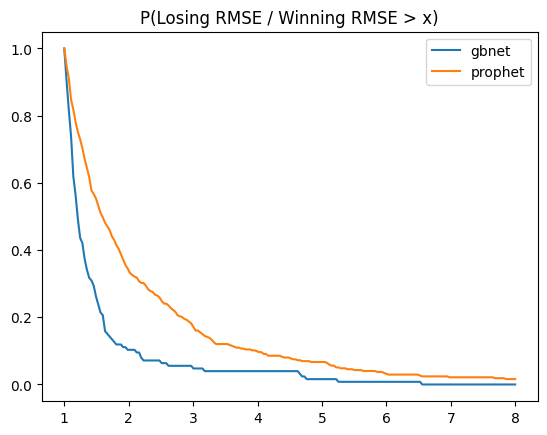

In [ ]:
################################################################
#
#注意：此处将“失败案例的RMSE比率分布”误当作“模型的ICDF”
#
################################################################

import numpy as np  # 导入 numpy 库，用于数值计算
import matplotlib.pyplot as plt # 导入 matplotlib.pyplot 库，用于绘图


# 创建一个从 0.999 到 8 的等间距数组，包含 200 个点
# 用于生成 x 轴的数值范围
icdf_grid = np.linspace(0.999, 8, 200)
gbnet_icdf = []  # 创建一个空列表，用于存储 gbnet 模型的逆累积分布函数值
prophet_icdf = []  # 创建一个空列表，用于存储 prophet 模型的逆累积分布函数值

# 遍历 icdf_grid 中的每个值
for c in icdf_grid:
    # 计算 gbnet 模型在失败情况下的 RMSE 比率大于 c 的概率
    # ~rst['gbnet_wins'] 选择 gbnet 模型失败的样本
    # 'gbnet_over_prophet' 列表示 gbnet 模型的 RMSE 除以 prophet 模型的 RMSE
    # > c 选择比率大于 c 的样本
    # .mean() 计算比率大于 c 的样本的比例，即概率
    gbnet_icdf.append((rst[~rst['gbnet_wins']]['gbnet_over_prophet'] > c).mean())

    # 计算 prophet 模型在胜利情况下的 RMSE 比率大于 c 的概率
    # rst['gbnet_wins'] 选择 gbnet 模型胜利的样本，即 prophet 模型失败的样本
    # 'prophet_over_gbnet' 列表示 prophet 模型的 RMSE 除以 gbnet 模型的 RMSE
    # > c 选择比率大于 c 的样本
    # .mean() 计算比率大于 c 的样本的比例，即概率
    prophet_icdf.append((rst[rst['gbnet_wins']]['prophet_over_gbnet'] > c).mean())

# 绘制 gbnet 模型的逆累积分布函数曲线
plt.plot(icdf_grid, gbnet_icdf, label='gbnet')
# 绘制 prophet 模型的逆累积分布函数曲线
plt.plot(icdf_grid, prophet_icdf, label='prophet')
plt.legend()  # 显示图例
plt.title('P(Losing RMSE / Winning RMSE > x)')  # 设置图表标题

Text(0, 0.5, 'Survival Probability')

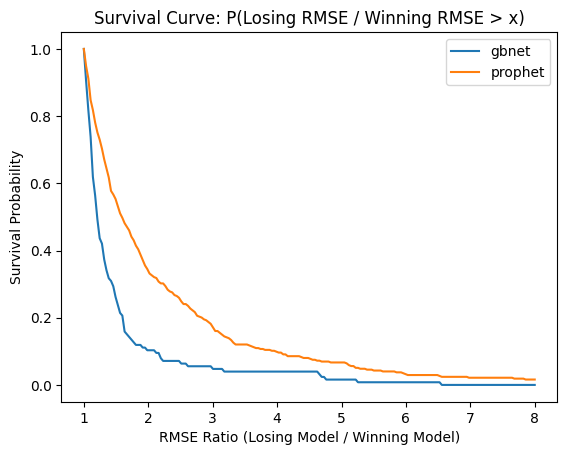

In [ ]:
import numpy as np  # 导入 numpy 库，用于数值计算
import matplotlib.pyplot as plt # 导入 matplotlib.pyplot 库，用于绘图


# 创建一个从 0.999 到 8 的等间距数组，包含 200 个点
# 用于生成 x 轴的数值范围，表示失败模型的 RMSE 与胜利模型的 RMSE 的比率
ratios = np.linspace(0.999, 8, 200)
gbnet_survival = []  # 创建一个空列表，用于存储 gbnet 模型的生存函数值
prophet_survival = []  # 创建一个空列表，用于存储 prophet 模型的生存函数值

# 遍历 ratios 中的每个比率值
for ratio in ratios:
    # 计算 gbnet 模型的生存函数值，即 gbnet 模型失败且 RMSE 比率大于 ratio 的概率
    # ~rst['gbnet_wins'] 选择 gbnet 模型失败的样本
    # 'gbnet_over_prophet' 列表示 gbnet 模型的 RMSE 除以 prophet 模型的 RMSE
    # > ratio 选择 RMSE 比率大于 ratio 的样本
    # .mean() 计算满足条件的样本比例，即生存函数值
    gbnet_survival.append((rst[~rst['gbnet_wins']]['gbnet_over_prophet'] > ratio).mean())

    # 计算 prophet 模型的生存函数值，即 prophet 模型失败且 RMSE 比率大于 ratio 的概率
    # rst['gbnet_wins'] 选择 gbnet 模型胜利的样本，即 prophet 模型失败的样本
    # 'prophet_over_gbnet' 列表示 prophet 模型的 RMSE 除以 gbnet 模型的 RMSE
    # > ratio 选择 RMSE 比率大于 ratio 的样本
    # .mean() 计算满足条件的样本比例，即生存函数值
    prophet_survival.append((rst[rst['gbnet_wins']]['prophet_over_gbnet'] > ratio).mean())

# 绘制 gbnet 模型的生存曲线
plt.plot(ratios, gbnet_survival, label='gbnet')
# 绘制 prophet 模型的生存曲线
plt.plot(ratios, prophet_survival, label='prophet')
plt.legend()  # 显示图例
plt.title('Survival Curve: P(Losing RMSE / Winning RMSE > x)')  # 设置图表标题，明确指出是生存曲线
plt.xlabel('RMSE Ratio (Losing Model / Winning Model)') # 设置x轴标签
plt.ylabel('Survival Probability') # 设置y轴标签